In [1]:
import sys
sys.path.append(r'/home/christian/Documents/Bachelor/numerics')
# from physical_functions_mf import *
from add_solutions_functions import *
from lc_classifier import *
from scipy.optimize import root
from multiprocessing import Pool
from time import time, sleep
from random import random
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import AxesZero
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

loaded


In [2]:
# physical functions


def AOK(k,Gam,sgam):
    return Gam*(Gam+sgam-k)

def minF(w,k,G,gamma):
    if k>0:
        if k>G+gamma:
            if w!=0:
                return (2*w-np.sqrt(w**2-3/2*AOK(k,G,gamma)))/3/k
            else:
                return -np.sqrt(-G/2*(G+gamma-k)/k**2)*0.9
        else:
            return 0
               
    else:
        return -w*G/2/(G/2*(G+gamma)+w**2)
def maxF(w,k,G,gamma):
    if k>0:
        return (2*w+np.sqrt(w**2-3/2*AOK(k,G,gamma)))/3/k
    else:
        if w==0:
            return 0#(2-np.sqrt(1-3/2*10**8*AOK(k,G,gamma)))/3
        else:
            return (2+np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3*w*10**5

# def lamtest(y,w,k,Gam,sgam):
#     A = AOK(k,Gam,sgam)
#     p = Gam**2/w**2+A/w**2/2+3*y**2-4*y+1
#     q = Gam**2/w**2*(A/w**2/2+3*y**2-4*y+1)+Gam**2/k**2*(2*y-k/w)*(y-k/w)
#     return p, p**2-4*q
    # return (-p+np.sqrt(p**2-4*q))/2, p,p**2-4*q

def lamtest(y,w,k,Gam,sgam):
    A = AOK(k,Gam,sgam)
    p = Gam**2+A/2+k**2*y**2-y*w*k
    q = Gam**2*(A/2+k**2*y**2-y*w*k)+Gam**2*(2*y*k-w)*(y*k-w)
    return p, p**2-4*q, q


def BK(W,K):
    return K/2/W**2

def yKnax(W,K):
    return (2+np.sqrt(1-3/2*(1-K)/W**2))/3
def yKnix(W,K):
    return (2-np.sqrt(1-3/2*(1-K)/W**2))/3
def FKK(W,K):
    return -BK(W,K)+yKnax(W,K)**3*2-2*yKnax(W,K)**2

def Foriginal_vec(p,w,k,delta,Gamma,gamma):
    x=p[0]
    y= p[1]
    eqx = -Gamma*delta*y-AOK(k,Gamma,gamma)*x-2*k**2*x*(x**2+y**2)+2*w*k*x*y
    eqy = Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y
    return np.array([eqx,eqy])
def Foriginal(y,w,k,Gamma,gamma):
    return -w*Gamma/2-Gamma/2*(Gamma+gamma-k)*y-k**2*y**3+2*w*k*y**2-w**2*y
# def y1ofx(x,w,k,delta,Gamma,gamma):
#     if x==0:
#         return 0
#     return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2+np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2*x)))

def y1ofx(x,w,k,delta,Gamma,gamma):
    if x==0 and delta==0:
        return (2*w**2+np.sqrt(4*w**4+8*k*Gamma*w**2))/(4*k*w)
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return 1/(Gamma*delta+2*k*w*x)*(w**2*x+np.sqrt(w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2)))

def num(x,w,k,delta,Gamma,gamma):
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return (w**2*x+(w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2)).sqrt())

def denom(x,w,k,delta,Gamma,gamma):
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return Gamma*delta+2*k*w*x

def insq(x,w,k,delta,Gamma,gamma):
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return (w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2))
    # return (k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2*x)

def insq_preci(x,w,k,delta,Gamma,gamma):
    x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return (w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2))

def y2ofx(x,w,k,delta,Gamma,gamma):
    if x==0 and delta==0:
        return (2*w**2-np.sqrt(4*w**4+8*k*Gamma*w**2))/(4*k*w)
    # x,w, k, delta, Gamma , prec2 = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(2)
    prec2=2
    return 1/(Gamma*delta+prec2*k*w*x)*(w**prec2*x-np.sqrt(w**4*x**prec2-(prec2*k*w*x+Gamma*delta)*(prec2*k*w*x**3-w*Gamma*x+Gamma*delta*x**prec2)))
    # if x==0:
    #     return w/k
    # return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2-np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2*x)))
y1ofx_vec = np.vectorize(y1ofx)
y2ofx_vec = np.vectorize(y2ofx)
def Fx(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx(x,w,k,delta,Gamma,gamma)
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y

def Fx2(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx(x,w,k,delta,Gamma,gamma)
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return -Gamma*delta*y-AOK(k,Gamma,gamma)*x-2*k**2*x*(x**2+y**2)+2*k*w*x*y
def Fx_vec(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx_vec(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx_vec(x,w,k,delta,Gamma,gamma)
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y

def Fx2_vec(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx_vec(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx_vec(x,w,k,delta,Gamma,gamma)
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return -Gamma*delta*y-AOK(k,Gamma,gamma)*x-2*k**2*x*(x**2+y**2)+2*k*w*x*y

def eq(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx(x,w,k,delta,Gamma,gamma)
    x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return -Gamma*delta*(y**2+x**2)+w*Gamma*x-2*k*w*x*(x**2+y**2)+2*w**2*x*y

def m_z(x,y,omega,kappa,Gamma):
    return 1/2 -(kappa*(y**2+x**2)-omega*y)/Gamma

def set_point1(p,w,k,delta,Gamma,gamma):
    n = 0
    while True:
        try:
            p+= n* 5/10**7
            if np.isnan(Fx(p,w,k,delta,Gamma,gamma,1)):
                n+=1
                continue
            else:
                n+=1
                # print(Fx(p,w,k,delta,Gamma,gamma,1))
                break
        except RuntimeWarning:
            n+=1
            pass
    return p

def set_point2(p,w,k,delta,Gamma,gamma):
    n = 0
    while True:
        try:
            p-= n* 5/10**7
            if np.isnan(Fx(p,w,k,delta,Gamma,gamma,1)):
                n+=1
                continue
            else:
                # print(Fx(p,w,k,delta,Gamma,gamma,1))
                n+=1
                break
        except RuntimeWarning:
            n+=1
            pass
    return p
            

def set_xgird(w,k,delta,Gamma,gamma,points=False):
    grid1 = np.linspace(-0.5-1/10**5,0.5+1/10**5,40)
    pos = 0
    p1= None
    p2 = None
    if max(insq(grid1,w,k,delta,Gamma,gamma))<0:# or min(insq(grid1,w,k,delta,Gamma,gamma))>0:
        # print('no solution')
        return np.array([-2]), None
    gridpoints = []
    newgrid = np.array([0])
    if insq(grid1[0],w,k,delta,Gamma,gamma)>=0:
        if insq(grid1[0]+1/10**5,w,k,delta,Gamma,gamma)>=0:
            p1 = set_point1(grid1[0],w,k,delta,Gamma,gamma)
            gridpoints.append(p1)
    for i in range(len(grid1)-1):
        f1 = insq(grid1[i],w,k,delta,Gamma,gamma)
        f2 = insq(grid1[i+1],w,k,delta,Gamma,gamma)
        if f1*f2<=0:
            r = root_scalar(insq,args=(w,k,delta,Gamma,gamma),method='bisect',bracket=(grid1[i],grid1[i+1]))
            # print(r.root)
            if p1!=None:
                p2 = set_point2(r.root,w,k,delta,Gamma,gamma)
                newgrid = np.concatenate((newgrid,np.linspace(p1,p2,30)))
                # print(np.linspace(p1,p2,30))
                gridpoints.append(p2)
                p1=None
            else:
                p1 = set_point1(r.root,w,k,delta,Gamma,gamma)
                gridpoints.append(p1)
    if p1!=None:
        p2 = set_point2(grid1[-1],w,k,delta,Gamma,gamma)
        newgrid = np.concatenate((newgrid,np.linspace(p1,p2,30)))
        gridpoints.append(p2)
    
    # print(len(gridpoints),gridpoints)
    if len(gridpoints)==2:
        # print(gridpoints[0],grid1[0])
        if gridpoints[0]==grid1[0]:
            # print(gridpoints[-1],grid1[-1])
            if gridpoints[-1]==grid1[-1]:
                if points:
                    return np.linspace(-0.5,0.5,80), np.array(gridpoints)
                return np.linspace(-0.5,0.5,80)
    if points==True:
        return newgrid[1:], np.array(gridpoints)
    return newgrid[1:]

def maxx(w,k,d,Gamma):
    return (Gamma*d)**2/(Gamma*d*w**2-k*w**2*Gamma)

from sympy.abc import gamma, G, kappa, omega, delta, x, y, z, t
from sympy.matrices import Matrix
from sympy import lambdify, simplify, expand
import numpy as np
m = Matrix([x,y,z])
glx = -delta/2*m[1]-(gamma+G)/2*m[0]+kappa*m[0]*m[2]
gly = delta/2*m[0]-omega*m[2]-(gamma+G)/2*m[1]+kappa*m[1]*m[2]
glz = omega*m[1]-kappa*(m[0]**2+m[1]**2)+G/2-G*m[2]
gl = Matrix([glx,gly,glz])
jac_gl = gl.jacobian([m[0],m[1],m[2]])
gl_np = lambdify([t,m,omega,kappa,delta,G,gamma],gl)
jac_gl_np = lambdify([t,m,omega,kappa,delta,G,gamma],jac_gl)
# gl_np(0,[0,2,1],1,1/2,0.2,1), jac_gl_np(0,[0,2,1],1,1/2,0.2,1)
from scipy.integrate import solve_ivp
# mz= 1/2 - 1/G*(kappa*(m[0]**2+m[1]**2)-omega*m[1])
# jac_gl = simplify(expand(jac_gl.subs(z,mz)))
# jac_gl
def jac2(t,m,w,k,d,Gamma,gamma):
    row1 = [-Gamma/2-gamma/2+k*m[2],-d/2,k*m[0]]
    row2 = [d/2,-Gamma/2-gamma/2+k*m[2],k*m[1]-w]
    row3 = [-2*k*m[0],-2*k*m[1]+w,-Gamma]
    return np.array([row1,row2,row3])
def gl2(t,m,omega,kappa,delta,G,gamma):
    row1 = -delta/2*m[1]-(gamma+G)/2*m[0]+kappa*m[0]*m[2]
    row2 = delta/2*m[0]-omega*m[2]-(gamma+G)/2*m[1]+kappa*m[1]*m[2]
    row3 = omega*m[1]-kappa*(m[0]**2+m[1]**2)+G/2-G*m[2]
    return np.array([row1,row2,row3])
def check_spec(w,k,delta,Gamma,gamma):
    if k==0:
        return -1
    return Gamma*delta*np.sqrt(-AOK(k,Gamma,gamma)/2/k**2)-w*Gamma-w/k*AOK(k,Gamma,gamma)
jac_gl

Matrix([
[-G/2 - gamma/2 + kappa*z,                 -delta/2,         kappa*x],
[                 delta/2, -G/2 - gamma/2 + kappa*z, kappa*y - omega],
[              -2*kappa*x,       -2*kappa*y + omega,              -G]])

In [3]:
#Plotting Class



class TickProperties():
    
    major_xtick_step = 5,
    minor_xtick_step = 1
    major_ytick_step = 5
    minor_ytick_step = 1
    STRIP_OF_ZEROS_X = False
    STRIP_OF_ZEROS_Y = False

    def __init__(self,\
    xtick_step_major = 5,\
    xtick_step_minor = 1,\
    ytick_step_major = 5,\
    ytick_step_minor = 1,\
    SZX = False,\
    SZY = False):
        self.major_xtick_step = xtick_step_major
        self.minor_xtick_step = xtick_step_minor
        self.major_ytick_step = ytick_step_major
        self.minor_ytick_step = ytick_step_minor
        self.STRIP_OF_ZEROS_X = SZX
        self.STRIP_OF_ZEROS_Y = SZY

class Format():
    numb_xticks = None
    numb_yticks = None
    custom_func_x = None
    custom_func_y = None
    x_scale = None
    y_scale = None
    x_precion = "{:.2f}"
    y_precion = "{:.2f}"
    def __init__(self,numb_xticks=None,numb_yticks=None,custom_funx=None,custom_funy=None,xscale=None,yscale=None,xprec="{:.2f}",yprec="{:.2f}"):
        self.numb_xticks =numb_xticks
        self.numb_yticks = numb_yticks
        self.custom_func_x = custom_funx
        self.custom_func_y = custom_funy
        self.x_precion=xprec
        self.y_precion = yprec
        self.x_scale = xscale
        self.y_scale = yscale
    def formatx0(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            # print(x,pos,self.numb_xticks)
            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print(self.x_precion.format(self.x_scale[index]))
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    def formatx1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            # print(pos)
            index = int((pos)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    
    def formaty1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))

            index = int((pos-1)*self.y_scale.shape[0]//self.numb_yticks)
            # print(index)
            # print()
            return self.y_precion.format(self.y_scale[index])
        except:
            return self.y_precion.format(self.y_scale[-1])
        
    def formaty(self,x,pos):
        try:
            return self.y_precion.format(self.y_scale[int(x)])
        except:
            return ""

class Setup_Fig():
    DEFAULT_HEAT_EXTEND = (-0.5,39.5,29.5,-0.5)
    xlim = None
    ylim = None
    tickprop = TickProperties()
    formatter = Format()
    cm = 1/2.54 
    fig_width = 12*cm
    fig_height = 4.8/6.4*12*cm
    name_of_plot = None
    def __init__(self,name_of_plot = "sign_of_ev1.pdf",xlim=None,ylim=None,tickp=TickProperties(),formater=Format()):
        self.xlim=xlim
        self.ylim = ylim   
        self.tickprop =tickp       
        self.formatter = formater
        self.name_of_plot = name_of_plot

    
    plt.rcParams["lines.markersize"]=0.7
    plt.rcParams["axes.unicode_minus"]=True
    plt.rcParams["font.size"]=10
    plt.rcParams["text.usetex"]=True
    plt.rcParams["font.serif"]="Computer Modern Serif"
# ax.scatter(A,root,color='0')
    



    def return_fig(self,shape=(1,1),dots_per_inch=400,xax_share=False,yax_share=False,joined=False,set_ticks=True,heightratio=None):
        if heightratio:
            fig, ax = plt.subplots([*shape],figsize=(self.fig_width,self.fig_height),dpi=dots_per_inch,sharex=xax_share,sharey=yax_share,height_ratios=heightratio)
        else:
            # fig = plt.figure(figsize=(self.fig_width,self.fig_height),dpi=dots_per_inch)
            # ax = fig.add_subplot(axes_class=AxesZero)
            fig, ax = plt.subplots(*shape,figsize=(self.fig_width,self.fig_height),dpi=dots_per_inch,sharex=xax_share,sharey=yax_share)
        trash, xw, yw, trash=self.DEFAULT_HEAT_EXTEND# im.get_extent()
        self.formatter.numb_xticks = xw//self.tickprop.major_xtick_step
        self.formatter.numb_yticks = yw//self.tickprop.major_ytick_step
        
        for i in range(shape[0]):
            for j in range(shape[1]):
                pos= 'outer_left'
                if shape[0]==1:
                    if shape[1]==1:
                        current_ax = ax
                    else:
                        current_ax = ax[j]
                else:
                    if shape[1]==1:
                        current_ax = ax[i]
                    else:
                        current_ax = ax[i,j]
                        if j==0:
                           pos= 'outer_left'
                        elif j<shape[1]-1:
                            pos = 'middle'
                        elif j==shape[1]-1:
                            pos = 'outer_right'
                        


        # axlimits have to be adapted
                try:
                    current_ax.set_xlim(*self.xlim)
                except:
                    pass
                try:
                    current_ax.set_ylim(*self.ylim)
                except:
                    pass    
            
                if set_ticks:
                    if self.tickprop.STRIP_OF_ZEROS_X:
                        current_ax.xaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formatx0))
                    current_ax.yaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_ytick_step))
                    current_ax.yaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_ytick_step))
                    current_ax.xaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_xtick_step))
                    current_ax.xaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_xtick_step))

                    if self.tickprop.STRIP_OF_ZEROS_Y:
                        current_ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formaty1))  

                if joined:
                    if i<shape[0]-1:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=False)
                    else:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                        
                    if pos=='outer_left':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
                    elif pos=='middle':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=False)
                    elif pos=='outer_right':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelright=True)
                        # current_ax.set_xlabel(r'$\Gamma \tilde{A}$')
                        # current_ax.set_ylabel(r'$\tilde{y}$',rotation=0)
                else:
                    
                    current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                    
                    current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)   


                current_ax.tick_params(axis='both',which='major',length=4.5)
                plt.setp(current_ax.yaxis.get_majorticklabels(),va='center')
        
        return fig, ax





In [4]:
# starting points
from scipy.optimize import root_scalar
def delthet(thet):
    return 2*np.cos(thet)-1-np.sin(thet)
res =root_scalar(delthet,bracket=[0,np.pi/2])#,xtol=1e-10)


def phi_grid(n):
    angles = []
    steps = 2*np.pi/n
    for i in range(n):
        angles.append(steps/2+i*steps)
    return np.array(angles)

def theta(angles):
    new_angles = []
    ang0 = 0
    for i in range(len(angles)):
        new_angles.append(ang0+(angles[i]-ang0)/2)
        ang0= angles[i]
    new_angles.append(ang0+(np.pi-ang0)/2)
    return np.array(new_angles)

def starting_points():
    delr = 0.5/3
    delthet2 = [np.pi/2]
    delthet3 = [np.arccos(1/3),np.pi-np.arccos(1/3)]
    delthet4 = [res.root,0,np.pi-res.root]
    thets_grid = [delthet2,delthet3,delthet4]
    points = [np.zeros(3)]
    for i in range(3):
        phis = phi_grid(i+2)
        thets = theta(thets_grid[i])
        for phi in phis:
            for thet in thets:
                p = [np.sin(thet)*np.cos(phi),np.sin(thet)*np.sin(phi),np.cos(thet)]
                rho = i*delr + delr/3*2
                points.append(rho*np.array(p))
    return np.array(points)

# starting_points()


(30, 3)


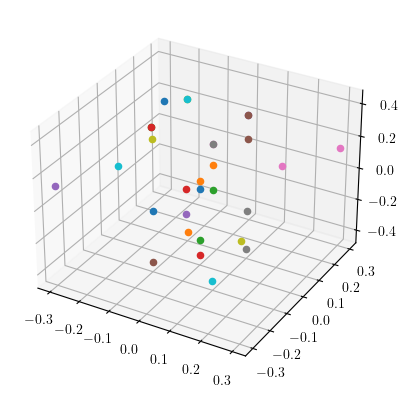

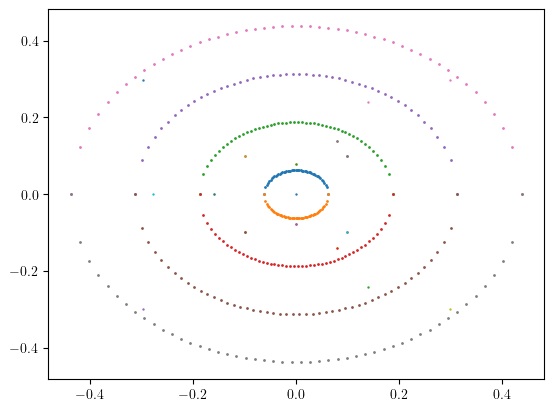

In [45]:
print(starting_points().shape)
fig = plt.figure()
fig2, ax2 = plt.subplots(1,1)
ax = fig.add_subplot(projection='3d')
starts = starting_points()
for i in range(starts.shape[0]):
    ax.scatter(starts[i,0],starts[i,1],starts[i,2])
    ax2.scatter(starts[i,0],starts[i,1])
for n in range(4):
    r=(n+0.5)*0.5/4
    x = np.linspace(-r,r)
    y1 = np.sqrt(r**2-x**2)
    y2 = -np.sqrt(r**2-x**2)
    ax2.scatter(x,y1,s=1)
    ax2.scatter(x,y2,s=1)
plt.show()

In [46]:
gridpoints = 91
k_cut = 72
w_cut = 20
d_cut = 25
from random import random
def starting_points(numb):
    points = np.zeros((numb,3))
    for i in range(numb):
        phi = random()*2*np.pi
        theta = random()*np.pi
        r = random()*0.5
        points[i,:] = r*np.sin(theta)*np.cos(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(theta)
    return points


k_cutarray2 = np.load('4.4k13_1.5w5.5_3d/k_cutarray2.npy')
w_cutarray2 = np.load('4.4k13_1.5w5.5_3d/w_cutarray2.npy')
d_cutarray2 = np.load('4.4k13_1.5w5.5_3d/d_cutarray2.npy')
k_cutarray3 = np.load('4.4k13_1.5w5.5_3d/k_cutarray3.npy')
w_cutarray3 = np.load('4.4k13_1.5w5.5_3d/w_cutarray3.npy')
d_cutarray3 = np.load('4.4k13_1.5w5.5_3d/d_cutarray3.npy')
# result = po.imap(endp_wrapper,range(gridpoints**2),chunksize=100)
# for index, res in enumerate(result):
#     i , j = index//gridpoints, index%gridpoints
#     k_cutarray[k_cut,i,j], w_cutarray[i,w_cut,j], d_cutarray[i,j,d_cut] = res
def dif(a,b):
    return np.linalg.norm(a-b)
# testrange = 6
# def count_cycles(m):
#     number_c = m.shape[1]
#     difference = dist(m)
#     # print(difference)
#     indices = []
#     for i in range(m.shape[1]):
#         indices.extend(range(i,m.shape[1]-1))
#     indices[-1]=m.shape[1]-1
#     if np.all(m[:,1]==0):
#         return 1, m[:,0]
#     for diff in difference:
#         if diff<1/10**4:
#             number_c-=1
#     return max(number_c,1), m[:,indices[difference.index(min(difference))]]
def count_cycles(m):
    # print(m.shape)
    s = dist(m,1e-4)
    if len(s)<=1:
        # print(s)
        s = s[0]
        return 1, np.array([s,s,s]).T
    # print(len(s))
    if len(s)==2:
        # print(s)
        return 2, np.sort(np.array([s[0],s[1],s[0]]).T,axis=1)
    s = np.array(s).T
    # print(s.shape[1])
    s = np.sort(s,axis=1)
    return s.shape[1], s[:,:3]
k_cutarray = np.zeros_like(k_cutarray2)
# k_cutarray = np.zeros((k_cutarray2.shape[0],k_cutarray2.shape[0],5,3))
w_cutarray = np.zeros_like(k_cutarray)
d_cutarray = np.zeros_like(k_cutarray)
numberc_k = np.zeros((k_cutarray2.shape[0],k_cutarray2.shape[0]))
numberc_w = np.zeros_like(numberc_k)
numberc_d = np.zeros_like(numberc_k)


def draw_border_kcut(i,j,l,k_cut):
    return (stability_plus[k_cut,max(0,min(gridpoints-1,i+(-1+2*l))),j]+stability_plus[k_cut,i,j]==1) or (stability_plus[k_cut,i,max(0,min(gridpoints-1,j+(-1+2*l)))]+stability_plus[k_cut,i,j]==1)
def draw_border_wcut(i,j,l,w_cut):
    return (stability_plus[max(0,min(gridpoints-1,i+(-1+2*l))),w_cut,j]+stability_plus[i,w_cut,j]==1) or (stability_plus[i,w_cut,max(0,min(gridpoints-1,j+(-1+2*l)))]+stability_plus[i,w_cut,j]==1)

def draw_border_dcut(i,j,l,d_cut):
    return (stability_plus[max(0,min(gridpoints-1,i+(-1+2*l))),j,d_cut]+stability_plus[i,j,d_cut]==1) or (stability_plus[i,max(0,min(gridpoints-1,j+(-1+2*l))),d_cut]+stability_plus[i,j,d_cut]==1)

border_kcut = np.zeros((gridpoints,gridpoints))
border_wcut = np.zeros_like(border_kcut)
border_dcut = np.zeros_like(border_kcut)

for i in range(gridpoints):
    for j in range(gridpoints):
        if draw_border_kcut(i,j,0,k_cut):
            border_kcut[i,j]=1
        if draw_border_wcut(i,j,0,w_cut):
            border_wcut[i,j] =1   #.append([k[i],d[j]])
        if draw_border_dcut(i,j,0,d_cut):
            border_dcut[i,j]=1     #.append([k[i],w[j]])

for i in range(k_cutarray2.shape[0]):
    for j in range(k_cutarray.shape[0]):
        if stability_plus[k_cut,i,j]==0 and w[i]<=2.73 and d[j]<0:
            numberc_k[i,j], k_cutarray[i,j,:] = count_cycles(k_cutarray3[i,j])
            # k_cutarray[i,j,:] = np.sort(k_cutarray3[i,j])
        else:
            numberc_k[i,j], k_cutarray[i,j,:] = count_cycles(k_cutarray2[i,j])
            # k_cutarray[i,j,:] = np.sort(k_cutarray2[i,j])
            if d[j]>0:
                numberc_k[i,j], k_cutarray[i,j,:]= numberc_k[i,len(d)-1-j], k_cutarray[i,len(d)-1-j,:]
        if stability_plus[i,w_cut,j]==0 and k[i]>9.4 and d[j]<0:
            numberc_w[i,j], w_cutarray[i,j,:] = count_cycles(w_cutarray3[i,j])
            # w_cutarray[i,j,:] = np.sort(w_cutarray3[i,j])
        else:
            numberc_w[i,j], w_cutarray[i,j,:] = count_cycles(w_cutarray2[i,j])
            # w_cutarray[i,j,:] = np.sort(w_cutarray2[i,j])
            if d[j]>0:
                numberc_w[i,j], w_cutarray[i,j,:]= numberc_w[i,len(d)-1-j], w_cutarray[i,len(d)-1-j,:]
        # print(d_cutarray3)
        # numberc_d[i,j], d_cutarray[i,j,:] = count_cycles(d_cutarray3[i,j])
        # d_cutarray[i,j,:] = np.sort(d_cutarray3

NameError: name 'stability_plus' is not defined

In [56]:
wval = 0.75
solution_numberg = np.load('gamma_var/solnumb_4.4k13_0.2g6_3d_.npy')#[::10,::10,::10]

gridpoints=solution_numberg.shape[0]

gamma = np.linspace(0.1,6,gridpoints)
k= np.linspace(4.4,13,gridpoints)
d = np.linspace(-4,4,gridpoints)


fill_solg = np.zeros_like(solution_numberg, dtype=bool)
colorg = np.zeros((*solution_numberg.shape,4))

G, D, K = np.meshgrid(gamma, d, k, indexing='ij')


for ik, kval in enumerate(k):
    for ig, sgam in enumerate(gamma):
        for id, dval in enumerate(d):
            soli = solution_numberg[ik, ig, id]
            
            if soli ==2:
                
                soli = solution_numberg[ik, ig, id]
            if soli != 1:
                fill_solg[ik, ig, id] = True
                
                colorg[ik,ig,id,:]= '0.6' 
                if soli==2:
                    colorg[ik,ig,id,:]= 'red' 


root_path2 = '4.4k13_1.5w5.5_3d/'
k2 = np.load(root_path2+'kparam_4.4k13_1.5w5.5.npy')
w2 = np.load(root_path2+'wparam_4.4k13_1.5w5.5.npy')
d2 = np.load(root_path2+'dparam_4.4k13_1.5w5.5.npy')
W, D2, K2 = np.meshgrid(w2, d2, k2, indexing='ij')

solution_numberw = np.load(root_path2+'solnumb_4.4k13_1.5w5.5.npy')#[::10,::10,::10]

gridpoints=solution_numberw.shape[0]
fill_solw = np.zeros_like(solution_numberw, dtype=bool)
colorw = np.zeros((*solution_numberw.shape,4))
for ik, kval in enumerate(k2):
    for iw, wvalue in enumerate(w2):
        for id, dval in enumerate(d2):
            soli = solution_numberw[ik, iw, id]
            
            if soli ==2:
                
                soli = solution_numberw[ik, iw, id]
            if soli != 1:
                fill_solw[ik, iw, id] = True
                
                colorw[ik,iw,id,:]= '0.6' 
                if soli==2:
                    colorw[ik,iw,id,:]= 'red' 



In [53]:
def adapt_size(*a):
    out = []
    for i in a:
        out.append(i[::7,::7,::7])
    return out

G, D, K, fill_solg, colorg = adapt_size(G, D, K, fill_solg, colorg)
W, D2, K2, fill_solw, colorw = adapt_size(W, D2, K2, fill_solw, colorw)

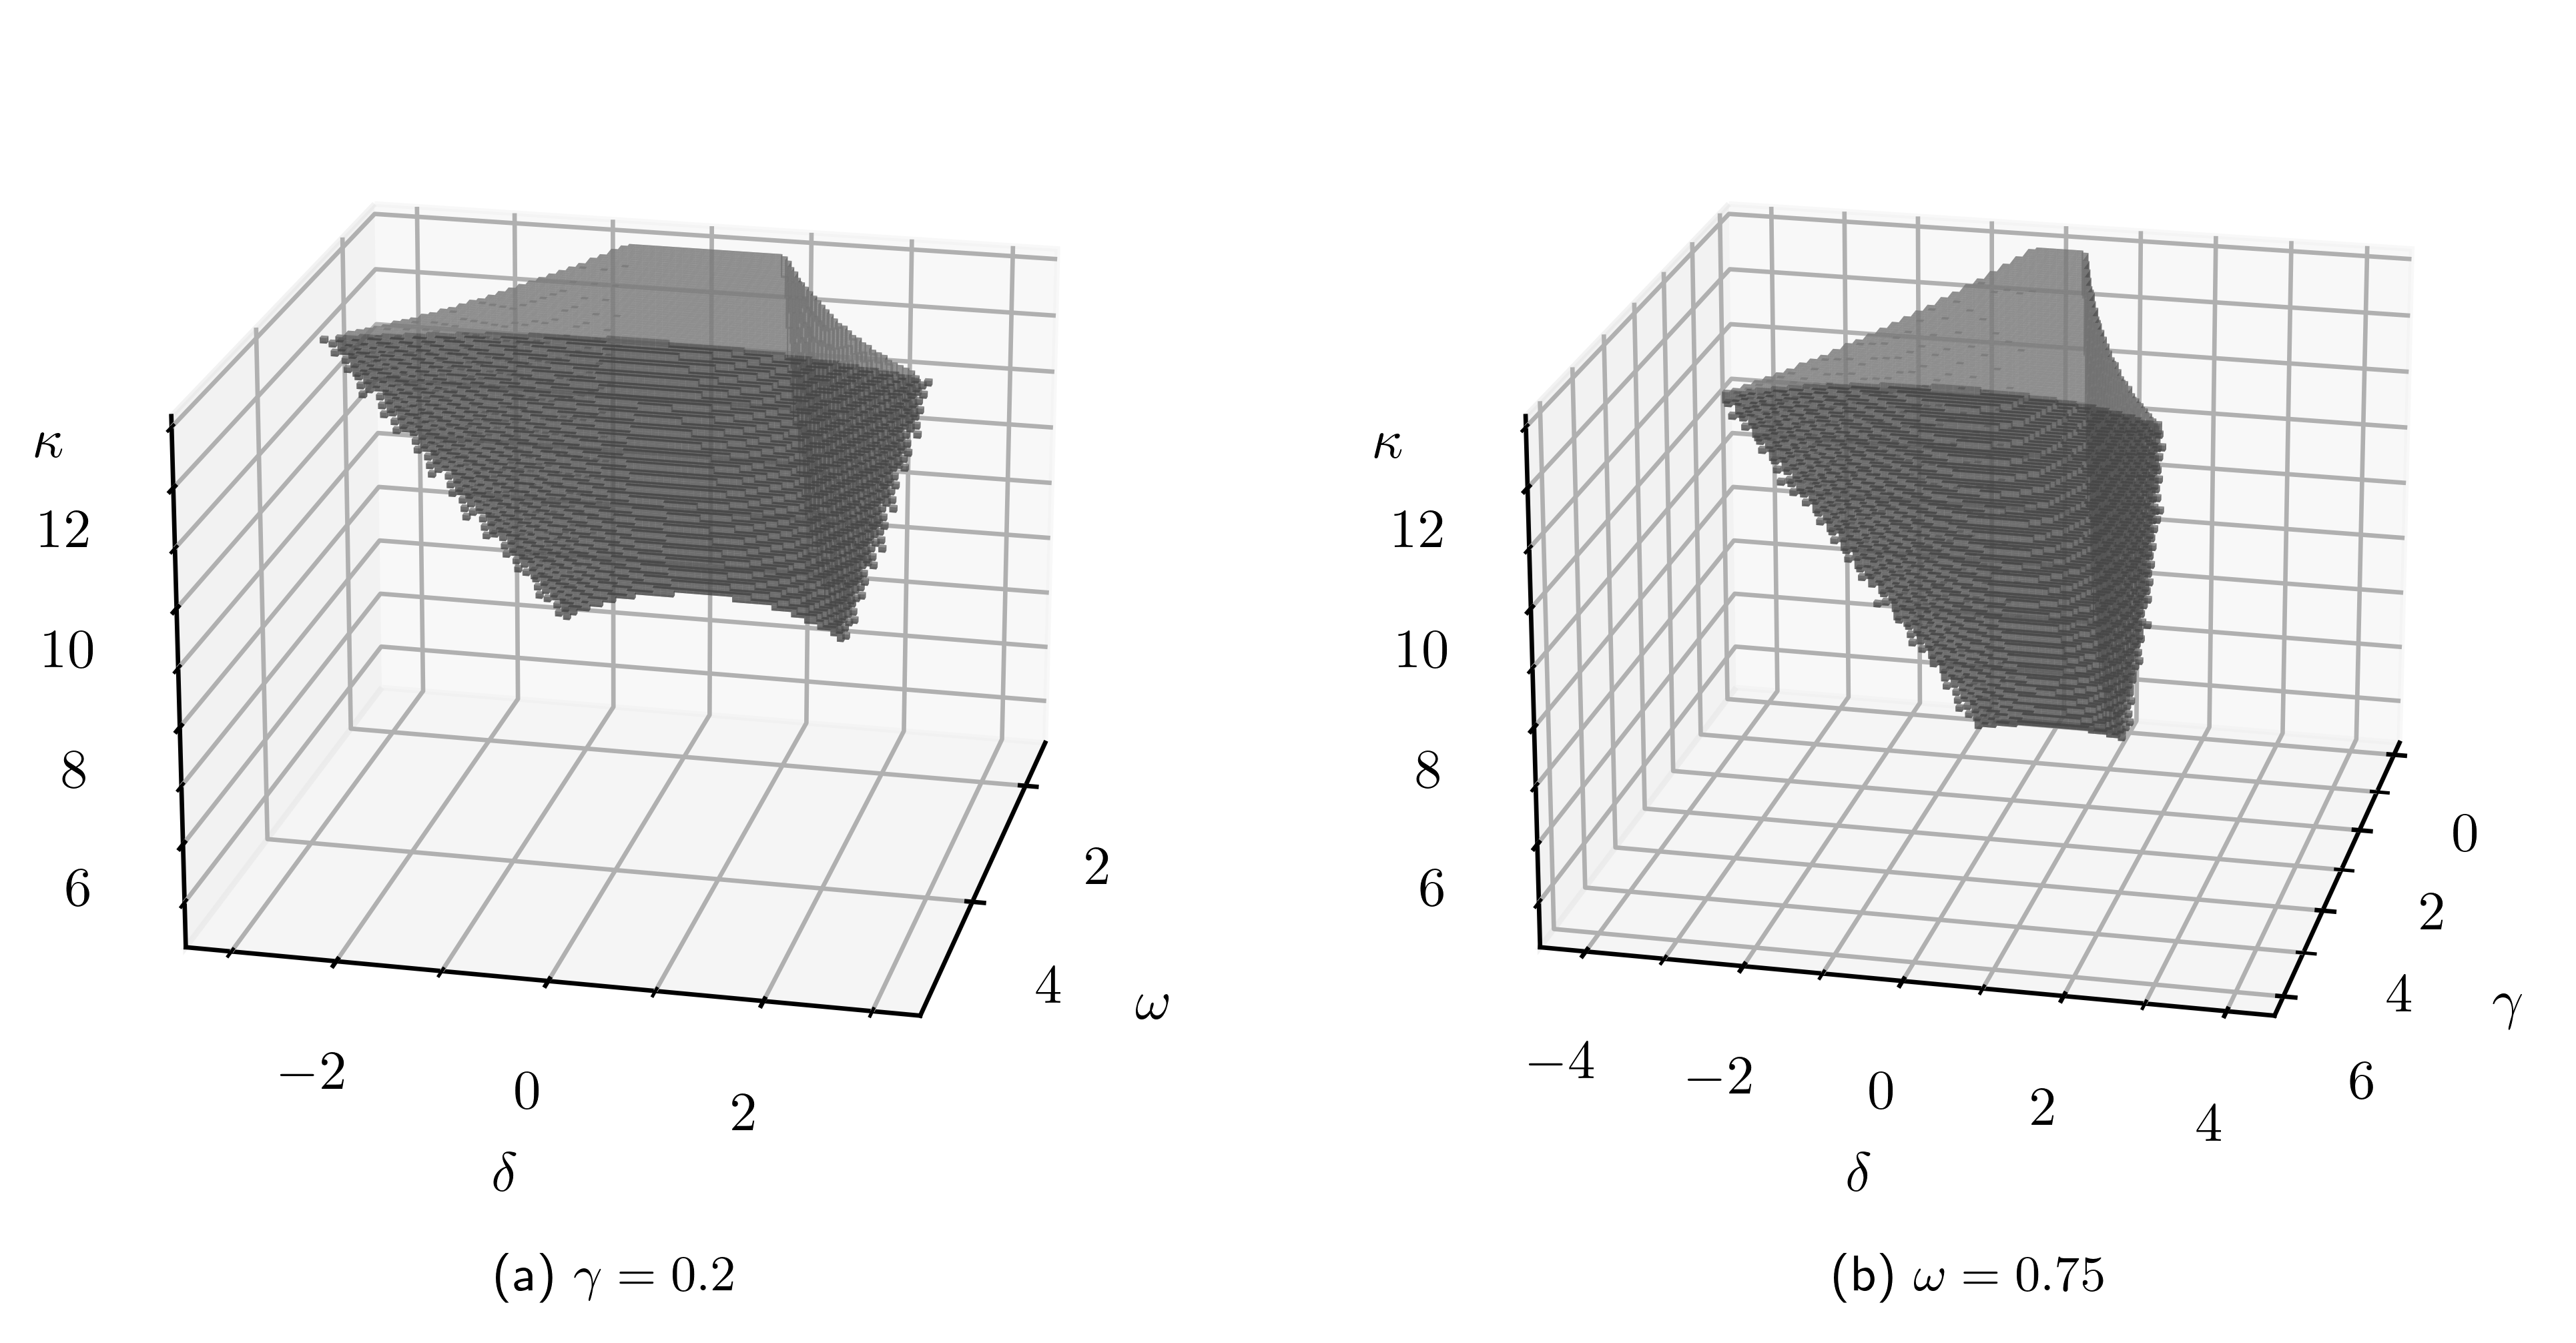

In [57]:
import matplotlib.ticker as ticker


fill_solg = np.swapaxes(np.swapaxes(fill_solg[:-1, :-1, :-1],0,1),1,2)
colorg = np.swapaxes(np.swapaxes(colorg[:-1, :-1, :-1],0,1),1,2)
fig = plt.figure(figsize=(42*cm, 42*cm),dpi=600)
gs = gridspec.GridSpec(1, 2, figure=fig,wspace=0.2,hspace=-0.6,bottom=-0.3,right=0.5)

ax1 = fig.add_subplot(gs[1],projection='3d')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.zaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.zaxis.set_major_locator(ticker.MultipleLocator(2))
# color_dummy = np.zeros_like(color)
ax1.view_init(20,13,0)
ax1.voxels(G, D, K, fill_solg, facecolors=colorg)
ax1.xaxis.set_rotate_label(False)
ax1.yaxis.set_rotate_label(False)
ax1.set_xlabel(r'$\gamma$',rotation=0)
ax1.set_ylabel(r'$\delta$',rotation=0)
ax1.zaxis.set_rotate_label(False)
ax1.text(x=6,y=-6.7,z=12.025,s=r'$\kappa$')


fill_solw = np.swapaxes(np.swapaxes(fill_solw[:-1, :-1, :-1],0,1),1,2)
colorw = np.swapaxes(np.swapaxes(colorw[:-1, :-1, :-1],0,1),1,2)


ax2 = fig.add_subplot(gs[0],projection='3d')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax2.zaxis.set_minor_locator(ticker.MultipleLocator(1))
ax2.zaxis.set_major_locator(ticker.MultipleLocator(2))
# color_dummy = np.zeros_like(color)
ax2.view_init(20,13,0)
ax2.voxels(W, D2, K2, fill_solw, facecolors=colorw)
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.set_xlabel(r'$\omega$',rotation=0)
ax2.set_ylabel(r'$\delta$',rotation=0)
ax2.zaxis.set_rotate_label(False)
ax2.text(x=6.3,y=-4.47,z=12.8,s=r'$\kappa$')
# ax1.set_zlabel(r'$\kappa$',rotation=0,labelpad=0)
# plt.legend(['stable','unstable'])
ax2.set_title(r'(a) $\gamma=0.2$',loc='center',y=-0.15,fontsize=9)
ax1.set_title(r'(b) $\omega=0.75$',loc='center',y=-0.15,fontsize=9)
# plt.subplots_adjust(wspace=-5)
plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+'numb_of_fixp_stab3d_gw.png',bbox_inches='tight')

plt.show()
# np.any(np.isnan(solution_number))

In [61]:
# stability

xsol = np.load('gamma_var/xsol_4.4k13_0.2g6_3d_.npy')
ysol = np.load('gamma_var/ysol_4.4k13_0.2g6_3d_.npy')
stability = np.zeros_like(xsol)
eigi = np.zeros((*xsol.shape,3),dtype=np.complex64)
stability_plus = np.zeros_like(solution_number)
stab_intersect = np.zeros_like(stability_plus)
color3 = np.zeros((*solution_number.shape,4))
color1= np.zeros_like(color3)
color2 = np.zeros_like(color3)
for ik, kval in enumerate(k):
    for ig, sgam in enumerate(gamma):
        for id, dval in enumerate(d):
            for ind in range(int(solution_number[ik,ig,id])):
                # s = yvariant[ik,ig,id,ind]
                # if s==1:
                #     yofx = y1ofx
                # else:
                #     yofx = y2ofx
                y = ysol[ik,ig,id,ind]
                z = m_z(xsol[ik,ig,id,ind],y,wval,kval,Gam)
                m = np.array([xsol[ik,ig,id,ind],y,z])
                # print(m)
                # jac = jac_gl_np(0,m,wval,kval,dval,Gam,sgam)
                jac = jac2(0,m,wval,kval,dval,Gam,sgam)
                try:
                    eigenvalues, vectors =np.linalg.eig(jac)
                    eigi[ik,ig,id,ind,:]=eigenvalues
                except:
                    # print(ik,ig,id)
                    stability[ik,ig,id,ind]=-1
                    stability_plus[ik,ig,id]=-1
                if np.any(np.real(eigenvalues)>0):
                    # if solution_number[ik,ig,id]==3:
                        # print(eigenvalues)
                    # print(eigenvalues)
                    stability[ik,ig,id,ind]=0
                elif np.any(np.real(eigenvalues==0)):
                    stability[ik,ig,id,ind]=1
                    stability_plus[ik,ig,id]=1
                else:
                    # pass
                    stability[ik,ig,id,ind] =2
                    stability_plus[ik,ig,id]=2
            if stability_plus[ik,ig,id]==0:
                color3[ik,ig,id,:] = [0,1,0.5,1]
                color1[ik,ig,id,:] = [0,1,0,1]
            elif stability_plus[ik,ig,id]==1:
                color3[ik,ig,id,:] = [1,1,0,1]
            else:
                # color3[ik,ig,id,:] = [0,0,1,1]
                color1[ik,ig,id,:] = [0,0,1,1]
           
            if solution_number[ik,ig,id]>=2 and stability_plus[ik,ig,id]==0:
                stab_intersect[ik,ig,id]=1
                # print('params: ',kval,wval,dval)
                for ind in range(int(solution_number[ik,ig,id])):
                    y = ysol[ik,ig,id,ind]
                    z = m_z(xsol[ik,ig,id,ind],y,wval,kval,Gam)
                    m = np.array([xsol[ik,ig,id,ind],y,z])
                    jac = jac_gl_np(0,m,wval,kval,dval,Gam,sgam)
                    eigenvalues, vectors =np.linalg.eig(jac)
                    # print('eig: ',eigenvalues)
                # color3[ik,ig,id,:] = [1,0,0,1]
            # if solution_number[ik,ig,id]==1 and stability_plus[ik,ig,id]>0:
            #     print('one_p params: ',kval,wval,dval)

            stability[ik,ig,id,int(solution_number[ik,ig,id]):]=np.nan

    
for id in range(solution_number.shape[2]//2+1):
    stability[:,:,-1-id,:] = stability[:,:,id,:]
    stability_plus[:,:,-1-id] = stability_plus[:,:,id]
    stab_intersect[:,:,-1-id] = stab_intersect[:,:,id]

In [59]:
G, D, K = np.meshgrid(gamma, d, k, indexing='ij')
G.shape

(91, 91, 91)

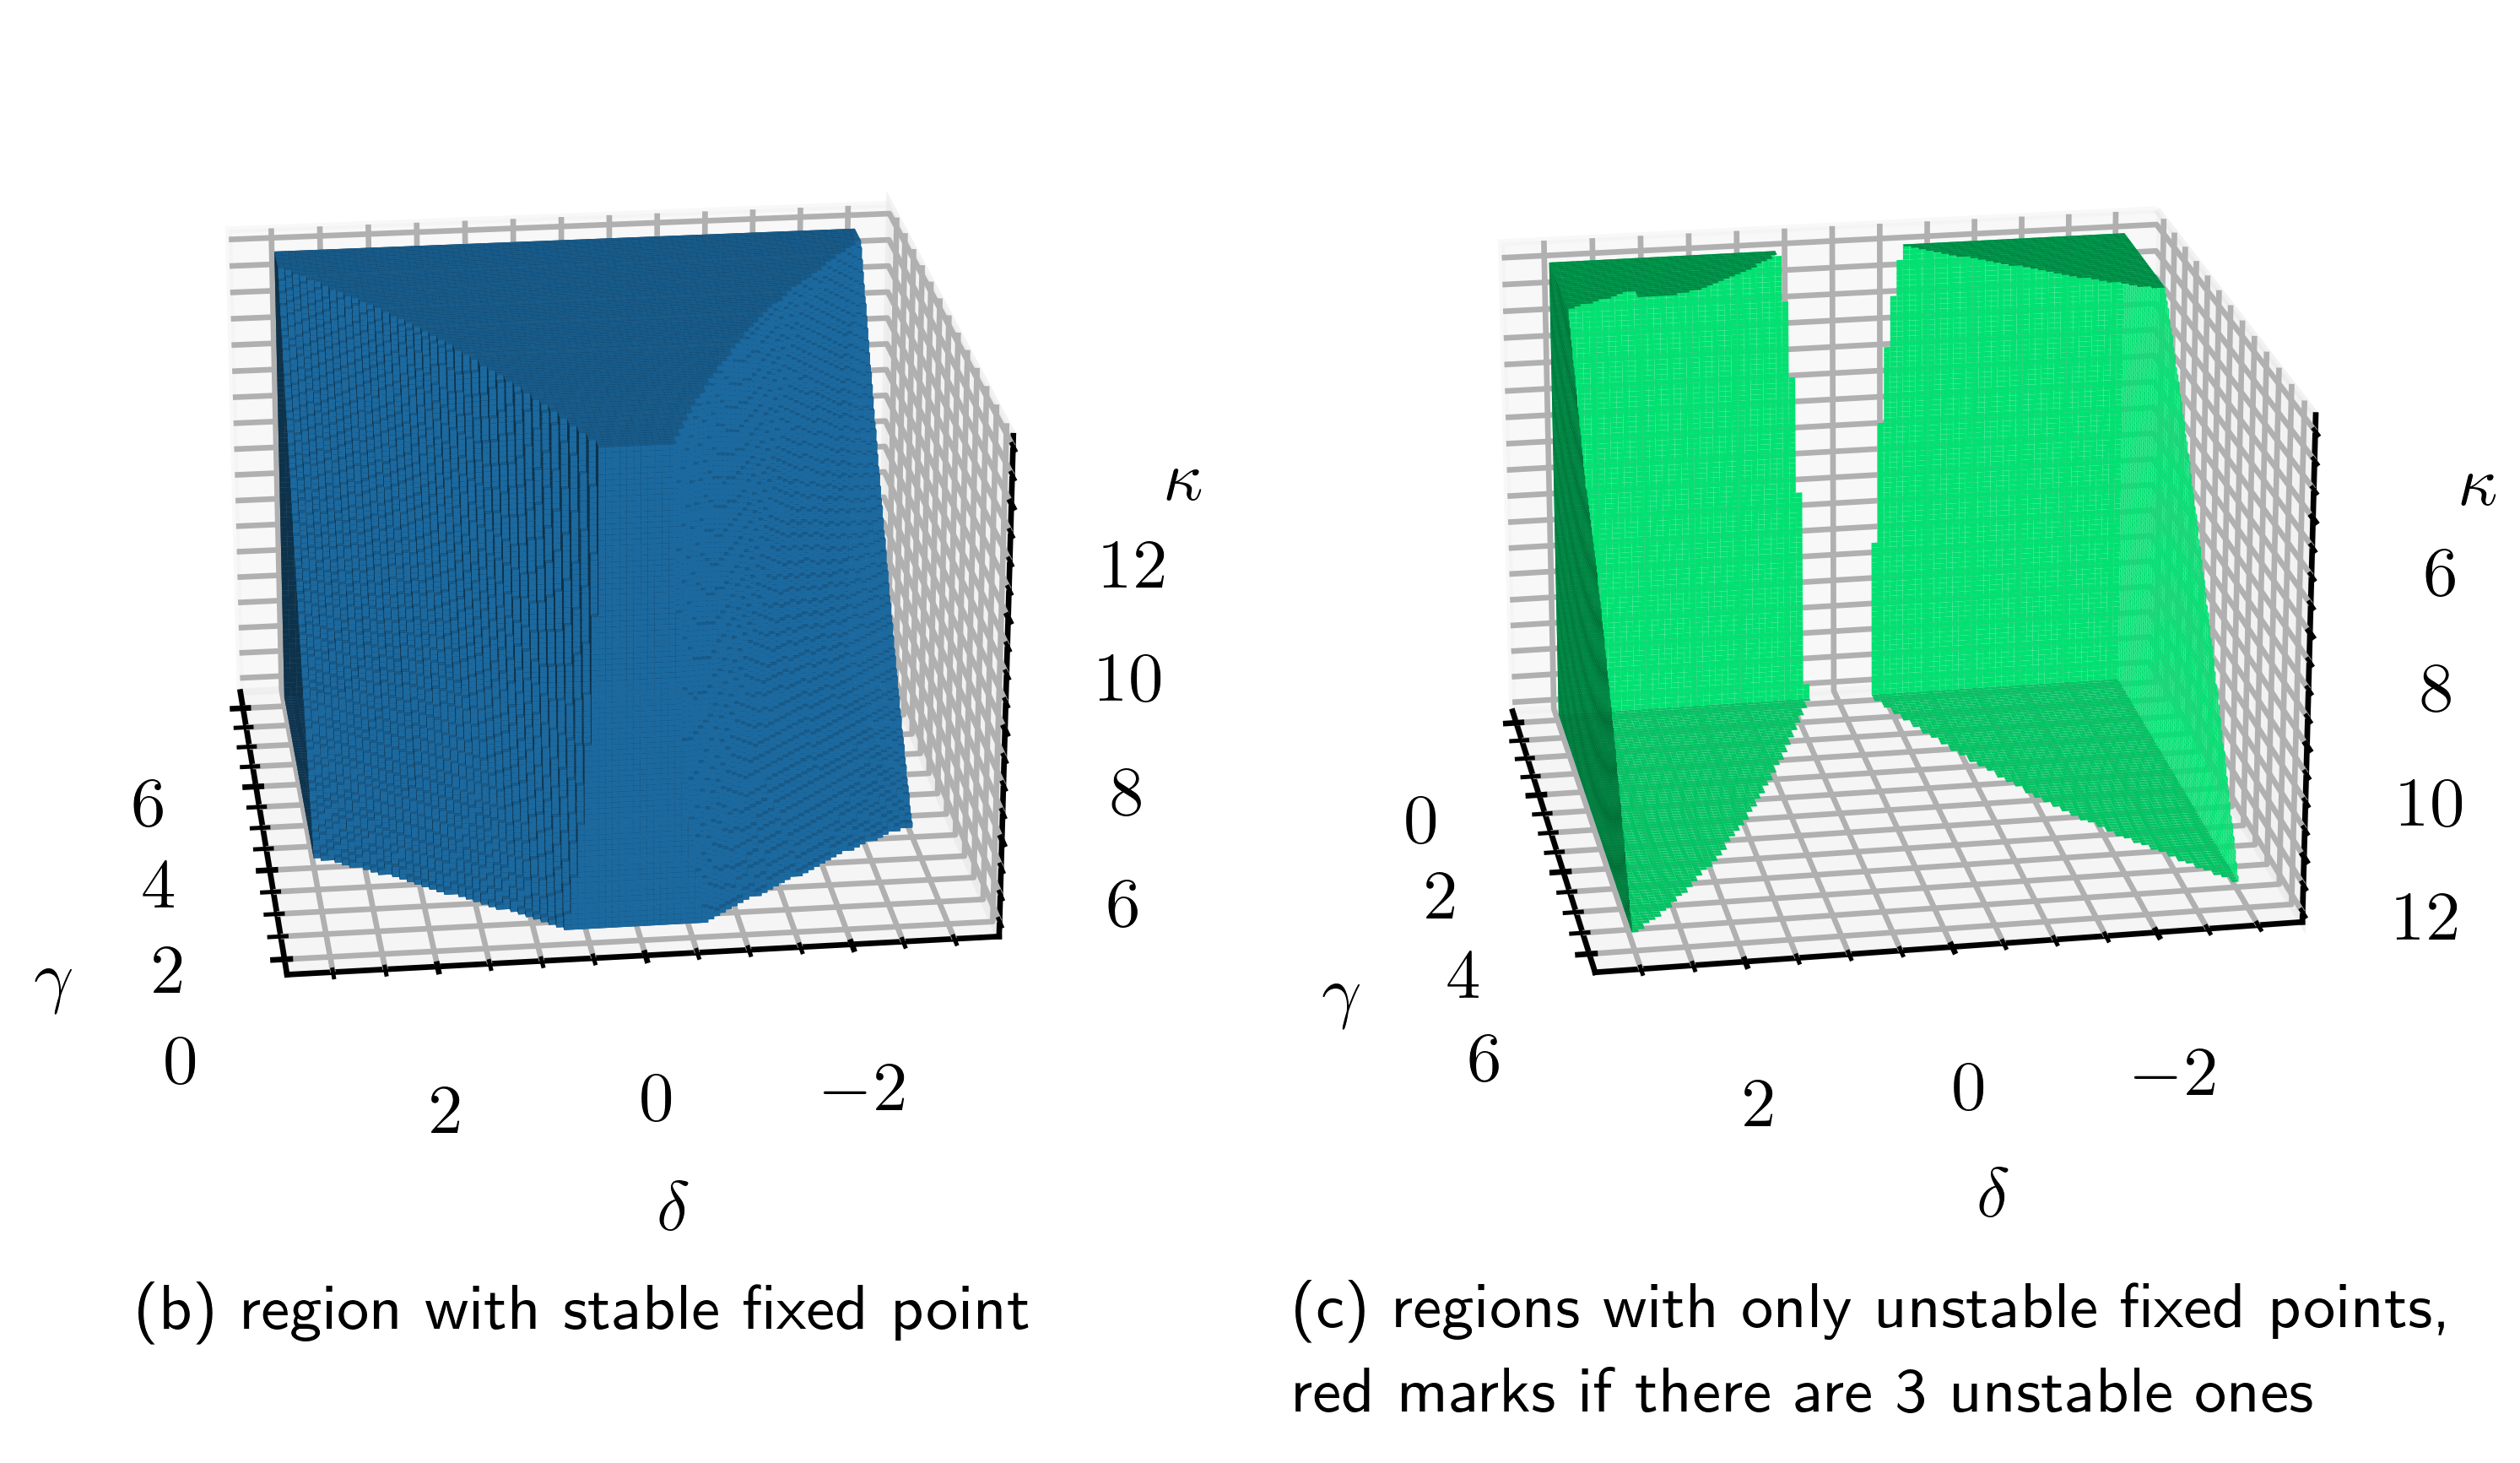

In [62]:

# for id in range(solution_number.shape[2]//2+1):
#     stability[:,:,-1-id,:] = stability[:,:,id,:]
#     stability_plus[:,:,-1-id] = stability_plus[:,:,id]
fig = plt.figure(figsize=(20.6*cm, 25.1*cm),dpi=600)

# Create a GridSpec layout
gs = gridspec.GridSpec(1, 2, figure=fig,wspace=0.2,hspace=-0.6,bottom=-0.3,right=0.7)#,height_ratios=[1,3.5])

stability_plus_plot = np.swapaxes(np.swapaxes(stability_plus[:-1,:-1,:-1],0,1),1,2)#[::5,::10,::10]
ax2 = fig.add_subplot(gs[0,0],projection='3d')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax2.zaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.zaxis.set_minor_locator(ticker.MultipleLocator(0.5))

ax2.view_init(22,173,0)#200,190,0
ax2.voxels(G, D, K, stability_plus_plot)
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.set_xlabel(r'$\gamma$',rotation=0)
ax2.set_ylabel(r'$\delta$',rotation=0)
ax2.zaxis.set_rotate_label(False)
# ax2.set_zlabel(r'$\kappa$',rotation=0,labelpad=0)
ax2.text(x=6,y=-6.4,z=7.5,s=r'$\kappa$')
ax2.set_title(r'(b) region with stable fixed point',loc='center',y=-0.25,fontsize=9)
# plt.subplots_adjust(bottom=-0.4)
# plt.show() 
# fig = plt.figure()
# stability_plus = np.swapaxes(np.swapaxes(stability_plus[:-1,:-1,:-1],0,1),1,2)
# ax1 = fig.add_subplot(gs[0,:],projection='3d')
# ax1.view_init(200,190,0)
# ax1.voxels(G, D, K, np.ones_like(stability_plus_plot) -stability_plus_plot,facecolors=[0,1,0,1])

# ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
# ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
# ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
# ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
# ax1.zaxis.set_major_locator(ticker.MultipleLocator(2))
# ax1.zaxis.set_minor_locator(ticker.MultipleLocator(0.5))


# ax1.xaxis.set_rotate_label(False)
# ax1.yaxis.set_rotate_label(False)
# ax1.set_xlabel(r'$\omega$',rotation=0)
# ax1.set_ylabel(r'$\delta$',rotation=0)
# ax1.zaxis.set_rotate_label(False)
# ax1.set_zlabel(r'$\kappa$',rotation=0,labelpad=0)
# ax1.set_title(r'(a) region without stable fixed point',loc='center',y=-0.07,fontsize=9)
# plt.subplots_adjust(bottom=-0.4)
# # plt.tight_layout()
# plt.show() 

# stab_intersect = 1-stability_plus+stab_intersect[:-1,:-1,:-1]


stab_intersect = np.swapaxes(np.swapaxes(stab_intersect[:-1,:-1,:-1],0,1),1,2)#[::10,::10,::10]
stab_intersect = 1-stability_plus_plot+stab_intersect
color3 =np.swapaxes(np.swapaxes(color3[:-1,:-1,:-1],0,1),1,2)#[::10,::10,::10]
# ax.set_xlabel(r'$\omega$')
# ax.set_ylabel(r'$\delta$')
# ax.set_zlabel(r'$\kappa$')
# fig = plt.figure()
# stability_plus = np.swapaxes(np.swapaxes(stability_plus[:-1,:-1,:-1],0,1),1,2)
ax3 = fig.add_subplot(gs[0,1],projection='3d')
ax3.view_init(200,190,0)
ax3.voxels(G, D, K, stab_intersect,facecolors=color3)#[::10,::10,::10])
ax3.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax3.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax3.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax3.zaxis.set_major_locator(ticker.MultipleLocator(2))
ax3.zaxis.set_minor_locator(ticker.MultipleLocator(0.5))


ax3.xaxis.set_rotate_label(False)
ax3.yaxis.set_rotate_label(False)
ax3.set_xlabel(r'$\gamma$',rotation=0)
ax3.set_ylabel(r'$\delta$',rotation=0)
ax3.zaxis.set_rotate_label(False)
# ax3.set_zlabel(r'$\kappa$',rotation=0,labelpad=0)
ax3.text(x=6,y=-5,z=6.2,s=r'$\kappa$')
ax3.set_title(r'\,\\(c) regions with only unstable fixed points, \\red marks if there are 3 unstable ones',loc='center',y=-0.25,fontsize=9)
# plt.subplots_adjust(bottom=-0.4)
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+'stability_regions_2plots_gamma.pdf',bbox_inches='tight')

# plt.tight_layout()
plt.show()


In [7]:
np.save('gamma_var/stability.npy',stability)
np.save('gamma_var/stability_plus.npy',stability_plus)

NameError: name 'stability' is not defined

In [8]:
g_cutarray = np.load('gamma_var/g_cutarray_p.npy')
k_cutarray = np.load('gamma_var/w_cutarray_p.npy')

In [10]:
gridpoints = 90
halfgrid = gridpoints//2+gridpoints%2
# gamma = np.linspace(0.1,6,gridpoints)
gamma_cut = 3#gamma[85]
# k= np.linspace(4.4,13,gridpoints)
kappa_cut1 = 3#k[80]
kappa_cut2 =5
# k = np.linspace(14.2,16,gridpoints)
gamma = np.linspace(0,5,gridpoints)
omega_cut = 0.75
w= np.linspace(0.04,2,gridpoints)
d = np.linspace(-6,0,halfgrid)
# d = np.linspace(-3,3,gridpoints)

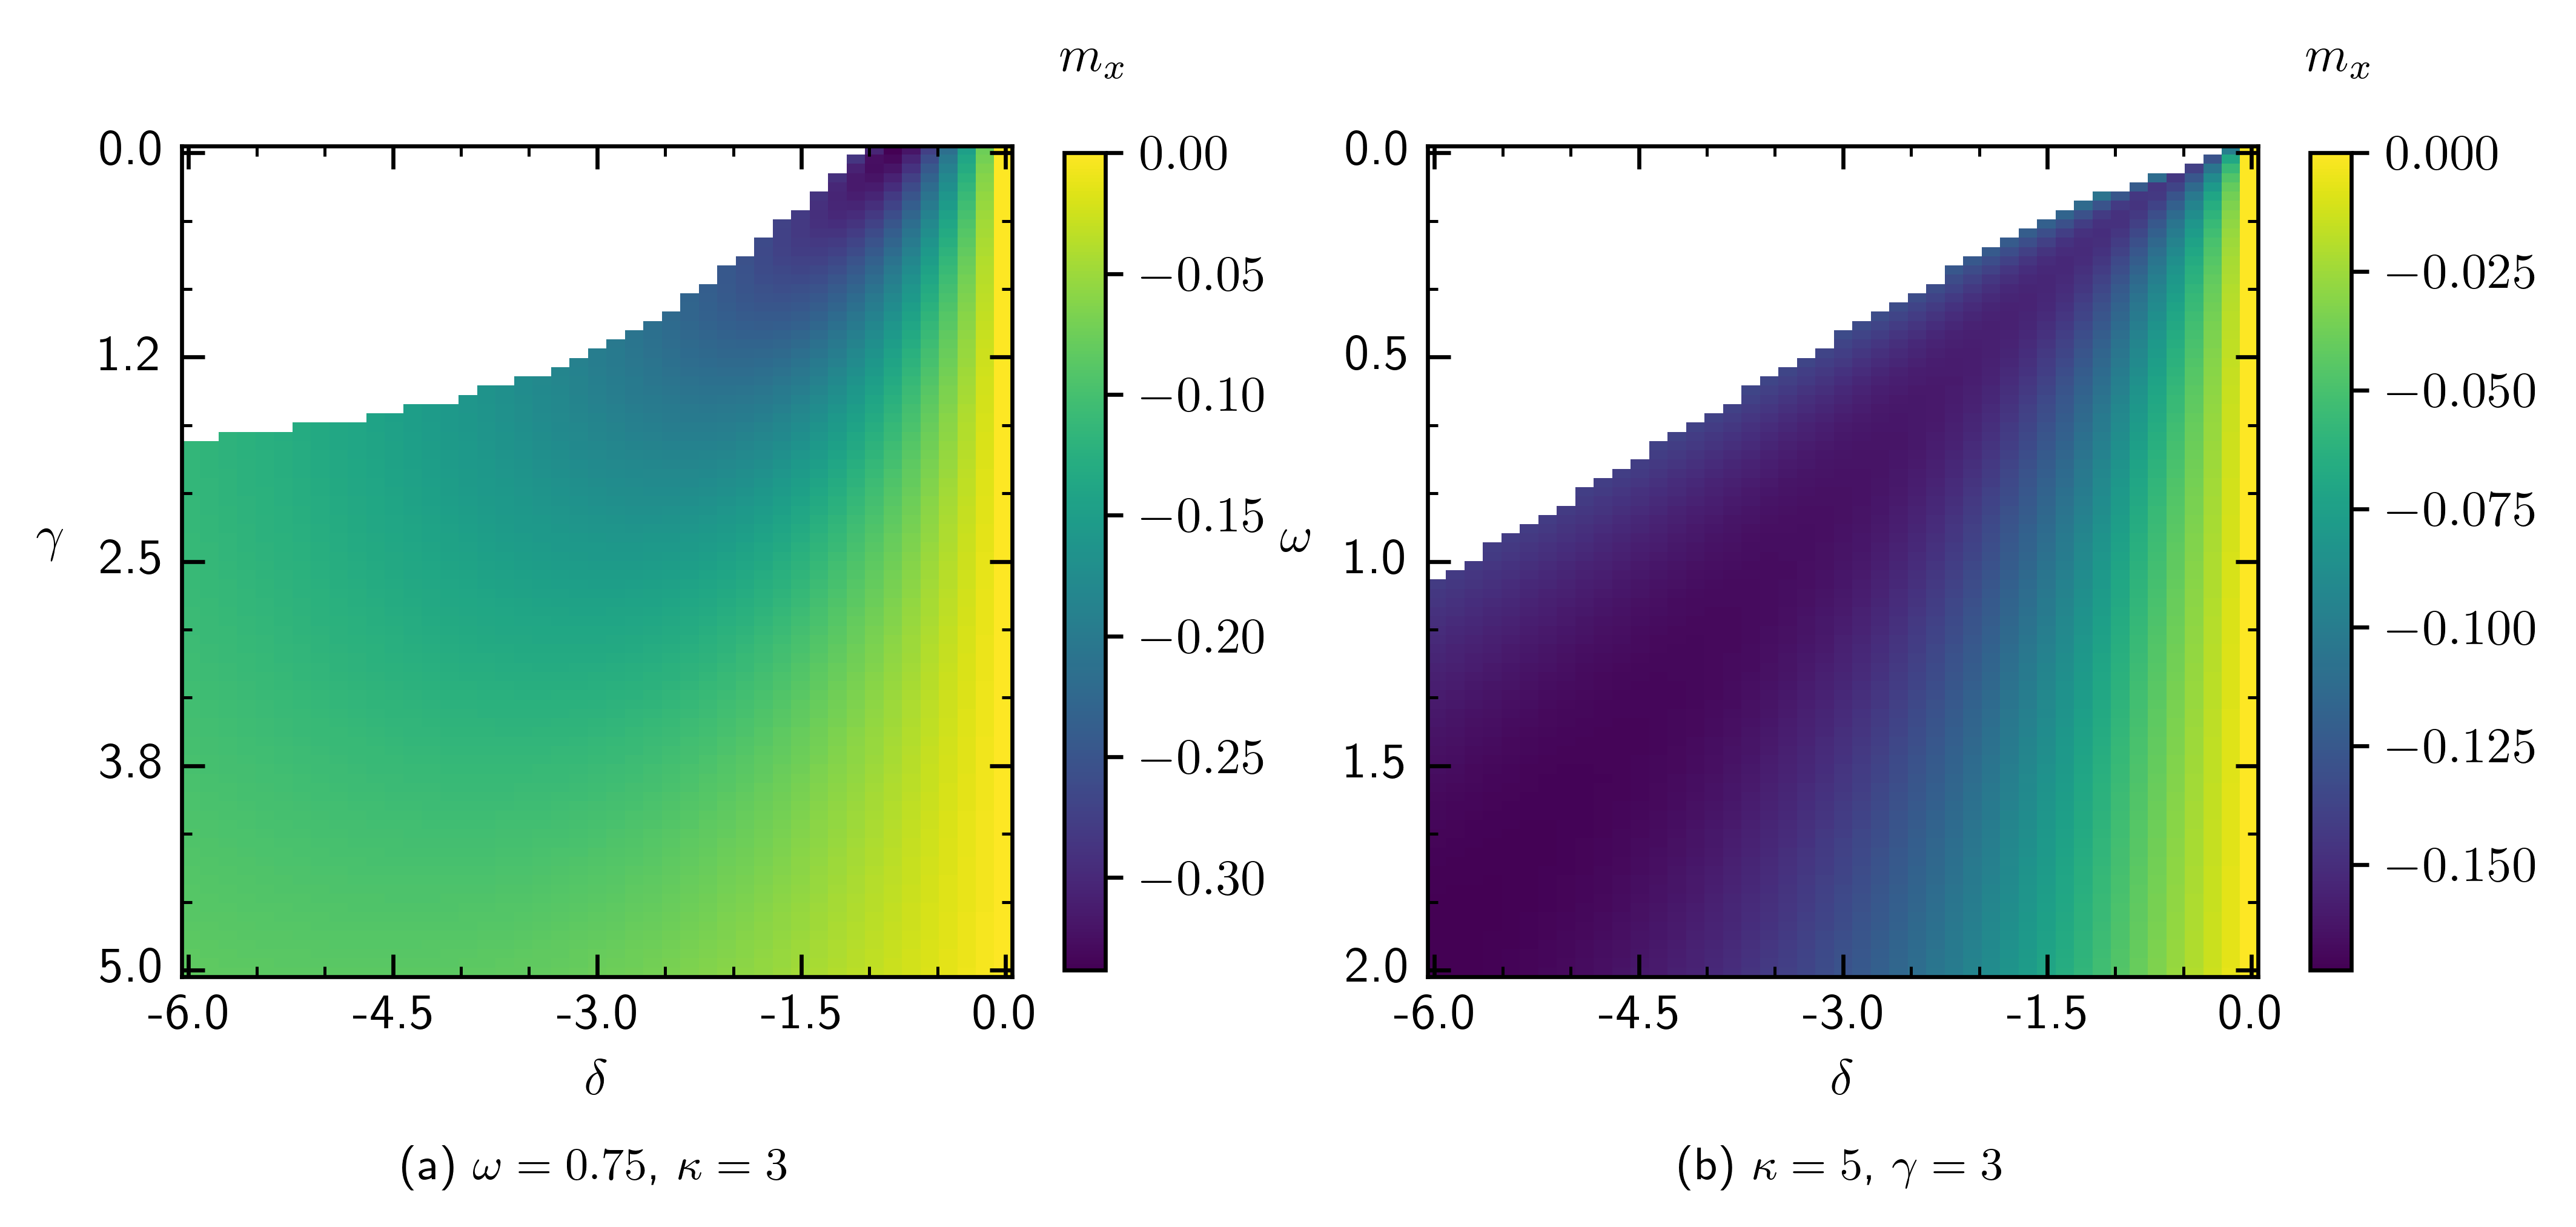

In [11]:


xsol_gcut = np.zeros(2*[gridpoints]+[5])
ysol_gcut = np.zeros_like(xsol_gcut)
solution_number_gcut = np.zeros(2*[gridpoints])

xsol_wcut = np.zeros(2*[gridpoints]+[5])
ysol_wcut = np.zeros_like(xsol_wcut)
solution_number_wcut = np.zeros(2*[gridpoints])


mgridpoints = 40
mgrid = np.zeros((mgridpoints,mgridpoints,2))
rho = np.linspace(0,0.5,mgridpoints)
phi = np.linspace(0,2*np.pi,mgridpoints)
for i, dist in enumerate(rho):
    for j, ang in enumerate(phi):
        mgrid[i,j,:]= dist*np.cos(ang), dist*np.sin(ang)

def root2d(k,w,d,sgam):
    solnumb =0
    rejections=0
    xsol_list =[]
    ysol_list = []
    rejected = []
    for i in range(mgrid.shape[0]):
        for j in range(mgrid.shape[1]):
            r = root(Foriginal_vec,args=(w,k,d,Gam,sgam),x0=mgrid[i,j])
            xsol_list, ysol_list, solnumb, rejections, rejected = add_sol2d(k,w,d,sgam,r,xsol_list,ysol_list,solnumb,rejections,rejected)
    return solnumb, xsol_list, ysol_list#, rejections

# check_sol = np.zeros_like(solution_number)
# for ik, kval in enumerate(k):
#     for iw, wval in enumerate(w):
#         for id, dval in enumerate(d):
#             for i in range(-2,3):
#                 if solution_number[ik,iw,(id+i)%gridpoints]:
#                     check_sol[ik,iw,id]=1
#                 elif solution_number[ik,(iw+i)%gridpoints,id]:
#                     check_sol[ik,iw,id]=1
#                 elif solution_number[(ik+i)%gridpoints,iw,id]:
#                     check_sol[ik,iw,id]=1
halfgrid = gridpoints//2+gridpoints%2
def wrapper(index):
    # ik, ig, id = index//gridpoints**2,(index%gridpoints**2)//gridpoints, index%gridpoints
    io, id = index//halfgrid, index%halfgrid
    # ik, ig, id = index//(gridpoints*halfgrid),(index%(gridpoints*halfgrid))//halfgrid, index%halfgrid
    # kval, sgam, dval = k[ik], gamma[ig], d[id]
    # if check_sol[ik,iw,id] and dval!=0:
    # return root2d(k[ik],wval,d[id],gamma[ig])
    return root2d(kappa_cut1,omega_cut,d[id],gamma[io]), root2d(kappa_cut2,w[io],d[id],gamma_cut)
    # else:
    #     return [0]
    

po = Pool(9)
result = po.imap(wrapper,range(gridpoints*halfgrid))
# result = po.imap(wrapper,range(gridpoints**3))

reject = np.zeros_like(solution_number_gcut)
for index, res in enumerate(result):
    # ik, ig, id = index//gridpoints**2,(index%gridpoints**2)//gridpoints, index%gridpoints
    # ik, ig, id = index//(gridpoints*halfgrid),(index%(gridpoints*halfgrid))//halfgrid, index%halfgrid
    # if check_sol[ik,iw,id] and d[id]!=0:
    io, id = index//halfgrid, index%halfgrid
    [solig, xsol_gcut[io,id,:solig], ysol_gcut[io,id,:solig]], [solik, xsol_wcut[io,id,:solik], ysol_wcut[io,id,:solik]] = res
    
    solution_number_gcut[io,id] = solig
    solution_number_gcut[io,-1-id], xsol_gcut[io,-1-id,:solig], ysol_gcut[io,-1-id,:solig] = solig,xsol_gcut[io,id,:solig], ysol_gcut[io,id,:solig]
    solution_number_wcut[io,id] = solik
    solution_number_wcut[io,-1-id], xsol_wcut[io,-1-id,:solik], ysol_wcut[io,-1-id,:solik] = solik,xsol_wcut[io,id,:solik], ysol_wcut[io,id,:solik]






def determine_stability(solnumb,x_sols,y_sols,wval,kval,dval,sgam):
    stability = np.zeros_like(x_sols)
    stability_plus = 0
    for ind in range(int(solnumb)):
        # s = yvariant[ik,ig,id,ind]
        # if s==1:
        #     yofx = y1ofx
        # else:
        #     yofx = y2ofx
        y = y_sols[ind]
        x = x_sols[ind]
        z = m_z(x,y,wval,kval,Gam)
        m = np.array([x,y,z])
        # print(m)
        # jac = jac_gl_np(0,m,wval,kval,dval,Gam,sgam)
        jac = jac2(0,m,wval,kval,dval,Gam,sgam)
        try:
            eigenvalues, vectors =np.linalg.eig(jac)
            # eigi[ik,ig,id,ind,:]=eigenvalues
        except:
            # print(ik,ig,id)
            stability[ind]=-1
            stability_plus=-1
        if np.any(np.real(eigenvalues)>0):
            # if solution_number[ik,ig,id]==3:
                # print(eigenvalues)
            # print(eigenvalues)
            stability[ind]=0
        elif np.any(np.real(eigenvalues==0)):
            stability[ind]=1
            stability_plus=1
        else:
            # pass
            stability[ind] =2
            stability_plus=2
    stability[int(solnumb):]=np.nan
    return stability, stability_plus

stability_plus_gcut = np.zeros_like(solution_number_gcut)
stability_plus_wcut = np.zeros_like(solution_number_wcut)
stability_gcut = np.zeros_like(xsol_gcut)
stability_wcut = np.zeros_like(xsol_wcut)
# stability_plus = np.load(root_path+'stability_plus.npy')
# stability = np.load(root_path+'stability.npy')
stab_zsol_gcut = np.ones_like(solution_number_gcut)*np.nan
stab_xsol_gcut = np.ones_like(solution_number_gcut)*np.nan
stab_ysol_gcut = np.ones_like(solution_number_gcut)*np.nan

stab_zsol_wcut = np.ones_like(solution_number_wcut)*np.nan
stab_xsol_wcut = np.ones_like(solution_number_wcut)*np.nan
stab_ysol_wcut = np.ones_like(solution_number_wcut)*np.nan

for io in range(gridpoints):
        for id, dval in enumerate(d):
            stability_gcut[io,id], stability_plus_gcut[io,id]=determine_stability(solution_number_gcut[io,id],xsol_gcut[io,id],ysol_gcut[io,id],omega_cut,kappa_cut1,dval,gamma[io])
            stability_wcut[io,id], stability_plus_wcut[io,id]=determine_stability(solution_number_wcut[io,id],xsol_wcut[io,id],ysol_wcut[io,id],w[io],kappa_cut2,dval,gamma_cut)

            if stability_plus_gcut[io,id]:
                # print(kval,wval,dval)
                for n in range(int(solution_number_gcut[io,id])):
                    if stability_gcut[io,id,n]==2:
                        stab_xsol_gcut[io,id]=xsol_gcut[io,id,n]
                        stab_ysol_gcut[io,id] = ysol_gcut[io,id,n]
                        stab_zsol_gcut[io,id] = m_z(xsol_gcut[io,id,n],ysol_gcut[io,id,n],omega_cut,kappa_cut1,Gam)
                        break
            if stability_plus_wcut[io,id]:
                # print(kval,wval,dval)
                for n in range(int(solution_number_wcut[io,id])):
                    if stability_wcut[io,id,n]==2:
                        stab_xsol_wcut[io,id]=xsol_wcut[io,id,n]
                        stab_ysol_wcut[io,id] = ysol_wcut[io,id,n]
                        stab_zsol_wcut[io,id] = m_z(xsol_wcut[io,id,n],ysol_wcut[io,id,n],w[io],kappa_cut2,Gam)
                        break
                
shrink_cbar = 0.36

tickformat = Format(xscale=d,yscale=gamma,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=15,\
                        xtick_step_minor=5,\
                            ytick_step_major=15,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
setup.fig_width= 20.6*cm
setup.fig_height=20.6*cm #29.1*cm
setup.DEFAULT_HEAT_EXTEND = (-0.5,60.5,60.5,-0.5)#im1.get_extent()#
fig, ax = setup.return_fig(shape=(1,2),dots_per_inch=600) 
# im1 = ax[0].imshow(g_cutarray[:,:,0,0],extent=(-0.5,60.5,60.5,-0.5))
# im1 = ax[0].imshow(xsol_kcut[:,:,0])
im1 = ax[0].imshow(stab_xsol_gcut[:,:45],extent=setup.DEFAULT_HEAT_EXTEND)
# im1 = ax[0].imshow(k_cutarray[:,:,0,0],extent=(-0.5,60.5,60.5,-0.5))
colorbar = fig.colorbar(im1,ax=ax[0],shrink=shrink_cbar)
# im2 = ax[1].imshow(k_cutarray[:,:,0,0],extent=(-0.5,60.5,60.5,-0.5))

tickformat2 = Format(xscale=d,yscale=w,xprec="{:.1f}",yprec="{:.1f}")
tickformat2.numb_xticks = tickformat.numb_xticks
tickformat2.numb_yticks = tickformat.numb_yticks

ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(tickformat2.formaty1))  
# im2 = ax[1].imshow(xsol_gcut[:,:,0])
im2 = ax[1].imshow(stab_xsol_wcut[:,:45],extent=setup.DEFAULT_HEAT_EXTEND)
colorbar2 = fig.colorbar(im2,ax=ax[1],shrink=shrink_cbar)
x_pos= 64
y_pos= -6
ax[0].text(x=x_pos,y=y_pos,s=r'$m_x$')
ax[1].text(x=x_pos,y=y_pos,s=r'$m_x$')
ax[0].set_title(r'(a) $\omega={:.2f}$, $\kappa={:d}$'.format(omega_cut,kappa_cut1),fontsize=9,loc='center',y=-0.28)
ax[1].set_title(r'(b) $\kappa={:d}$, $\gamma={:d}$'.format(kappa_cut2,gamma_cut),fontsize=9,loc='center',y=-0.28)
ax[0].set_xlabel(r'$\delta$')
ax[1].set_xlabel(r'$\delta$')
ax[0].set_ylabel(r'$\gamma$',rotation=0,labelpad=10)
ax[1].set_ylabel(r'$\omega$',rotation=0,labelpad=10)
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+'limit_cycle_mean_gw.png',bbox_inches='tight')
plt.show()

In [13]:
g_border = []
w_border = []
for i in range(stab_xsol_gcut.shape[0]):
    for j in range(stab_ysol_gcut.shape[1]):
        if (not np.isnan(stab_xsol_gcut[i,j])) and np.isnan(stab_xsol_gcut[i-1,j]):
            g_border.append([i/90*60.5,j/45*60.5])
        if (not np.isnan(stab_xsol_wcut[i,j])) and np.isnan(stab_xsol_wcut[i-1,j]):
            w_border.append([i/90*60.5,j/45*60.5])
g_border = np.array(g_border)
w_border = np.array(w_border)

# def spline(x,*a):
#     res = a[0]
#     for i in range(1,len(a)):
#         res += a[i]*x**(1/i)
#     return res

def spline(x,*a):
    res = 0
    for i in range(len(a)):
        res += a[i]*x**i
    return res
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
steps = -3
g_sp_param = curve_fit(spline,g_border[::steps,1],g_border[::steps,0],p0=np.zeros(4))
w_sp_param = curve_fit(spline,w_border[::steps,1],w_border[::steps,0],p0=np.zeros(4))
# g_intp = CubicSpline(g_border[::steps,1],g_border[::steps,0])
# w_intp = CubicSpline(w_border[::steps,1],w_border[::steps,0])


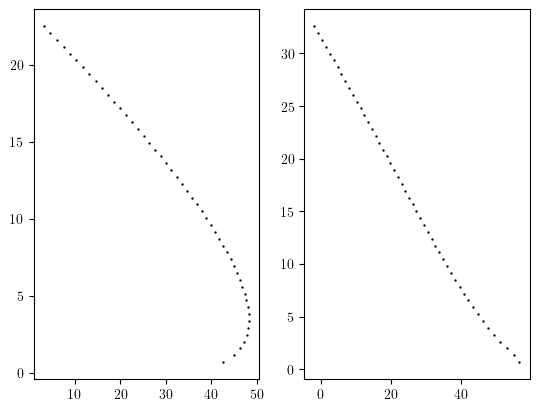

In [79]:
fig, ax = plt.subplots(1,2)
xg = np.linspace(g_border[0,0],g_border[-1,0]+1)
xw = np.linspace(w_border[0,0],w_border[-1,0]+1)
ax[0].scatter(spline(xg,*g_sp_param[0]),xg,color='0')
ax[1].scatter(spline(xw,*w_sp_param[0]),xw,color='0')
plt.show()

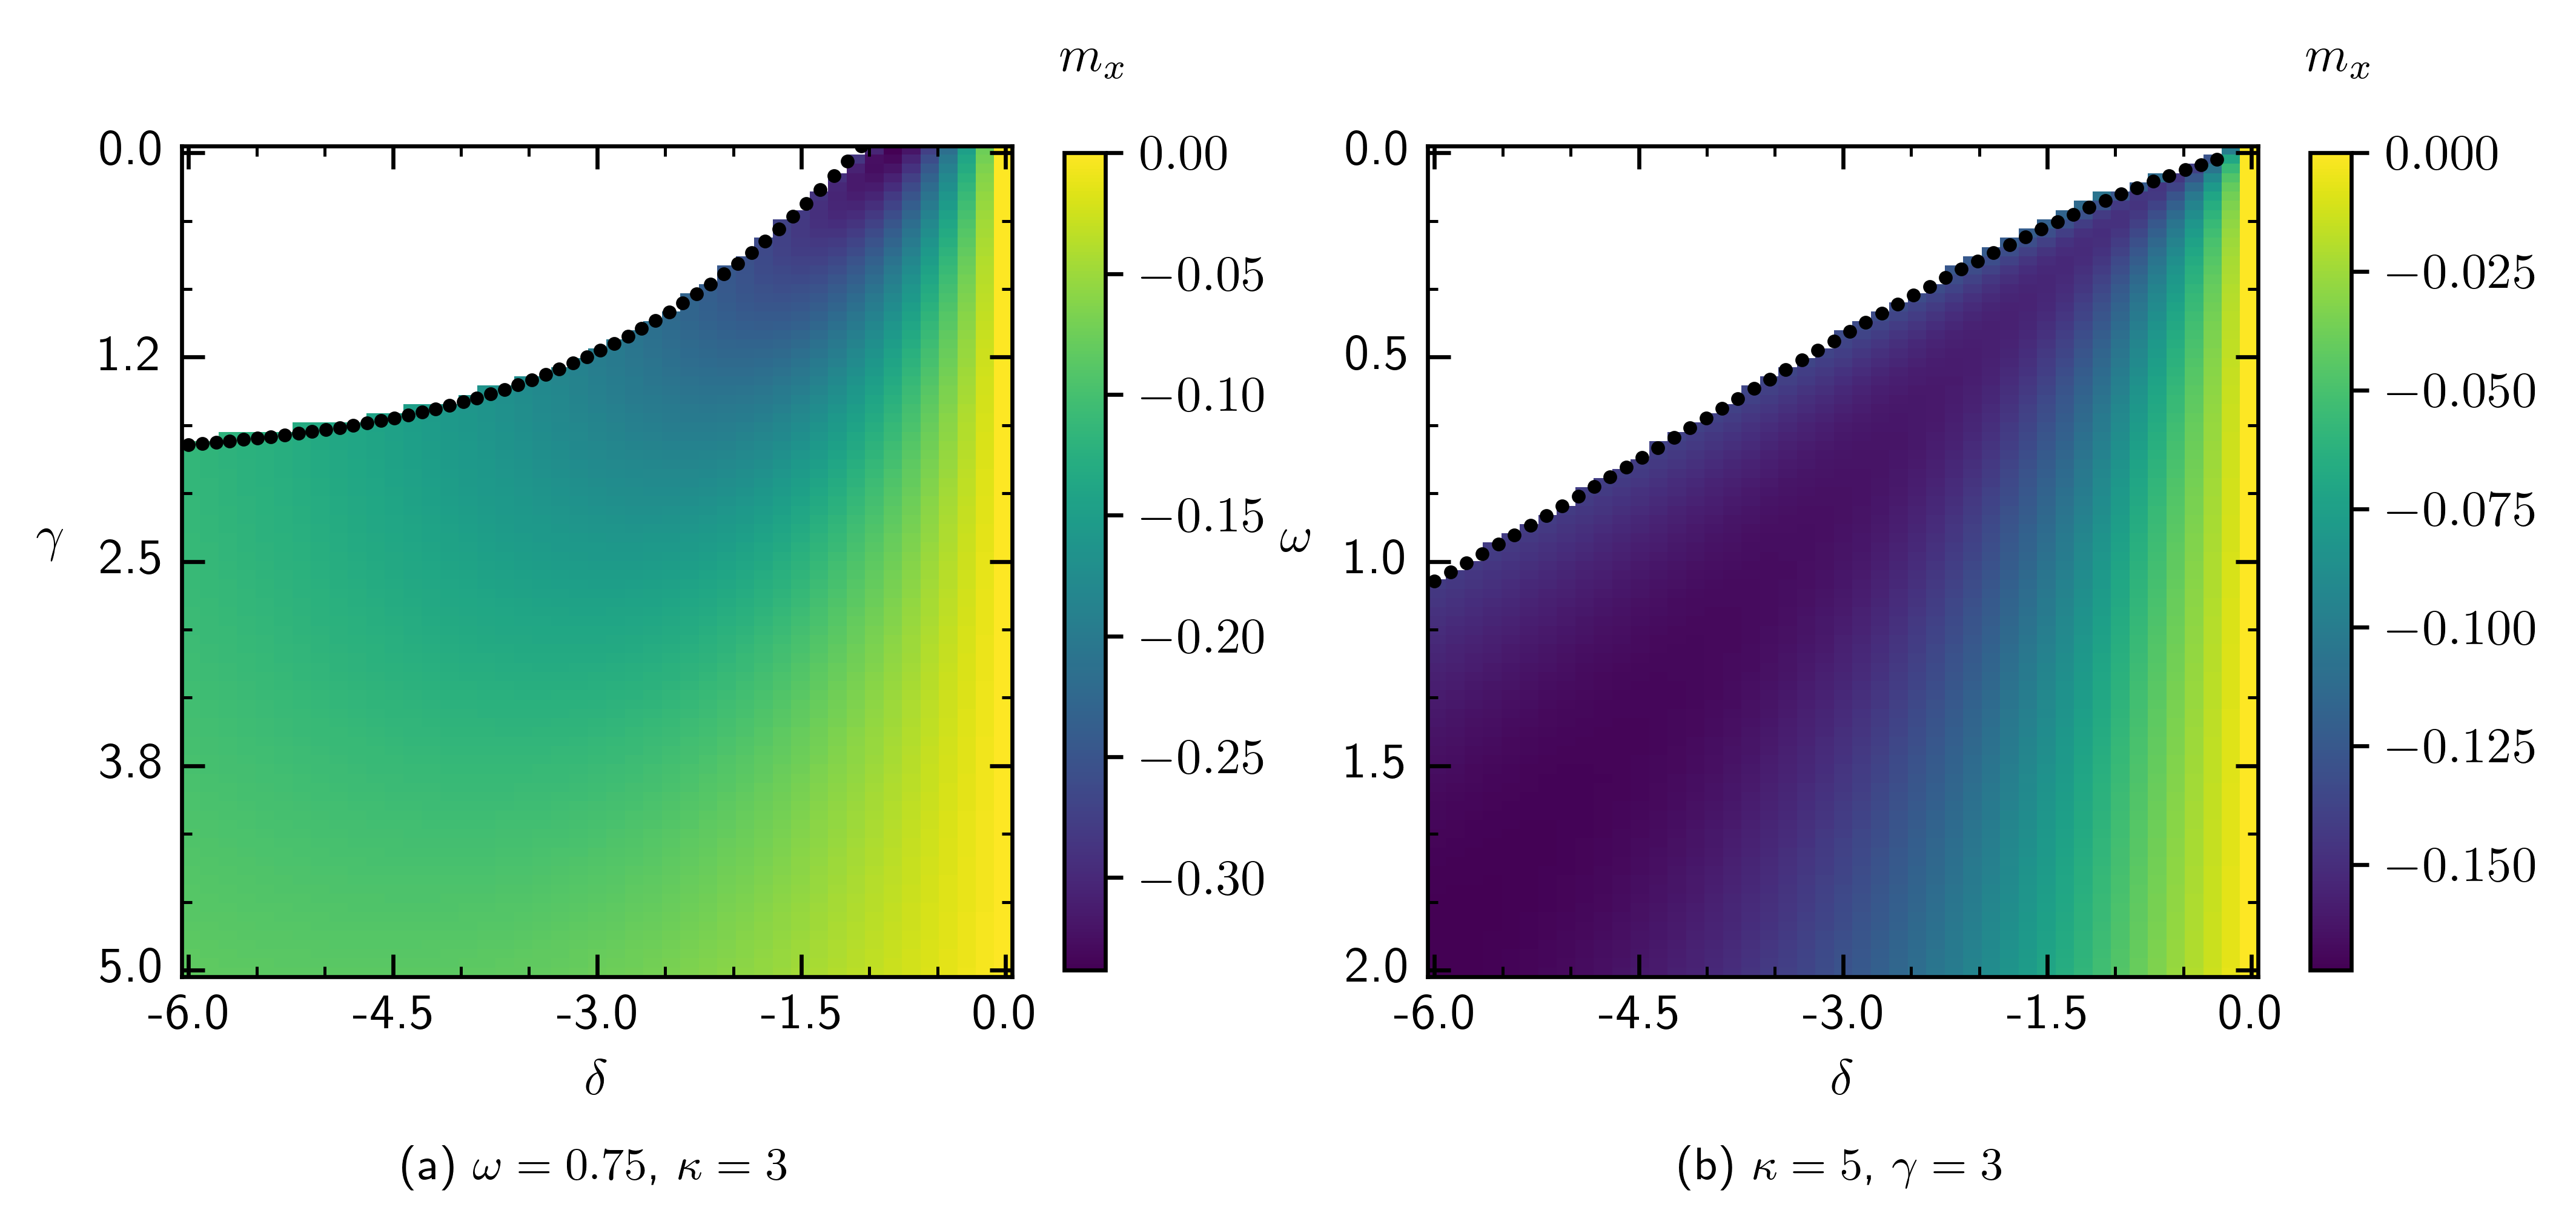

In [86]:
shrink_cbar = 0.36

tickformat = Format(xscale=d,yscale=gamma,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=15,\
                        xtick_step_minor=5,\
                            ytick_step_major=15,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
setup.fig_width= 20.6*cm
setup.fig_height=20.6*cm #29.1*cm
setup.DEFAULT_HEAT_EXTEND = (-0.5,60.5,60.5,-0.5)#im1.get_extent()#
fig, ax = setup.return_fig(shape=(1,2),dots_per_inch=600) 
# im1 = ax[0].imshow(g_cutarray[:,:,0,0],extent=(-0.5,60.5,60.5,-0.5))
# im1 = ax[0].imshow(xsol_kcut[:,:,0])
im1 = ax[0].imshow(stab_xsol_gcut[:,:45],extent=setup.DEFAULT_HEAT_EXTEND)
# im1 = ax[0].imshow(k_cutarray[:,:,0,0],extent=(-0.5,60.5,60.5,-0.5))
colorbar = fig.colorbar(im1,ax=ax[0],shrink=shrink_cbar)
# im2 = ax[1].imshow(k_cutarray[:,:,0,0],extent=(-0.5,60.5,60.5,-0.5))

tickformat2 = Format(xscale=d,yscale=w,xprec="{:.1f}",yprec="{:.1f}")
tickformat2.numb_xticks = tickformat.numb_xticks
tickformat2.numb_yticks = tickformat.numb_yticks

ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(tickformat2.formaty1))  
# im2 = ax[1].imshow(xsol_gcut[:,:,0])
im2 = ax[1].imshow(stab_xsol_wcut[:,:45],extent=setup.DEFAULT_HEAT_EXTEND)
colorbar2 = fig.colorbar(im2,ax=ax[1],shrink=shrink_cbar)
x_pos= 64
y_pos= -6
ax[0].text(x=x_pos,y=y_pos,s=r'$m_x$')
ax[1].text(x=x_pos,y=y_pos,s=r'$m_x$')
ax[0].set_title(r'(a) $\omega={:.2f}$, $\kappa={:d}$'.format(omega_cut,kappa_cut1),fontsize=9,loc='center',y=-0.28)
ax[1].set_title(r'(b) $\kappa={:d}$, $\gamma={:d}$'.format(kappa_cut2,gamma_cut),fontsize=9,loc='center',y=-0.28)
ax[0].set_xlabel(r'$\delta$')
ax[1].set_xlabel(r'$\delta$')
ax[0].set_ylabel(r'$\gamma$',rotation=0,labelpad=10)
ax[1].set_ylabel(r'$\omega$',rotation=0,labelpad=10)
# ax[0].scatter(5,80,s=20,marker='*',color='0')
# ax[0].scatter(g_border[:,1],g_border[:,0],s=10,color='0')
# ax[1].scatter(w_border[:,1],w_border[:,0],s=10,color='0')
xg = np.linspace(0,g_border[0,1]+1)
xw = np.linspace(0,w_border[0,1]+1)
ax[0].scatter(xg,spline(xg,*g_sp_param[0]),color='0',s=3)
ax[1].scatter(xw,spline(xw,*w_sp_param[0]),color='0',s=3)
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+'limit_cycle_mean_gw.png',bbox_inches='tight')
plt.show()

In [5]:
def dist(a,tol):
    
    l = list(a.T)
    if len(l)<2:
        if len(l)==1 and not np.all(l[0]==0):
            return l
        return
    # print(l)
    distance = []
    if np.all(l[0]==0):
            # print('worked')
            l.pop(0)
            if len(l)>0:
                return dist(np.array(l).T,tol)
            else:
                return
    if len(l)==1:
        return l
    elif len(l)==0:
        return
    else:
        i = 1
        
        while i<len(l):
        # for i in range(1,len(l)):
            distance = np.linalg.norm(l[0]-l[i])
            if distance<tol:
                # print('l[i]: ',l[i])
                l.pop(i)
            else:
                i+=1
        # print('l: ',l)
        if len(l)>1:
            lex = dist(np.array(l[1:]).T,tol)
            if lex:
                l = [l[0]]+lex
                # print('lextended: ',lex, l[0])
            else:
                l = [l[0]]
        else:
            return l
        return l
    
def fill(m,n):
    gap = n-len(m)
    return m+gap*[np.array([np.nan,np.nan,np.nan])]#[m[0]]
def count_cycles(m,numb):
    
    # print(m.shape)
    s = dist(m,5*1e-3)
    # print(s)
    if not s:
        return 0, np.zeros((3,numb))
    if len(s)<=1:
        # print(s)
        s = s[0]
        return 1, np.array(numb*[s]).T
    # print(len(s))
    elif len(s)<numb:
        # print(s)
        return len(s), np.sort(np.array(fill(s,numb)).T,axis=1)
    s = np.array(s).T
    # print(s.shape[1])
    s = np.sort(s,axis=1)
    return s.shape[1], s




In [39]:
numberc_g = np.zeros((g_cutarray.shape[0],g_cutarray.shape[1]))
numberc_k = np.zeros_like(numberc_g)
for i in range(g_cutarray.shape[0]):
    for j in range(g_cutarray.shape[1]):
        if stability_plus_gcut[i,j]>0:
            g_cutarray[i,j,:,:] = np.row_stack([np.array([stab_xsol_gcut[i,j],stab_ysol_gcut[i,j],stab_zsol_gcut[i,j]])]*g_cutarray.shape[3]).transpose()
        else:
            numberc_g[i,j], g_cutarray[i,j] = count_cycles(g_cutarray[i,j],g_cutarray.shape[3])
        if stability_plus_kcut[i,j]>0:
            k_cutarray[i,j,:,:] = np.row_stack([np.array([stab_xsol_kcut[i,j],stab_ysol_kcut[i,j],stab_zsol_kcut[i,j]])]*k_cutarray.shape[3]).transpose()
        else:
            numberc_k[i,j], k_cutarray[i,j] = count_cycles(k_cutarray[i,j],k_cutarray.shape[3])

            # g_cutarray[i,j,:,:] = np.sort(g_cutarray[i,j,:,:], axis=1)
            # k_cutarray[i,j,:,:] = np.sort(k_cutarray[i,j,:,:], axis=1)

In [12]:
stab_zsol = np.ones_like(solution_number)*np.nan
stab_xsol = np.ones_like(solution_number)*np.nan
stab_ysol = np.ones_like(solution_number)*np.nan
for ik, kval in enumerate(k):
    for ig, sgam in enumerate(gamma):
        for id, dval in enumerate(d):
            if stability_plus[ik,ig,id]:
                # print(kval,wval,dval)
                for n in range(int(solution_number[ik,ig,id])):
                    if stability[ik,ig,id,n]==2:
                        stab_xsol[ik,ig,id]=xsol[ik,ig,id,n]
                        stab_ysol[ik,ig,id] = ysol[ik,ig,id,n]
                        stab_zsol[ik,ig,id] = m_z(xsol[ik,ig,id,n],ysol[ik,ig,id,n],wval,kval,Gam)
                        break

k_cut = int(11)
g_cut = int(5)
d_cut = int(5)
stab_xsol[:,g_cut,:]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

(90, 45, 3, 33)


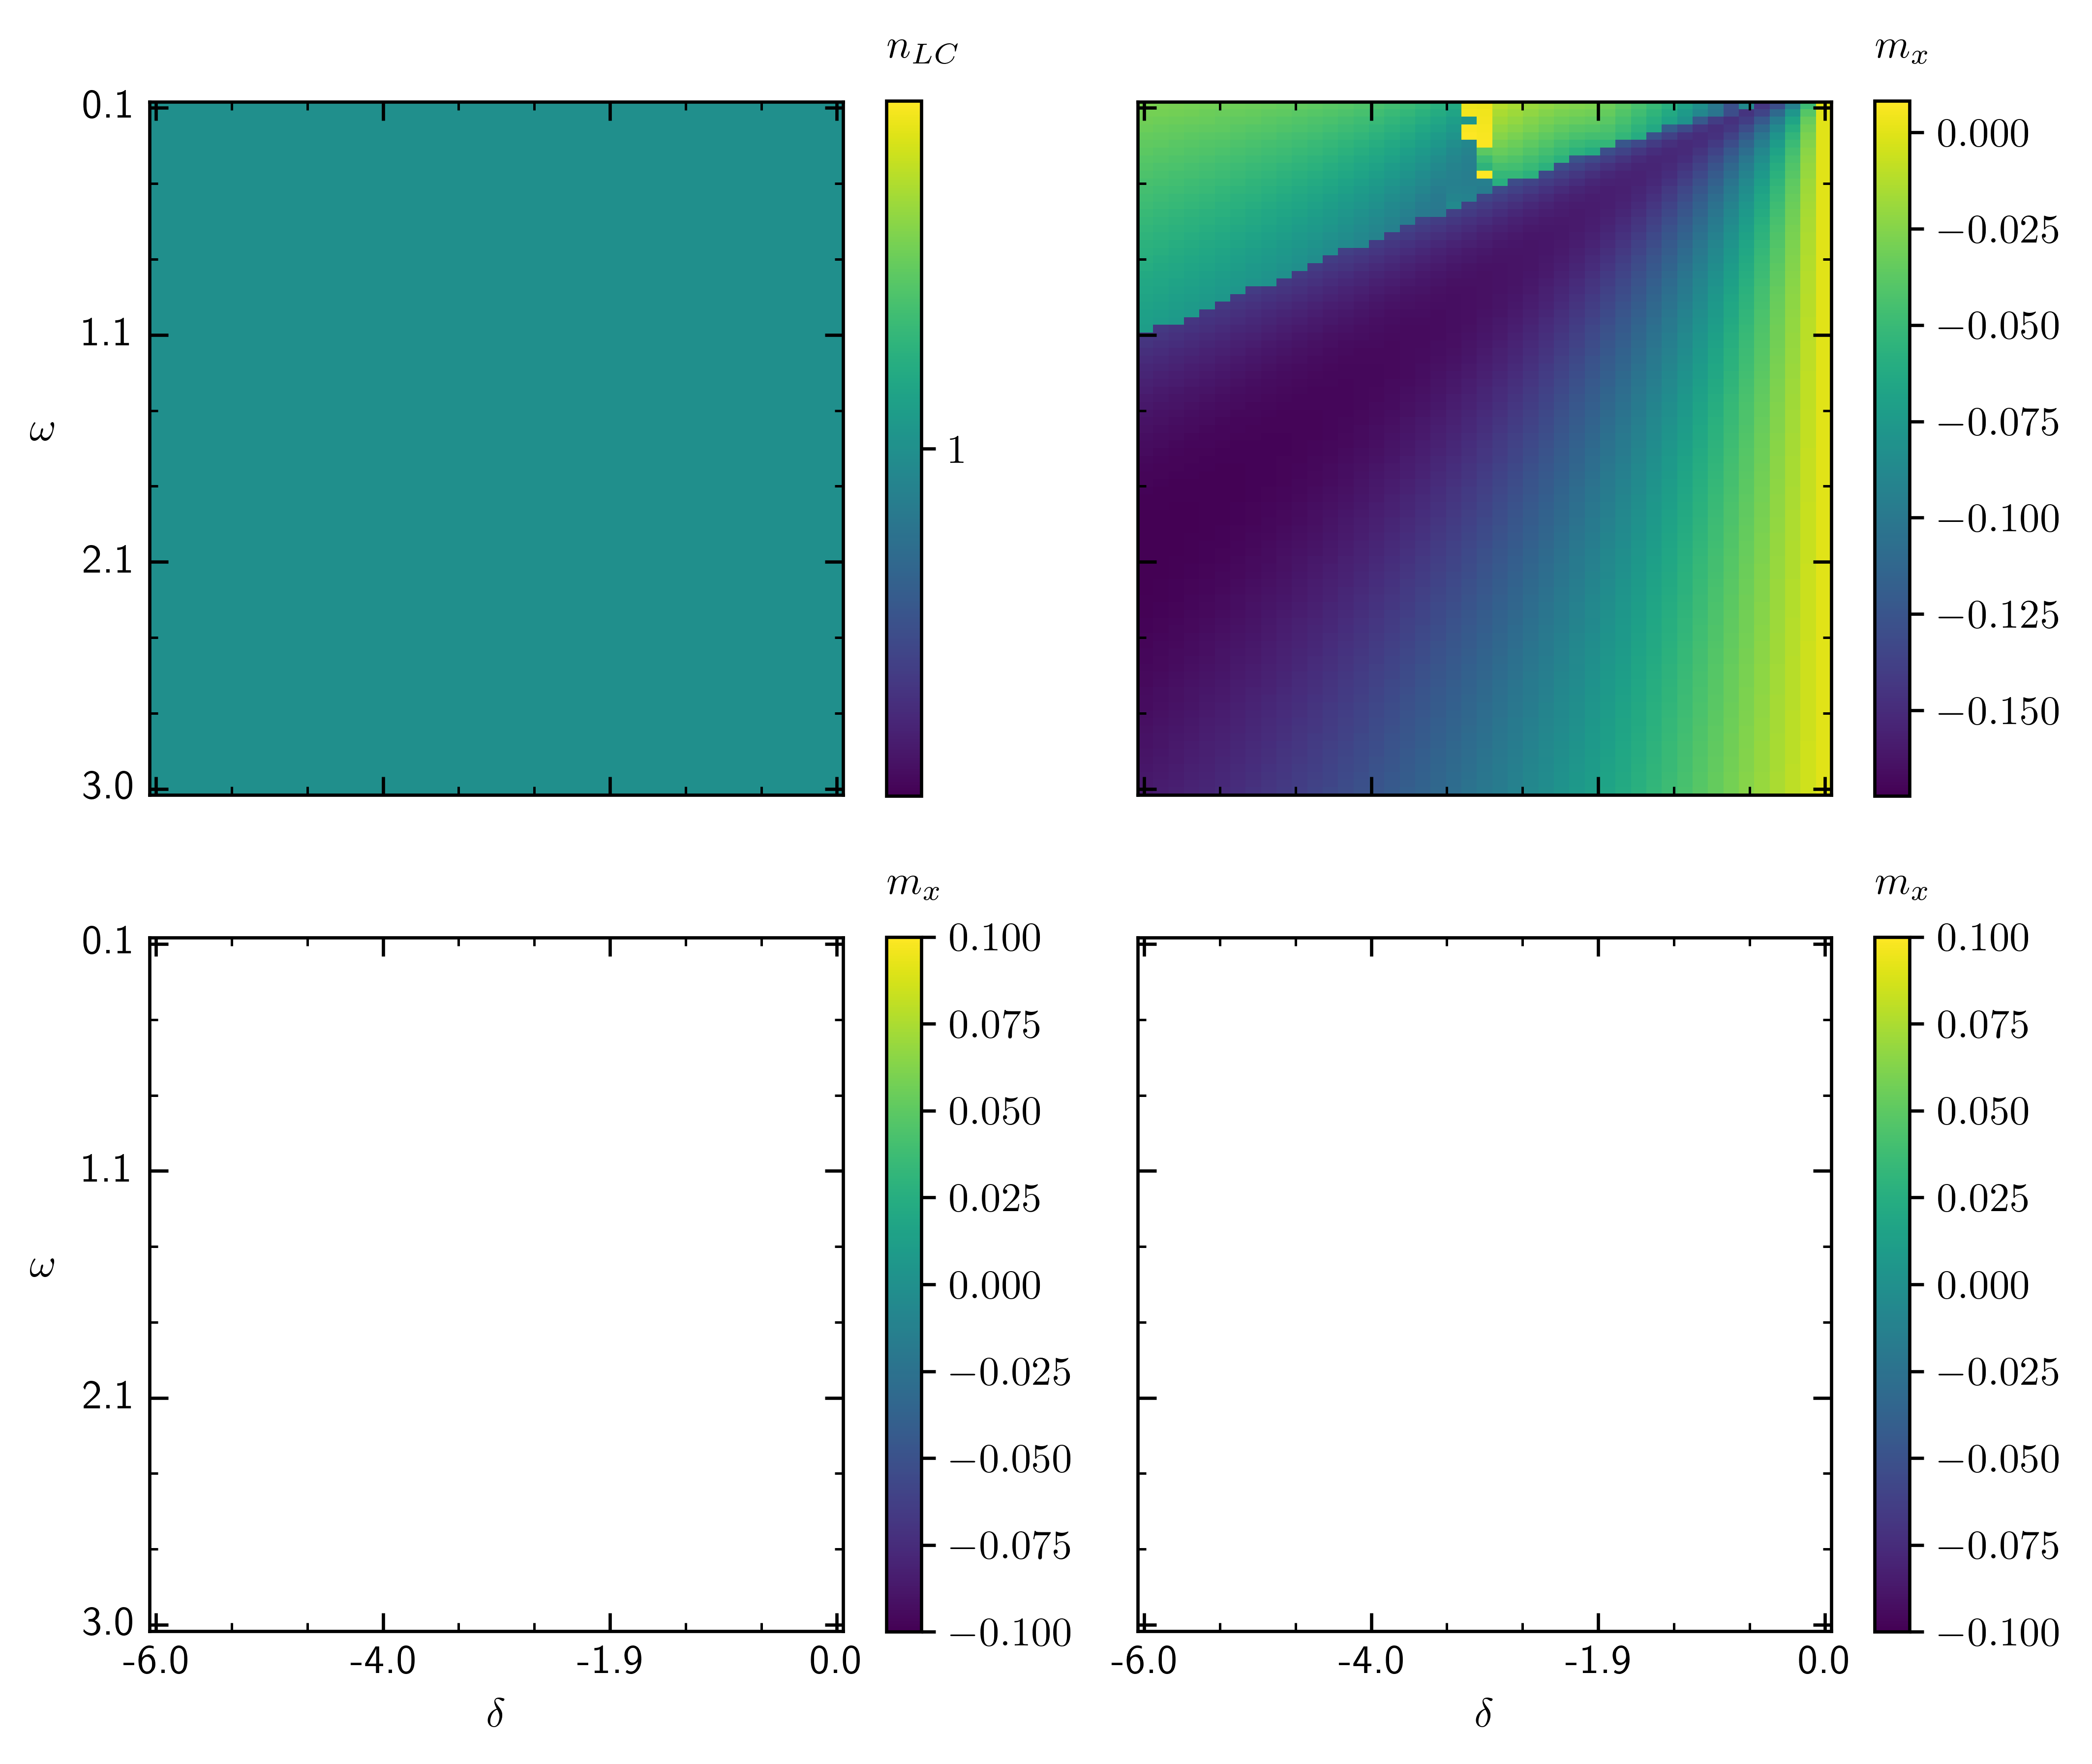

In [97]:
# w_cutarray2 = alternative
# w_cutarray2 = np.load('4.4k13_1.5w5.5_3d/w_cut_aver_p_corrected4.npy')
# w_cutarray2 = np.load('4.4k13_1.5w5.5_3d/DOP_w_cut_aver_p.npy')
# w_cutarray2 = np.load('gamma_var/g_cut_aver_p.npy')
w_cutarray2 = np.load('gamma_var/w_cut_aver_p.npy')
# w_cutarray2 = np.load('gamma_var/w_cutarray_p.npy')
# print(w_cutarray2)
# w_cutarray2 = np.zeros_like(w_cutarray3)
# w_cutarray2 = w_cutarray3
# period_found2 = np.load('4.4k13_1.5w5.5_3d/w_cut_period_status2.npy')
w_cutarray = np.zeros_like(w_cutarray2)
numberc_w = np.zeros((w_cutarray2.shape[0],w_cutarray2.shape[1]))
period_found = np.zeros_like(numberc_w)
gridpoints = w_cutarray2.shape[0]
print(w_cutarray.shape)
halfgrid = gridpoints//2+gridpoints%2

# gamma = np.linspace(0.1,6,gridpoints)
gamma_cut = 3#gamma[85]
# k= np.linspace(4.4,13,gridpoints)
kappa_cut = 5#k[80]
# k = np.linspace(14.2,16,gridpoints)
gamma = np.linspace(0.1,5,gridpoints)
omega_cut = 0.75
w= np.linspace(0.1,3,gridpoints)
d = np.linspace(-6,0,halfgrid)
def fill(m,n):
    gap = n-len(m)
    return m+gap*[np.array([np.nan,np.nan,np.nan])]#[m[0]]
def count_cycles(m,numb):
    
    # print(m.shape)
    s = dist(m,5*1e-3)
    # print(s)
    if not s:
        return 0, np.zeros((3,numb))
    if len(s)<=1:
        # print(s)
        s = s[0]
        return 1, np.array(numb*[s]).T
    # print(len(s))
    elif len(s)<numb:
        # print(s)
        return len(s), np.sort(np.array(fill(s,numb)).T,axis=1)
    s = np.array(s).T
    # print(s.shape[1])
    s = np.sort(s,axis=1)
    return s.shape[1], s

count = 0
interesting = []
for i in range(w_cutarray2.shape[0]):
    for j in range(w_cutarray2.shape[1]):
        numberc_w[i,j], w_cutarray[i,j,:] = count_cycles(w_cutarray2[i,j],33)
        
        # if i<10 and j>62 and j<67:
        if numberc_w[i,j]>1:
                # print(i,j)
                numberc_w[i,j]=1
                w_cutarray[i,j,:,0] = np.mean(trajec[count,0,1:,:],axis=1)
                count+=1
                # interesting.append((w[i],d[j]))
        if numberc_w[i,j]==1:
            w_cutarray[i,j,:,1:] = np.nan
        elif numberc_w[i,j]==2:
            w_cutarray[i,j,:,2:] = np.nan
        elif numberc_w[i,j]==3:
            w_cutarray[i,j,:,3:] = np.nan


        
        #     numberc_w[i,j]=8
        # if i==krow and np.any(j==np.array(intersting_j)):
        #     numberc_w[i,j]=-1
        # # a, b=count_cycles(w_cutarray2[i,j],15)
        # print(b.shape)
        # period_found[i,j] = period_found2.shape[2]-np.sum(period_found2[i,j])


def area_select(i,j):
    i , j = int(i), int(j)
    l = numberc_w.shape[0]
    hit_count = 0
    for n in range(2):
        if numberc_w[min(int(i+n),l-1),j]==1 or numberc_w[max(0,int(i-n)),j]==1:
            hit_count+=1
        if numberc_w[min(int(i+n),l-1),j]>1 or numberc_w[max(0,int(i-n)),j]>1:
            hit_count-=1
    # if hit_count>1:
    #     return True
    # hit_count = 0
    for n in range(2):
        if numberc_w[i,min(int(j+n),l-1)]==1 or numberc_w[i,max(0,int(j-n))]==1:
            hit_count+=1
        if numberc_w[i,min(int(j+n),l-1)]>1 or numberc_w[i,max(0,int(j-n))]>1:
            hit_count-=1
    if np.abs(hit_count)<3:
        return True
    return False
# selected_area = np.zeros_like(numberc_w)
# for i in range(w_cutarray2.shape[0]):
#     for j in range(w_cutarray2.shape[0]):
#         selected_area[i,j] = area_select(i,j)
            # w_cutarray[i,j,:] = np.sort(w_cutarray3[i,j])


tickformat = Format(xscale=d,yscale=w,xprec="{:.1f}",yprec="{:.1f}")
# plots = [stab_xsol,stab_ysol,stab_zsol]
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=18,\
                        xtick_step_minor=6,\
                            ytick_step_major=18,\
                                ytick_step_minor=6)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
plot_dim = (-0.5, 54.5, 54.5, -0.5)
setup.fig_width= 20.6*cm
setup.fig_height=20.6*cm #29.1*cm
# im = plt.imshow(numberc_w)
# # plt.hlines(14,id1+2,id2-3)
# plt.hlines(10,60,70)
# plt.vlines(67,0,50)
# plt.vlines(62,0,50)
# plt.arrow(0,10,3,0,color='1',head_width=0.8,head_length=1,facecolor='0')
heat_extent = plot_dim
setup.DEFAULT_HEAT_EXTEND =  heat_extent
fig, ax = setup.return_fig(shape=(2,2),dots_per_inch=600,yax_share='all',joined=True)

shrink_cbar = 0.69
x_pos = 58
y_pos = -4
trash, xw, yw, trash=heat_extent#im1.get_extent()#
numb_xticks = xw//tickp.major_xtick_step
numb_yticks = yw//tickp.major_ytick_step
im1 = ax[0,1].imshow(w_cutarray[:,:,0,0],extent=plot_dim)
cbar1 = fig.colorbar(im1,ax=ax[0,1],orientation='vertical',shrink=shrink_cbar)
ax[0,1].tick_params(axis='y',direction='in',which='both',bottom=True,top=True,labelleft=False,labelright=False)
# ax[0,1].set_xlabel(r'$\delta$')
ax[0,1].text(x_pos,y_pos,r'$m_x$')
im2 = ax[0,0].imshow(numberc_w,extent=plot_dim)
ax[0,0].tick_params(axis='y',direction='in',which='both',bottom=True,top=True,labelleft=True)
cbar2 = fig.colorbar(im2,ax=ax[0,0],orientation='vertical',shrink=shrink_cbar,ticks=[1,2,3])
# ax[0,0].set_xlabel(r'$\delta$')
ax[0,0].text(x_pos,y_pos,r'$n_{LC}$')
ax[0,0].set_ylabel(r'$\omega$',rotation=0,labelpad=10)
# ax[0,0].arrow(0,10,3,0,color='1',head_width=0.8,head_length=1,facecolor='1')
# ax[0,0].arrow(50,36,-3,0,color='1',head_width=0.8,head_length=1,facecolor='1')

im3 = ax[1,0].imshow(w_cutarray[:,:,0,1],extent=plot_dim)#+4*(1-numberc_w))
# im3 = ax[1,0].imshow(selected_area)#+4*(1-numberc_w))
ax[1,0].tick_params(axis='y',direction='in',which='both',bottom=True,top=True,labelleft=True)
ax[1,0].set_xlabel(r'$\delta$')
ax[1,0].text(x_pos,y_pos,r'$m_x$')
ax[1,0].set_ylabel(r'$\omega$',rotation=0,labelpad=10)
cbar3 = fig.colorbar(im3,ax=ax[1,0],orientation='vertical',shrink=shrink_cbar)
# ax[1,0].hlines(6,0,50)
im4 = ax[1,1].imshow(w_cutarray[:,:,0,2],extent=plot_dim)#+4*(1-numberc_w))
# im3 = ax[1,1].imshow(selected_area)#+4*(1-numberc_w))
ax[1,1].tick_params(axis='y',direction='in',which='both',bottom=True,top=True,labelleft=False)
ax[1,1].set_xlabel(r'$\delta$')
ax[1,1].text(x_pos,y_pos,r'$m_x$')
cbar4 = fig.colorbar(im4,ax=ax[1,1],orientation='vertical',shrink=shrink_cbar)
ax[1,1].tick_params(axis='y',direction='in',which='both',bottom=True,top=True,labelleft=False,labelright=False)
# ax[1,1].hlines(6,0,50)
plt.subplots_adjust(wspace=0.14,hspace=-0.17)
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+'limit_cycle_mean.png',bbox_inches='tight')
plt.show()

In [11]:
def fill_binary(length,numb):
    diff = length -len('{:b}'.format(numb))
    if diff:
        return diff*'0'
    else:
        return ''

def starting_grid(expansion,resolution):
    # points = np.zeros((resolution,resolution,resolution,3))
    flat = []
    stepsize = expansion/(resolution-1)
    for i in range(resolution):
        for j in range(resolution):
            for l in range(resolution):
                a = 0b000
                for n in range(7):
                    b = '{}{:b}'.format(fill_binary(3,a),a)
                    b= np.array([*b],dtype=np.int32)
                    a +=1
                    # print(1-2*b)
                    # print(np.array([i,j,l])*(1-2*b))
                    p1 = np.array([i,j,l])*(1-2*b)*stepsize
                    if np.linalg.norm(p1)<=0.5:
                        flat.append(p1)
    out = [flat[0]]
    for i in range(1,len(flat)):
        take = 1
        for j in range(len(out)):
            if np.linalg.norm(flat[i]-out[j])==0:
                # print('sorted out')
                take =0
        if take:
            out.append(flat[i])

    return np.row_stack(out)

start = starting_grid(0.62,3)
start.shape

(19, 3)

In [28]:
def starting_points2(numb):
    points = np.zeros((numb,3))
    for i in range(numb):
        phi = random()*2*np.pi
        theta = random()*np.pi
        r = random()*0.5
        points[i,:] = r*np.sin(theta)*np.cos(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(theta)
    return points
start = starting_points2(3)

In [29]:
numb_of_tsteps =10000
k = [0.5,2,5]
w = [0.4,1.5,4]
d = [0.3,1.7,3]
grid = len(k)
# trajec = np.zeros((len(interesting),start.shape[0],4,numb_of_tsteps))
# trajec = np.zeros(3*[len(k)]+[start.shape[0]]+[4]+[numb_of_tsteps])
trajec = [[[],[],[]],[[],[],[]],[[],[],[]]]
from multiprocessing import Pool

def wrapper(index):
    ik, iw, id = index//(grid**2), (index%(grid**2))//grid,index%grid
    arguments = (w[iw], k[ik], d[id], 0 ,0)
    # traj = np.zeros((start.shape[0],4,numb_of_tsteps))
    traj = []
    for i, s in enumerate(start):
        
        # tr = solve_ivp(gl2,(0,1000),y0=s,args=arguments,method='DOP853',t_eval=np.linspace(0,1000,numb_of_tsteps),rtol=1e-10)
        tr = solve_ivp(gl2,(0,1000),y0=s,args=arguments,method='DOP853',rtol=1e-10)
        traj.append(np.row_stack((tr.t,tr.y)))
    return traj
po = Pool(9)
result = po.imap(wrapper,np.arange(grid**3),chunksize=1)
for index, res in enumerate(result):
    ik, iw, id = index//(grid**2), (index%(grid**2))//grid,index%grid
    trajec[ik][iw].append(res)


In [30]:
arguments = (w[0], k[0], d[1], 0 ,0)
# traj = np.zeros((start.shape[0],4,numb_of_tsteps))
traj = []
for i, s in enumerate(start):
    
    # tr = solve_ivp(gl2,(0,1000),y0=s,args=arguments,method='DOP853',t_eval=np.linspace(0,1000,numb_of_tsteps),rtol=1e-10)
    tr = solve_ivp(gl2,(0,1000),y0=s,args=arguments,method='DOP853',rtol=1e-10)
    traj.append(np.row_stack((tr.t,tr.y)))

5 4 3
0
1
2


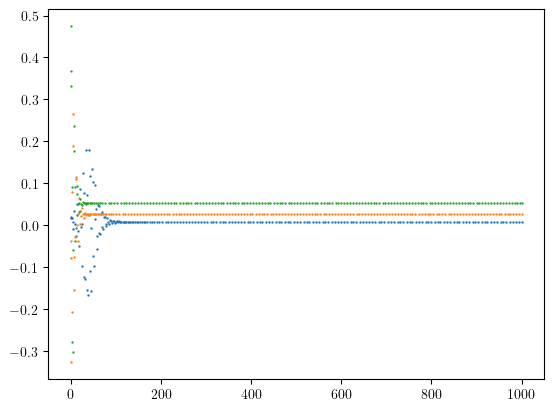

In [31]:
plt.figure()
trajs = traj
print(kval,wval,dval)
# a = np.zeros(start.shape[0])
# for i in range(start.shape[0]):
#     a[i] = np.linalg.norm(np.std(trajs[i][1:],axis=1))
# b = np.sort(a)
# print(b)
for i in range(start.shape[0]):
    print(i)
    # if a[i]<=b[0]+0.01:
    plt.scatter(trajs[i][0,:],trajs[i][2,:])
plt.show()

0.5 0.4 0.3


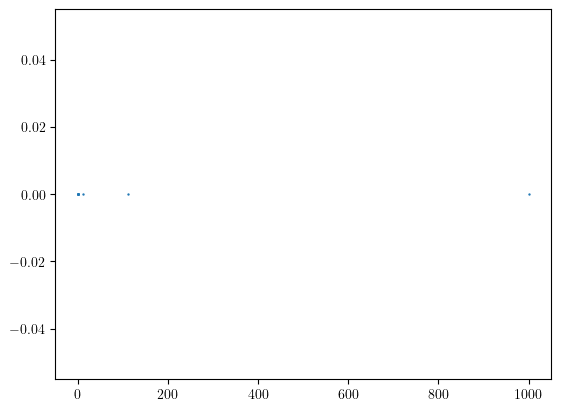

0.5 0.4 1.7


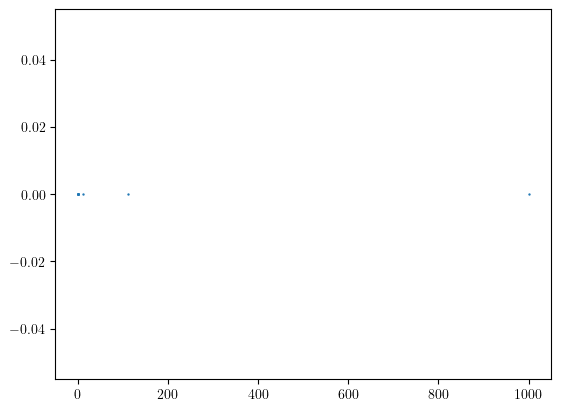

0.5 0.4 3


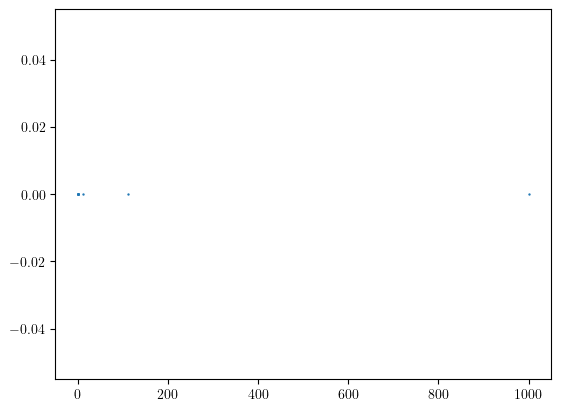

0.5 1.5 0.3


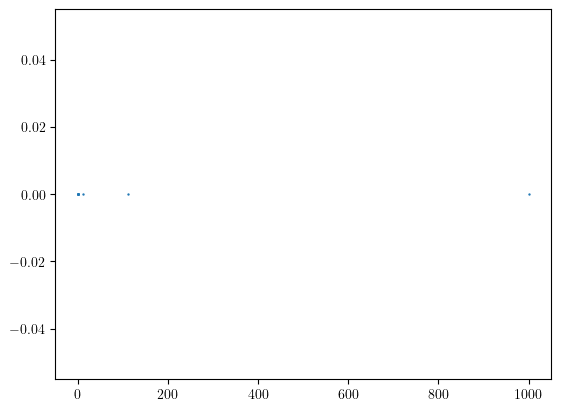

0.5 1.5 1.7


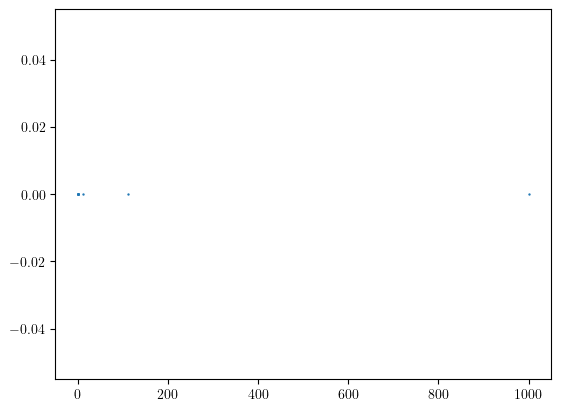

0.5 1.5 3


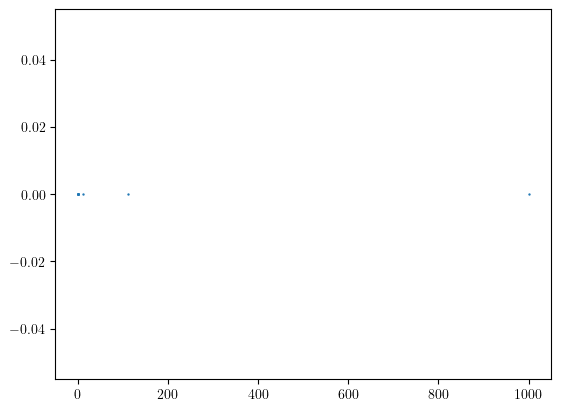

0.5 4 0.3


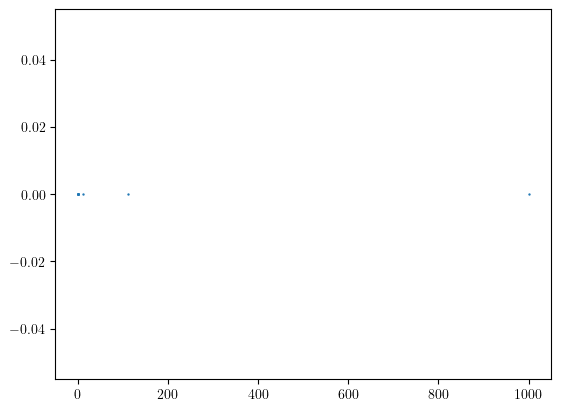

0.5 4 1.7


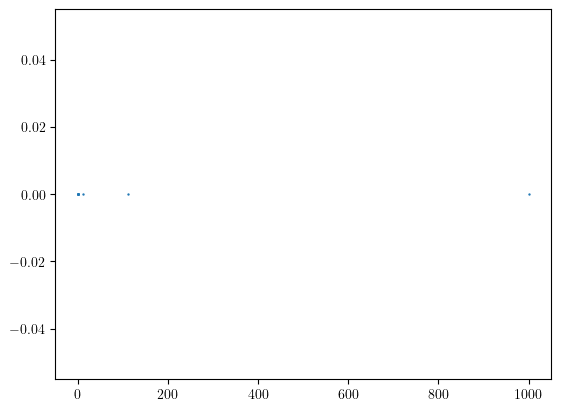

0.5 4 3


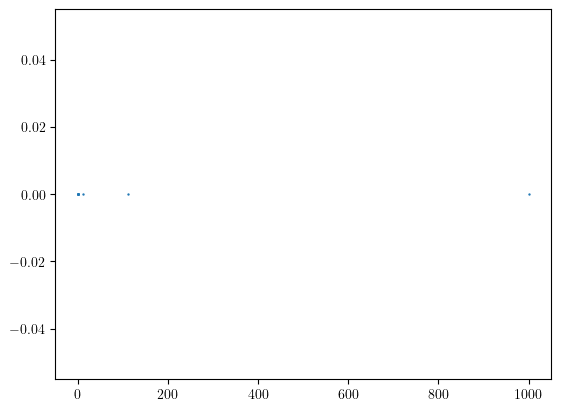

2 0.4 0.3


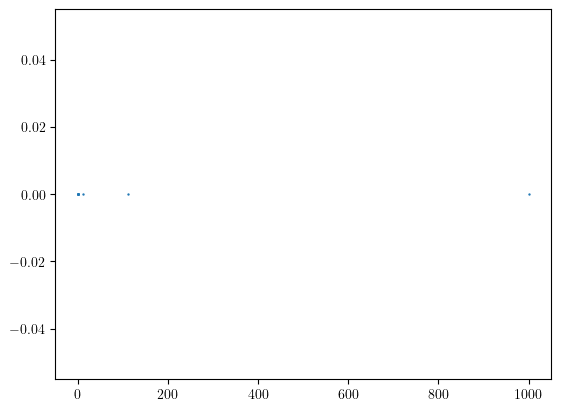

2 0.4 1.7


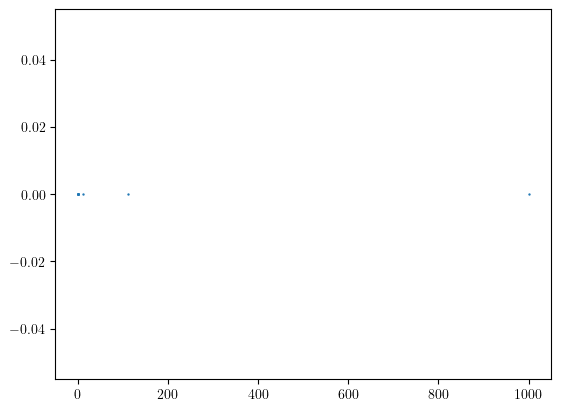

2 0.4 3


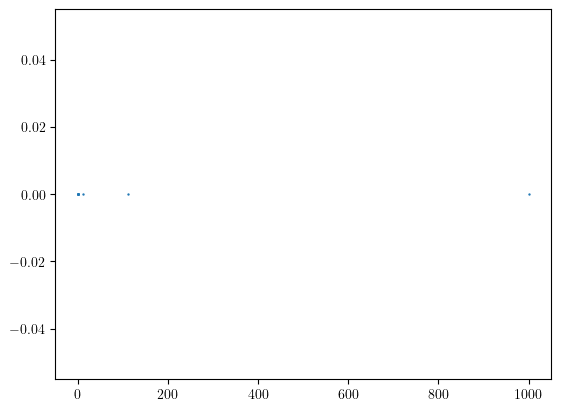

2 1.5 0.3


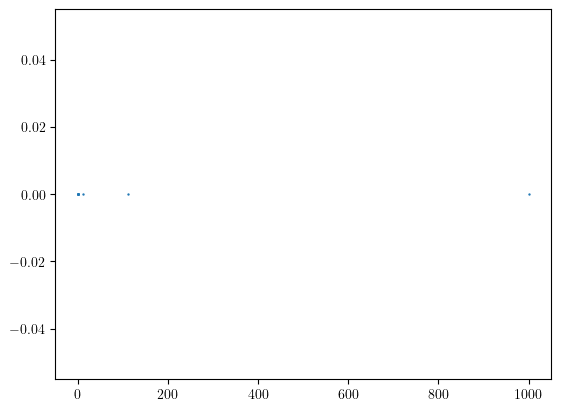

2 1.5 1.7


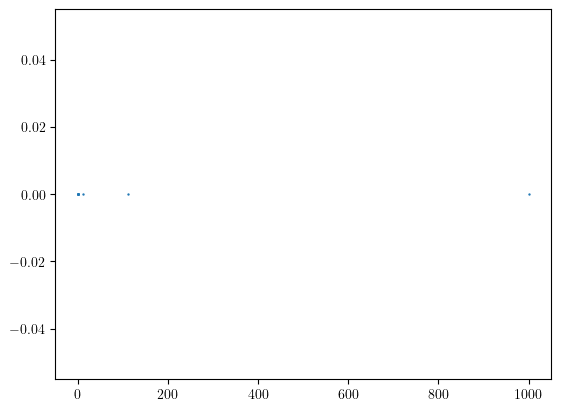

2 1.5 3


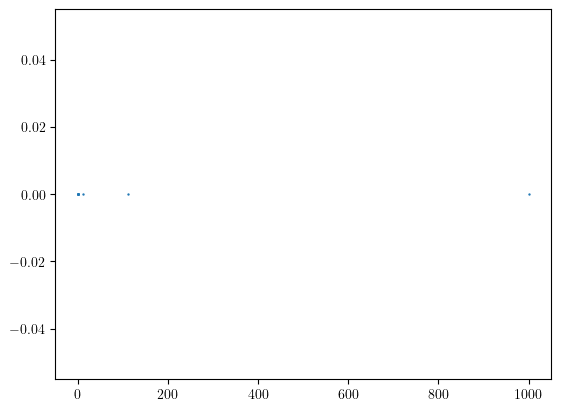

2 4 0.3


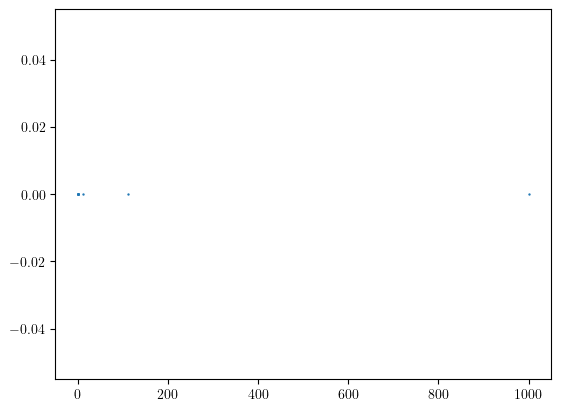

2 4 1.7


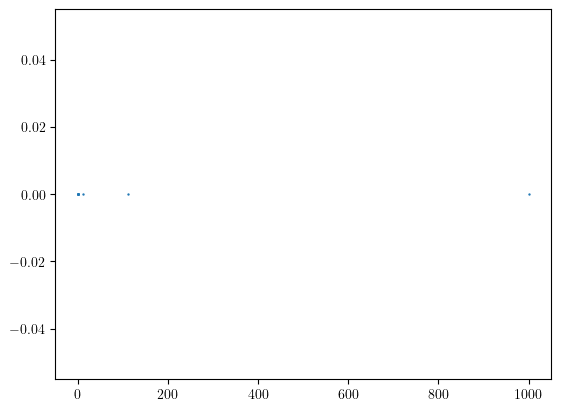

2 4 3


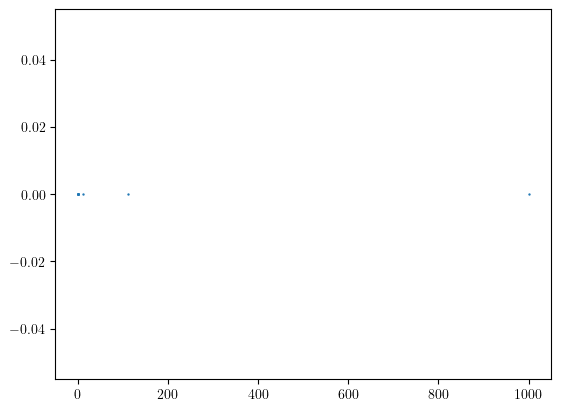

5 0.4 0.3


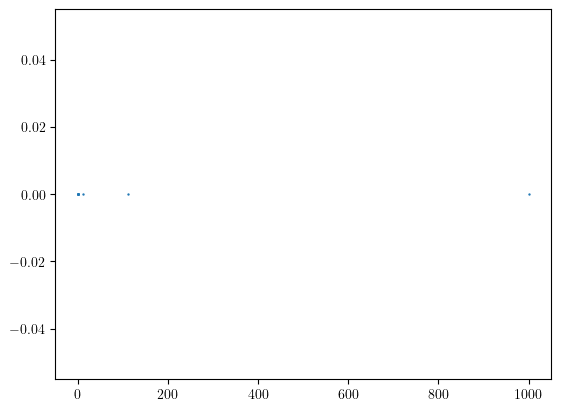

5 0.4 1.7


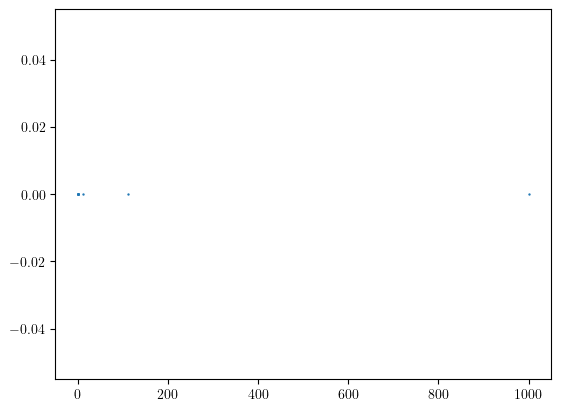

5 0.4 3


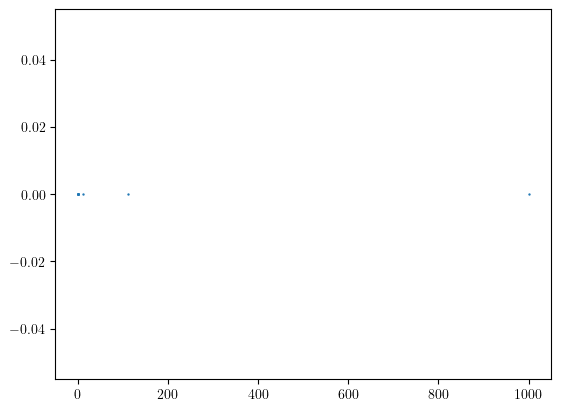

5 1.5 0.3


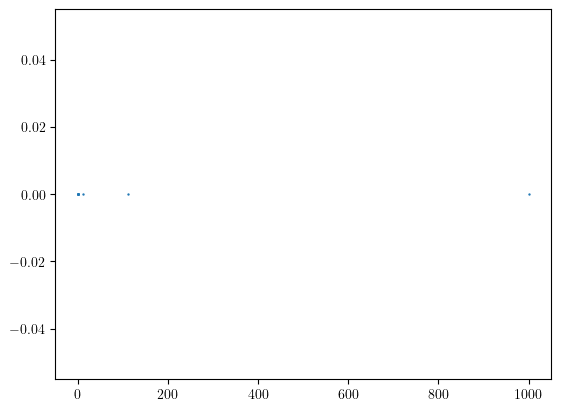

5 1.5 1.7


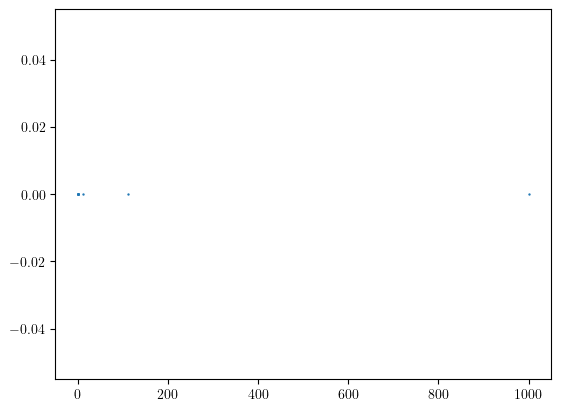

5 1.5 3


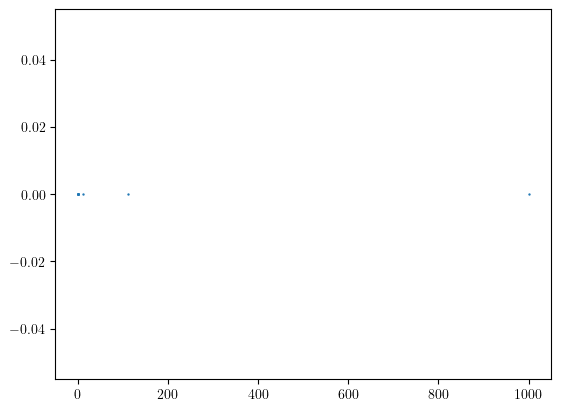

5 4 0.3


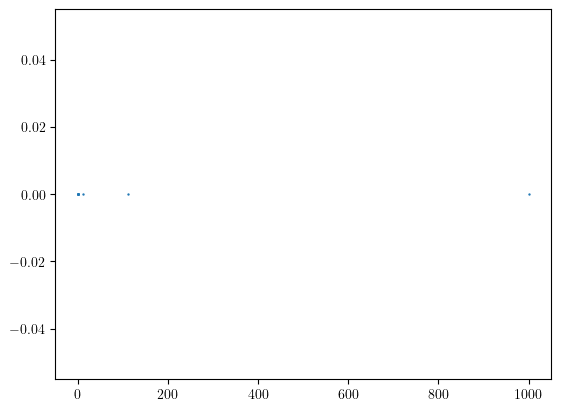

5 4 1.7


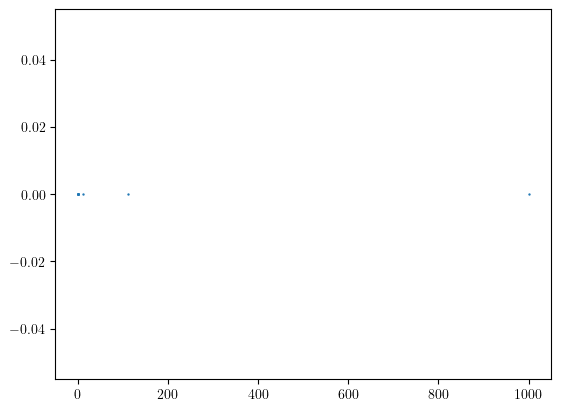

5 4 3


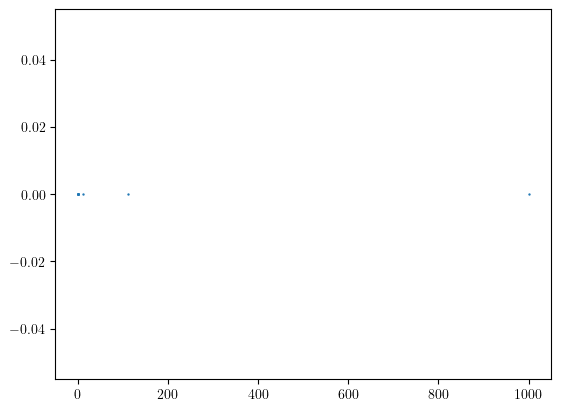

In [24]:
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            plt.figure()
            trajs = trajec[ik][iw][id]
            print(kval,wval,dval)
            # a = np.zeros(start.shape[0])
            # for i in range(start.shape[0]):
            #     a[i] = np.linalg.norm(np.std(trajs[i][1:],axis=1))
            # b = np.sort(a)
            # print(b)
            for i in range(start.shape[0]):
                
                # if a[i]<=b[0]+0.01:
                plt.scatter(trajs[i][0,:],trajs[i][2,:])
            plt.show()
    

In [21]:
cutg = np.zeros_like(g_cutarray)
numberc_g = np.zeros((g_cutarray.shape[0],g_cutarray.shape[1]))
for i in range(g_cutarray.shape[0]):
    for j in range(g_cutarray.shape[1]):
        numberc_g[i,j], cutg[i,j] = count_cycles(k_cutarray[i,j],k_cutarray.shape[-1])
        if numberc_g[i,j] >1:
            print(i,j)

0 42


In [26]:
w[0], d[42]

(0.04, -0.2727272727272734)

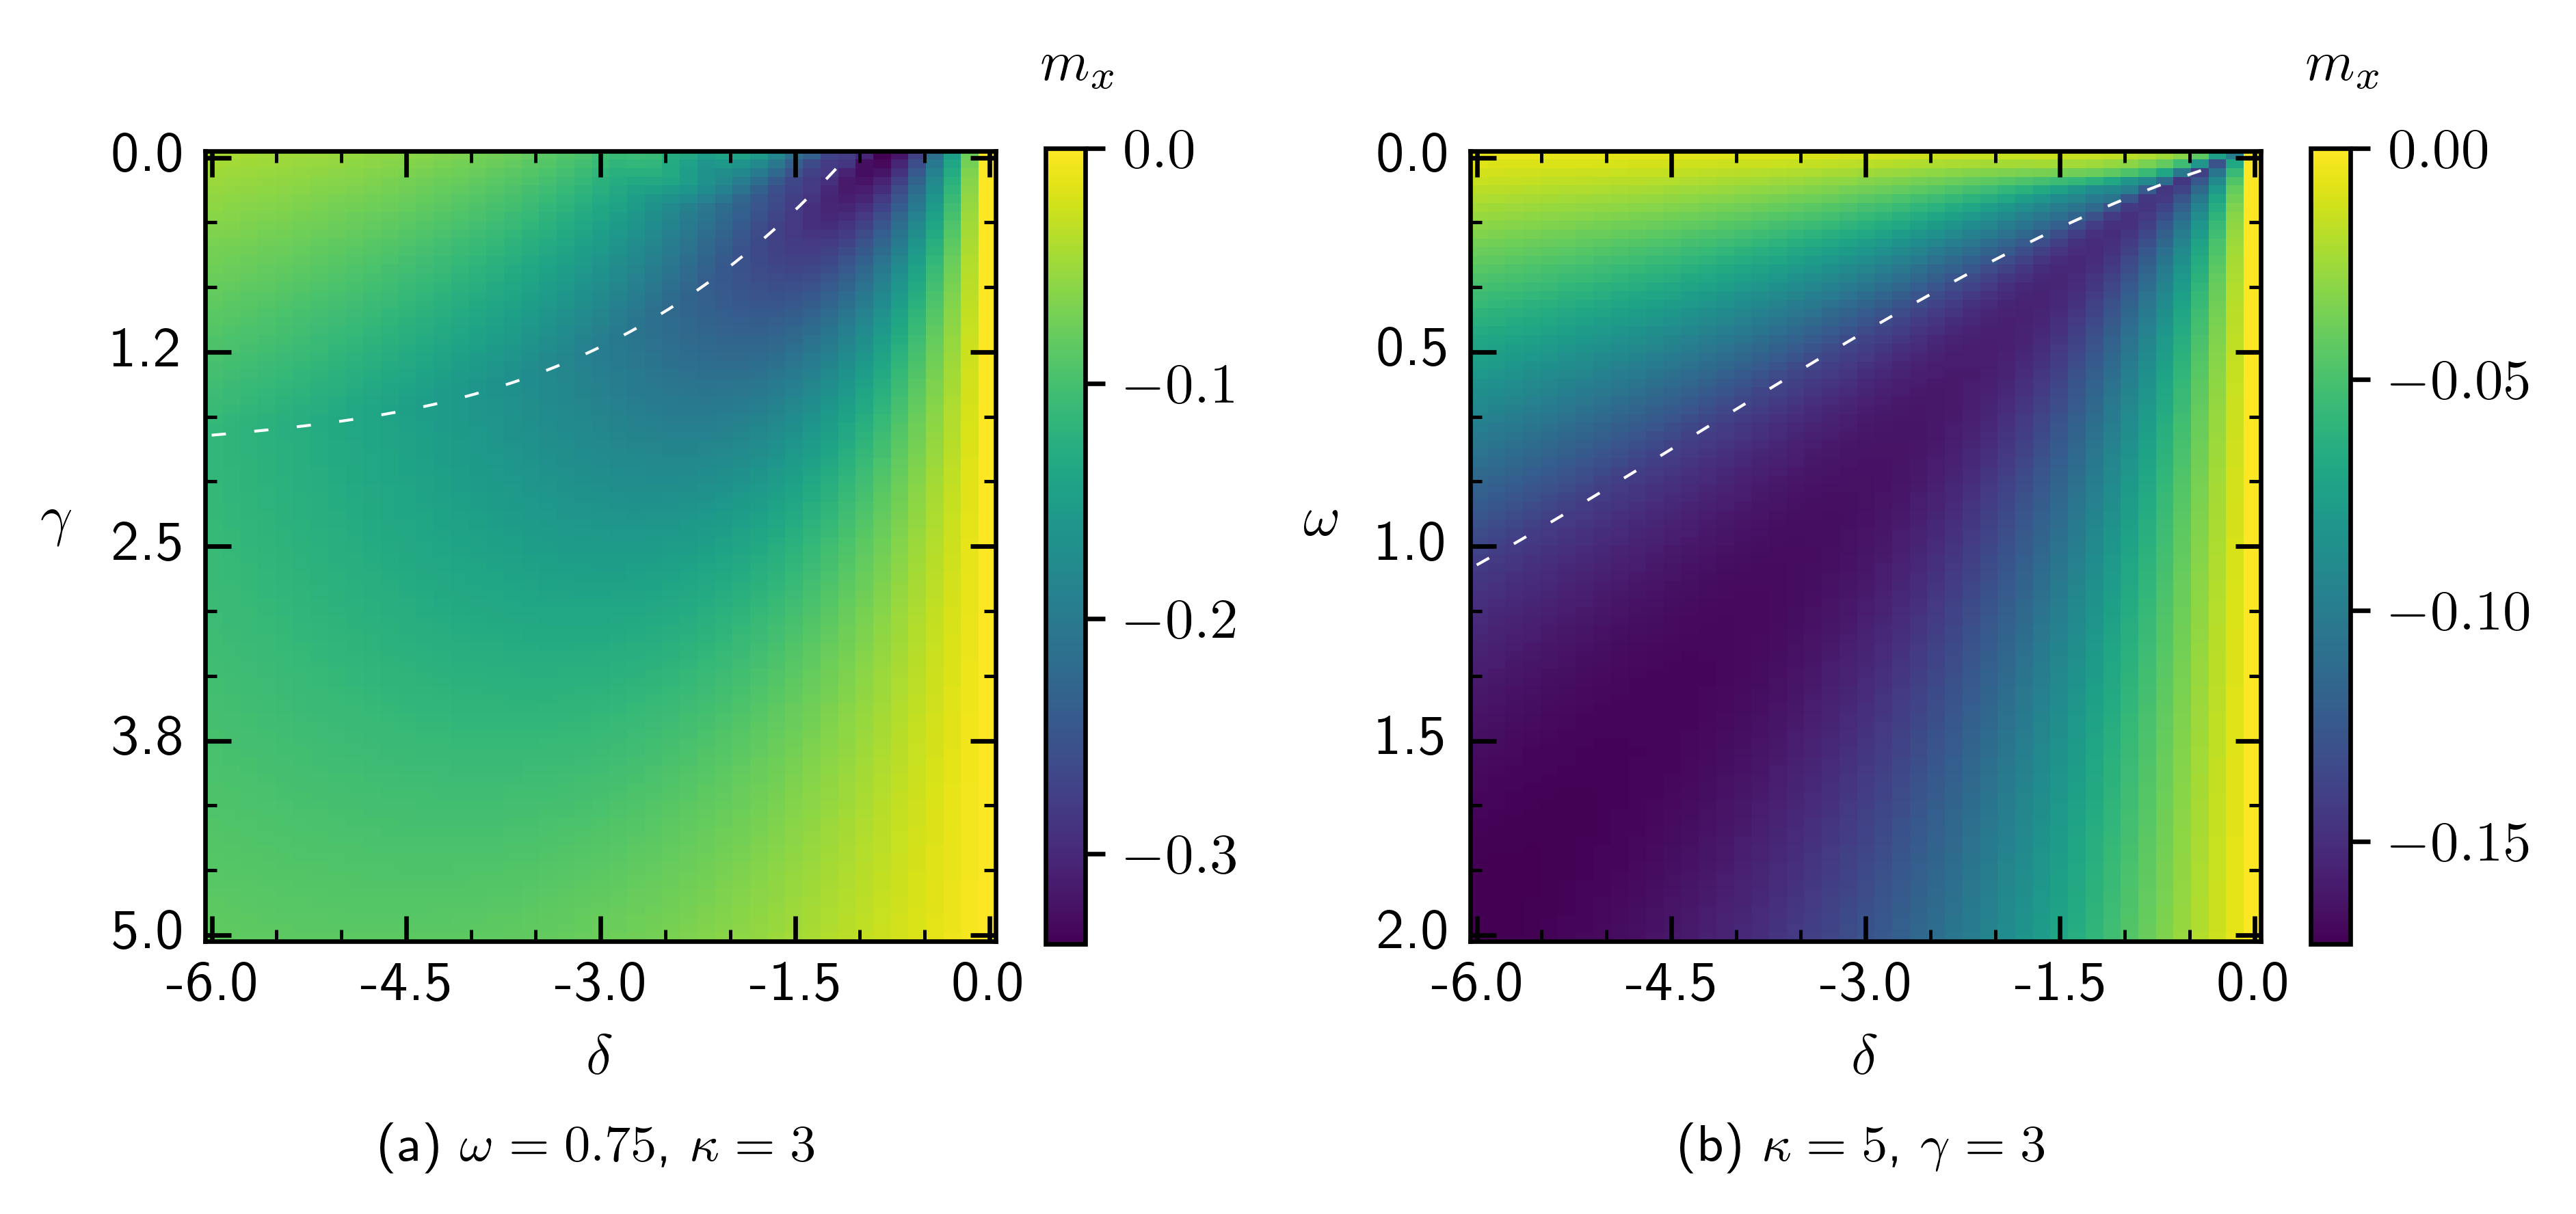

In [ ]:
# g_cutarray = np.load('gamma_var/g_cut_aver_p_2_2.npy')
# for i in range(g_cutarray.shape[0]):
#     for j in range(g_cutarray.shape[1]):
#         g_cutarray[i,j,:,:] = np.sort(g_cutarray[i,j,:,:],axis=0)
# print(xsol_gcut.shape)
# gridpoints = g_cutarray.shape[0]
# gamma_cut = 6#gamma[85]
# # k= np.linspace(4.4,13,gridpoints)
# kappa_cut = 17#k[80]
# k = np.linspace(14,18,gridpoints)
# gamma = np.linspace(4,10,gridpoints)
# wval = 0.75
# d = np.linspace(-4,0,gridpoints//2)
# gridpoints=90
gridpoints = g_cutarray.shape[0]

halfgrid = gridpoints//2+gridpoints%2

# gamma = np.linspace(0.1,6,gridpoints)
gamma_cut = 3#gamma[85]
# k= np.linspace(4.4,13,gridpoints)
kappa_cut1 = 3#k[80]
kappa_cut2 =5
# k = np.linspace(14.2,16,gridpoints)
gamma = np.linspace(0,5,gridpoints)
omega_cut = 0.75
w= np.linspace(0.04,2,gridpoints)
d = np.linspace(-6,0,halfgrid)
shrink_cbar = 0.8

tickformat = Format(xscale=d,yscale=gamma,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=15,\
                        xtick_step_minor=5,\
                            ytick_step_major=15,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
setup.fig_width= 18*cm
setup.fig_height=8*cm #29.1*cm
setup.DEFAULT_HEAT_EXTEND = (-0.5,60.5,60.5,-0.5)#im1.get_extent()#
fig, ax = setup.return_fig(shape=(1,2),dots_per_inch=600) 
im1 = ax[0].imshow(g_cutarray[:,:,0,0],extent=(-0.5,60.5,60.5,-0.5))
# im1 = ax[0].imshow(xsol_kcut[:,:,0])
# im1 = ax[0].imshow(stab_xsol_gcut[:,:45],extent=setup.DEFAULT_HEAT_EXTEND)
# im1 = ax[0].imshow(k_cutarray[:,:,0,0],extent=(-0.5,60.5,60.5,-0.5))
colorbar = fig.colorbar(im1,ax=ax[0],shrink=shrink_cbar)
im2 = ax[1].imshow(k_cutarray[:,:,0,0],extent=(-0.5,60.5,60.5,-0.5))
# im2 = ax[1].imshow(numberc_g,extent=(-0.5,60.5,60.5,-0.5))

tickformat2 = Format(xscale=d,yscale=w,xprec="{:.1f}",yprec="{:.1f}")
tickformat2.numb_xticks = tickformat.numb_xticks
tickformat2.numb_yticks = tickformat.numb_yticks

ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(tickformat2.formaty1))  
# im2 = ax[1].imshow(xsol_gcut[:,:,0])
# im2 = ax[1].imshow(stab_xsol_wcut[:,:45],extent=setup.DEFAULT_HEAT_EXTEND)
colorbar2 = fig.colorbar(im2,ax=ax[1],shrink=shrink_cbar)
x_pos= 64
y_pos= -6
ax[0].text(x=x_pos,y=y_pos,s=r'$m_x$')
ax[1].text(x=x_pos,y=y_pos,s=r'$m_x$')
ax[0].set_title(r'(a) $\omega={:.2f}$, $\kappa={:d}$'.format(omega_cut,kappa_cut1),fontsize=9,loc='center',y=-0.32)
ax[1].set_title(r'(b) $\kappa={:d}$, $\gamma={:d}$'.format(kappa_cut2,gamma_cut),fontsize=9,loc='center',y=-0.32)
ax[0].set_xlabel(r'$\delta$')
ax[1].set_xlabel(r'$\delta$')
ax[0].set_ylabel(r'$\gamma$',rotation=0,labelpad=10)
ax[1].set_ylabel(r'$\omega$',rotation=0,labelpad=10)
plt.subplots_adjust(wspace=0.28)
xg = np.linspace(0,g_border[0,1]+1)
xw = np.linspace(0,w_border[0,1]+1)
ax[0].plot(xg,spline(xg,*g_sp_param[0]),color='1',linestyle=(0, (5, 10)),linewidth=0.5)
ax[1].plot(xw,spline(xw,*w_sp_param[0]),color='1',linestyle=(0, (5, 10)),linewidth=0.5)
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+'limit_cycle_mean_gw.png',bbox_inches='tight')
plt.show()
# g_cutarray[:,:,0,0]

In [21]:
stab_xsol_gcut.shape

(90, 90)

22


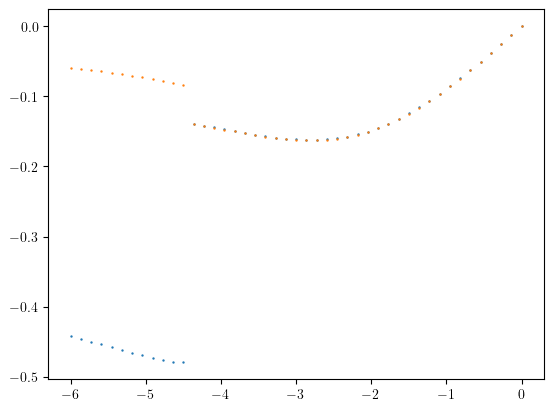

In [113]:
def find_index(dv,param):
  
    dind =0
    
  
    for id, dval in enumerate(param):
        if dval>=dv:
            dind = id
            break
    return dind

print(find_index(0.8,w))
ig, iw =find_index(3,gamma), find_index(0.75,w)
stab_xsol_gcut.shape, stab_xsol_wcut.shape, d.shape
plt.figure()
plt.scatter(d,g_cutarray[ig,:halfgrid,0,0])
plt.scatter(d,w_cutarray[iw,:halfgrid,0,0])
plt.show()

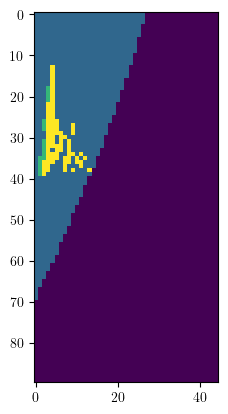

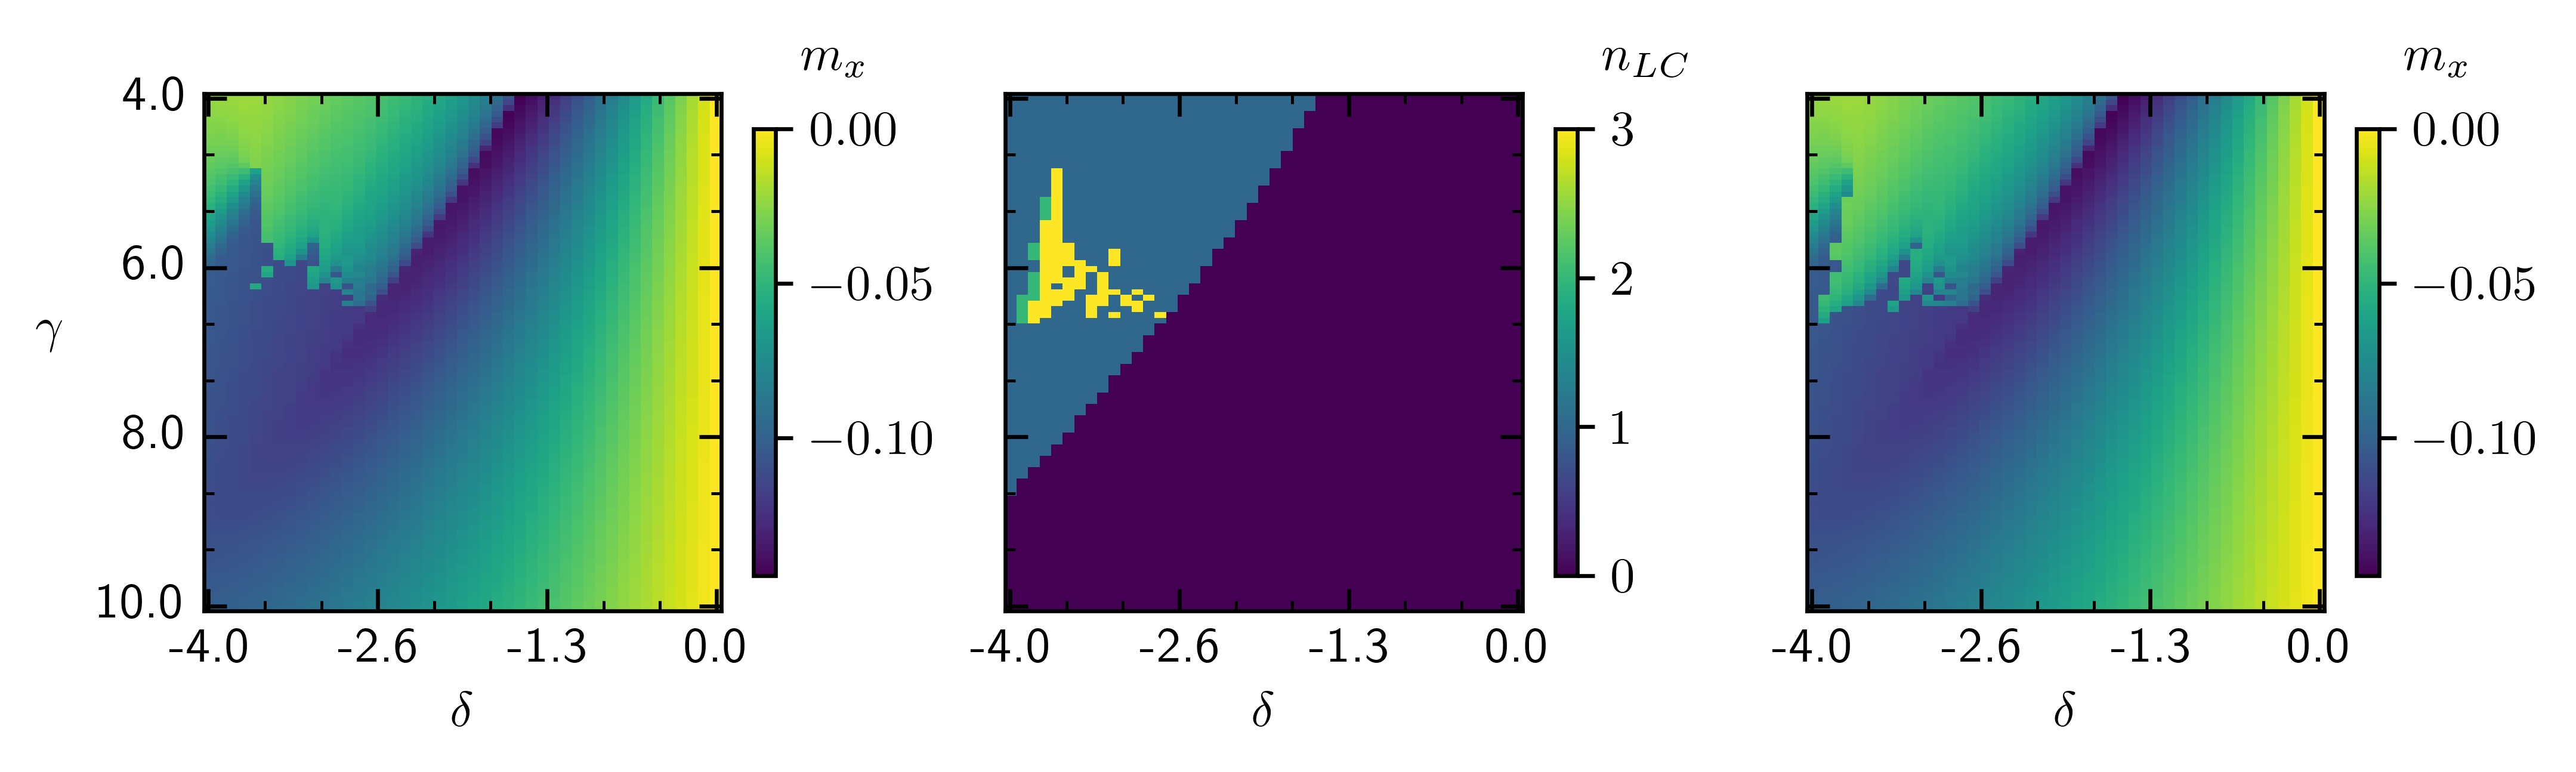

In [30]:
arr = k_cutarray
numberc = numberc_k
tickformat = Format(xscale=d,yscale=gamma,xprec="{:.1f}",yprec="{:.1f}")
# plots = [stab_xsol,stab_ysol,stab_zsol]
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=18,\
                        xtick_step_minor=6,\
                            ytick_step_major=18,\
                                ytick_step_minor=6)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
plot_dim = (-0.5, 54.5, 54.5, -0.5)
setup.fig_width= 20.6*cm
setup.fig_height=20.6*cm #29.1*cm
im = plt.imshow(numberc)
# plt.hlines(6,id1,id2)
# # plt.vlines(21,0,50)
# # plt.vlines(33,0,50)
# plt.arrow(0,10,3,0,color='1',head_width=0.8,head_length=1,facecolor='0')
heat_extent = plot_dim
setup.DEFAULT_HEAT_EXTEND =  heat_extent
fig, ax = setup.return_fig(shape=(1,3),dots_per_inch=600,yax_share='all',joined=True)

shrink_cbar = 0.2
x_pos = 63
y_pos = -3
trash, xw, yw, trash=heat_extent#im1.get_extent()#
numb_xticks = xw//tickp.major_xtick_step
numb_yticks = yw//tickp.major_ytick_step
im1 = ax[0].imshow(arr[:,:,0,0],extent=plot_dim)
cbar1 = fig.colorbar(im1,ax=ax[0],orientation='vertical',shrink=shrink_cbar)
# ax[0].set_ylabel(r'$\kappa$',rotation=0,labelpad=10)
ax[0].set_ylabel(r'$\gamma$',rotation=0,labelpad=10)
ax[0].set_xlabel(r'$\delta$')
ax[0].text(x_pos,y_pos,r'$m_x$')
im2 = ax[1].imshow(numberc,extent=plot_dim)
ax[1].tick_params(axis='y',direction='in',which='both',bottom=True,top=True,labelleft=False)
cbar2 = fig.colorbar(im2,ax=ax[1],orientation='vertical',shrink=shrink_cbar)
ax[1].set_xlabel(r'$\delta$')
ax[1].text(x_pos,y_pos,r'$n_{LC}$')
# ax[1].arrow(0,10,3,0,color='1',head_width=0.8,head_length=1,facecolor='1')
# ax[1].arrow(50,36,-3,0,color='1',head_width=0.8,head_length=1,facecolor='1')

im3 = ax[2].imshow(arr[:,:,0,1],extent=plot_dim)#+4*(1-numberc))
# im3 = ax[2].imshow(selected_area)#+4*(1-numberc))
ax[2].tick_params(axis='y',direction='in',which='both',bottom=True,top=True,labelleft=False)
ax[2].set_xlabel(r'$\delta$')
ax[2].text(x_pos,y_pos,r'$m_x$')
cbar3 = fig.colorbar(im3,ax=ax[2],orientation='vertical',shrink=shrink_cbar)
# ax[2].hlines(6,0,50)
plt.subplots_adjust(wspace=0.24)
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+'lc_mean_k_cut.png',bbox_inches='tight')
plt.show()

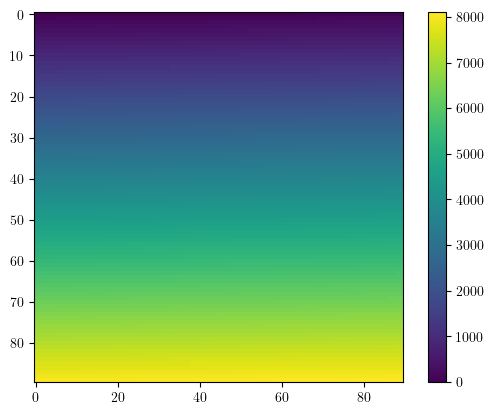

In [22]:
# grid = np.zeros((27,18))
grid = stab_xsol[:-1,:,:-1]
# grid2 = np.zeros_like(grid)
grid2 = np.zeros((grid.shape[0],grid.shape[2]))
halfgrid =grid.shape[0]
grid3 = np.zeros_like(grid2)
for gridx in range(3):
    for gridy in range(3):
        # print('section ',gridx,gridy)
        subgridx=grid.shape[0]//3
        subgridd = grid.shape[1]//3
        i_mat = np.zeros((subgridx,subgridd),dtype=np.int32)
        for row in range(subgridx):
            i_mat[row,:] = np.arange(subgridd)+subgridd*3*row+3*subgridx*subgridd*gridx+subgridd*gridy
        # grid[gridx*subgridx:(gridx+1)*subgridx,gridy*subgridd:(gridy+1)*subgridd] = i_mat
        result = np.reshape(i_mat,(subgridx*subgridd))
        for index, res in enumerate(result):
            l, m = index//subgridd, index%subgridd
            ind = int(i_mat[l,m])
            i, j = ind//halfgrid, ind%halfgrid
            # print('real_indices: ',i,j)
            grid3[i,j]= (halfgrid)*i+j
            grid2[i,j] = grid[i,g_cut,j]
            # print('imat indices: ',l,m)
            # print('indices from imat: ',ind)


# print(grid-grid2)
fig, ax = plt.subplots(1,1)
im = ax.imshow(grid3)
cbar = fig.colorbar(im,ax=ax)
plt.show()


In [93]:
root_path = '/home/christian/Documents/Bachelor/numerics/mean_field/4.4k13_1.5w5.5_3d/'
w_cutarray = np.load(root_path+'DOP_w_cut_aver_p.npy')


In [90]:
root_path = '/home/christian/Documents/Bachelor/numerics/mean_field/4.4k13_1.5w5.5_3d/'
name = 'DOP'


namenp_wcut = '_w_cut' + name + '.npy'


solnumb_file_wcut = root_path+ f'solnumb' + namenp_wcut
xsol_file_wcut = root_path+f'xsol' +namenp_wcut
ysol_file_wcut = root_path+f'ysol' +namenp_wcut

# params = np.load(root_path+'params71.npy')
# print('worked')
# k = np.load(root_path+ 'kparam' + namenp)
# w = np.load(root_path+ 'wparam' + namenp)
# d = np.load(root_path+ 'dparam' + namenp)



solution_number_wcut = np.load(solnumb_file_wcut)
xsol_wcut = np.load(xsol_file_wcut)
ysol_wcut = np.load(ysol_file_wcut)
gridpoints = int(solution_number_wcut.shape[0])

# halfgrid = gridpoints//2+gridpoints%2

# gamma = np.linspace(0.1,6,gridpoints)
gamma_cut = 0.2#gamma[85]
# k= np.linspace(4.4,13,gridpoints)

# k = np.linspace(14.2,16,gridpoints)
k = np.linspace(9.751111111111111, 13.0,gridpoints)
d = np.linspace(-3.0, -1.2,gridpoints)
omega_cut = 2.3889
# d = np.linspace(-3,3,gridpoints)



def determine_stability(solnumb,x_sols,y_sols,wval,kval,dval,sgam):
    stability = np.zeros_like(x_sols)
    stability_plus = 0
    for ind in range(int(solnumb)):
        # s = yvariant[ik,ig,id,ind]
        # if s==1:
        #     yofx = y1ofx
        # else:
        #     yofx = y2ofx
        y = y_sols[ind]
        x = x_sols[ind]
        z = m_z(x,y,wval,kval,Gam)
        m = np.array([x,y,z])
        # print(m)
        # jac = jac_gl_np(0,m,wval,kval,dval,Gam,sgam)
        jac = jac2(0,m,wval,kval,dval,Gam,sgam)
        try:
            eigenvalues, vectors =np.linalg.eig(jac)
            # eigi[ik,ig,id,ind,:]=eigenvalues
        except:
            # print(ik,ig,id)
            stability[ind]=-1
            stability_plus=-1
        if np.any(np.real(eigenvalues)>0):
            # if solution_number[ik,ig,id]==3:
                # print(eigenvalues)
            # print(eigenvalues)
            stability[ind]=0
        elif np.any(np.real(eigenvalues==0)):
            stability[ind]=1
            stability_plus=1
        else:
            # pass
            stability[ind] =2
            stability_plus=2
    stability[int(solnumb):]=np.nan
    return stability, stability_plus

stability_plus_wcut = np.zeros_like(solution_number_wcut)
stability_wcut = np.zeros_like(xsol_wcut)
# stability_plus = np.load(root_path+'stability_plus.npy')
# stability = np.load(root_path+'stability.npy')

stab_zsol_wcut = np.ones_like(solution_number_wcut)*np.nan
stab_xsol_wcut = np.ones_like(solution_number_wcut)*np.nan
stab_ysol_wcut = np.ones_like(solution_number_wcut)*np.nan

for io in range(gridpoints):
        for id, dval in enumerate(d):
            stability_wcut[io,id], stability_plus_wcut[io,id]=determine_stability(solution_number_wcut[io,id],xsol_wcut[io,id],ysol_wcut[io,id],omega_cut,k[io],dval,gamma_cut)

            
            if stability_plus_wcut[io,id]:
                # print(kval,wval,dval)
                for n in range(int(solution_number_wcut[io,id])):
                    if stability_wcut[io,id,n]==2:
                        stab_xsol_wcut[io,id]=xsol_wcut[io,id,n]
                        stab_ysol_wcut[io,id] = ysol_wcut[io,id,n]
                        stab_zsol_wcut[io,id] = m_z(xsol_wcut[io,id,n],ysol_wcut[io,id,n],omega_cut,k[io],Gam)
                        break

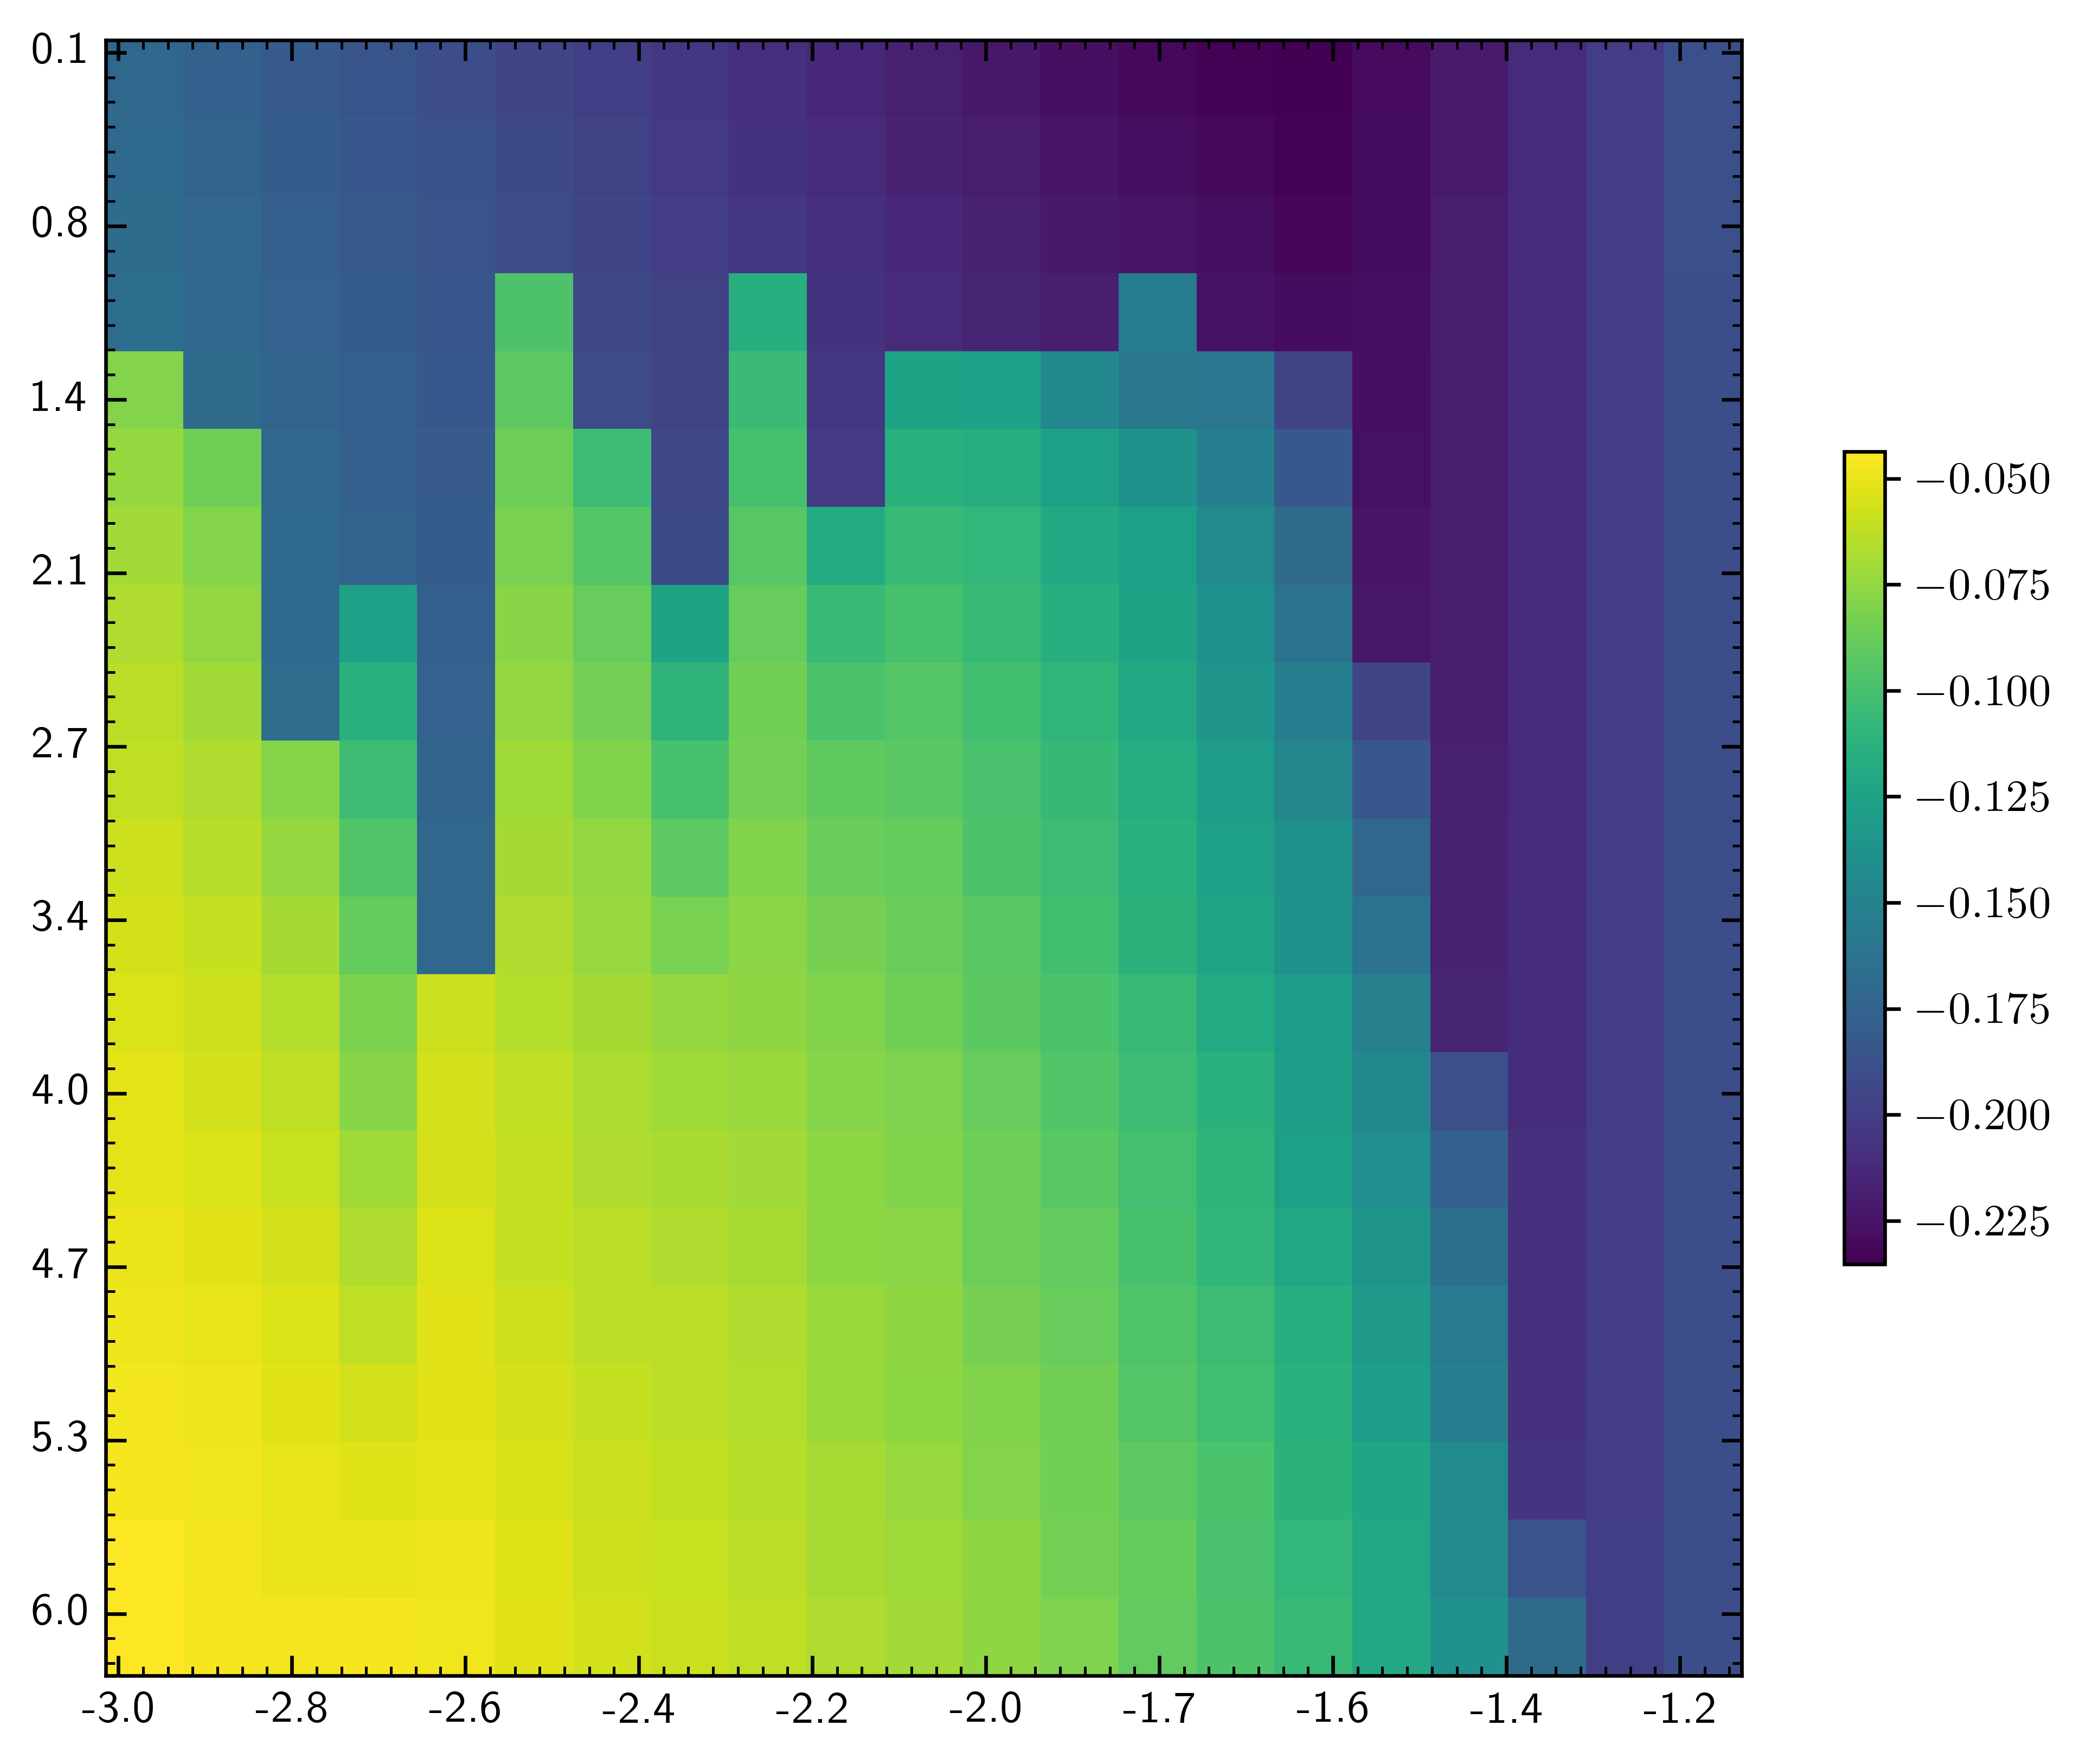

In [94]:
tickformat = Format(xscale=d,yscale=gamma,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=7,\
                        xtick_step_minor=1,\
                            ytick_step_major=7,\
                                ytick_step_minor=1)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
setup.fig_width= 20.6*cm
setup.fig_height=20.6*cm #29.1*cm
setup.DEFAULT_HEAT_EXTEND = (-0.5,65.5,65.5,-0.5)#im1.get_extent()#
fig, ax = setup.return_fig(shape=(1,1),dots_per_inch=600) 
im1 = ax.imshow(w_cutarray[:,:,0,1],extent=(-0.5,65.5,65.5,-0.5))
# im1 = ax[0].imshow(xsol_kcut[:,:,0])
# im1 = ax.imshow(stab_xsol_wcut[:,:])
colorbar = fig.colorbar(im1,ax=ax,shrink=0.4)
# im2 = ax[1].imshow(k_cutarray[:,:,0,2],extent=(-0.5,65.5,65.5,-0.5))
# # im2 = ax[1].imshow(xsol_gcut[:,:,0])
# # im2 = ax[1].imshow(stab_xsol_gcut[:,:])
# #
# colorbar2 = fig.colorbar(im2,ax=ax[1],shrink=0.4)
plt.show()
# g_cutarray[:,:,0,0]

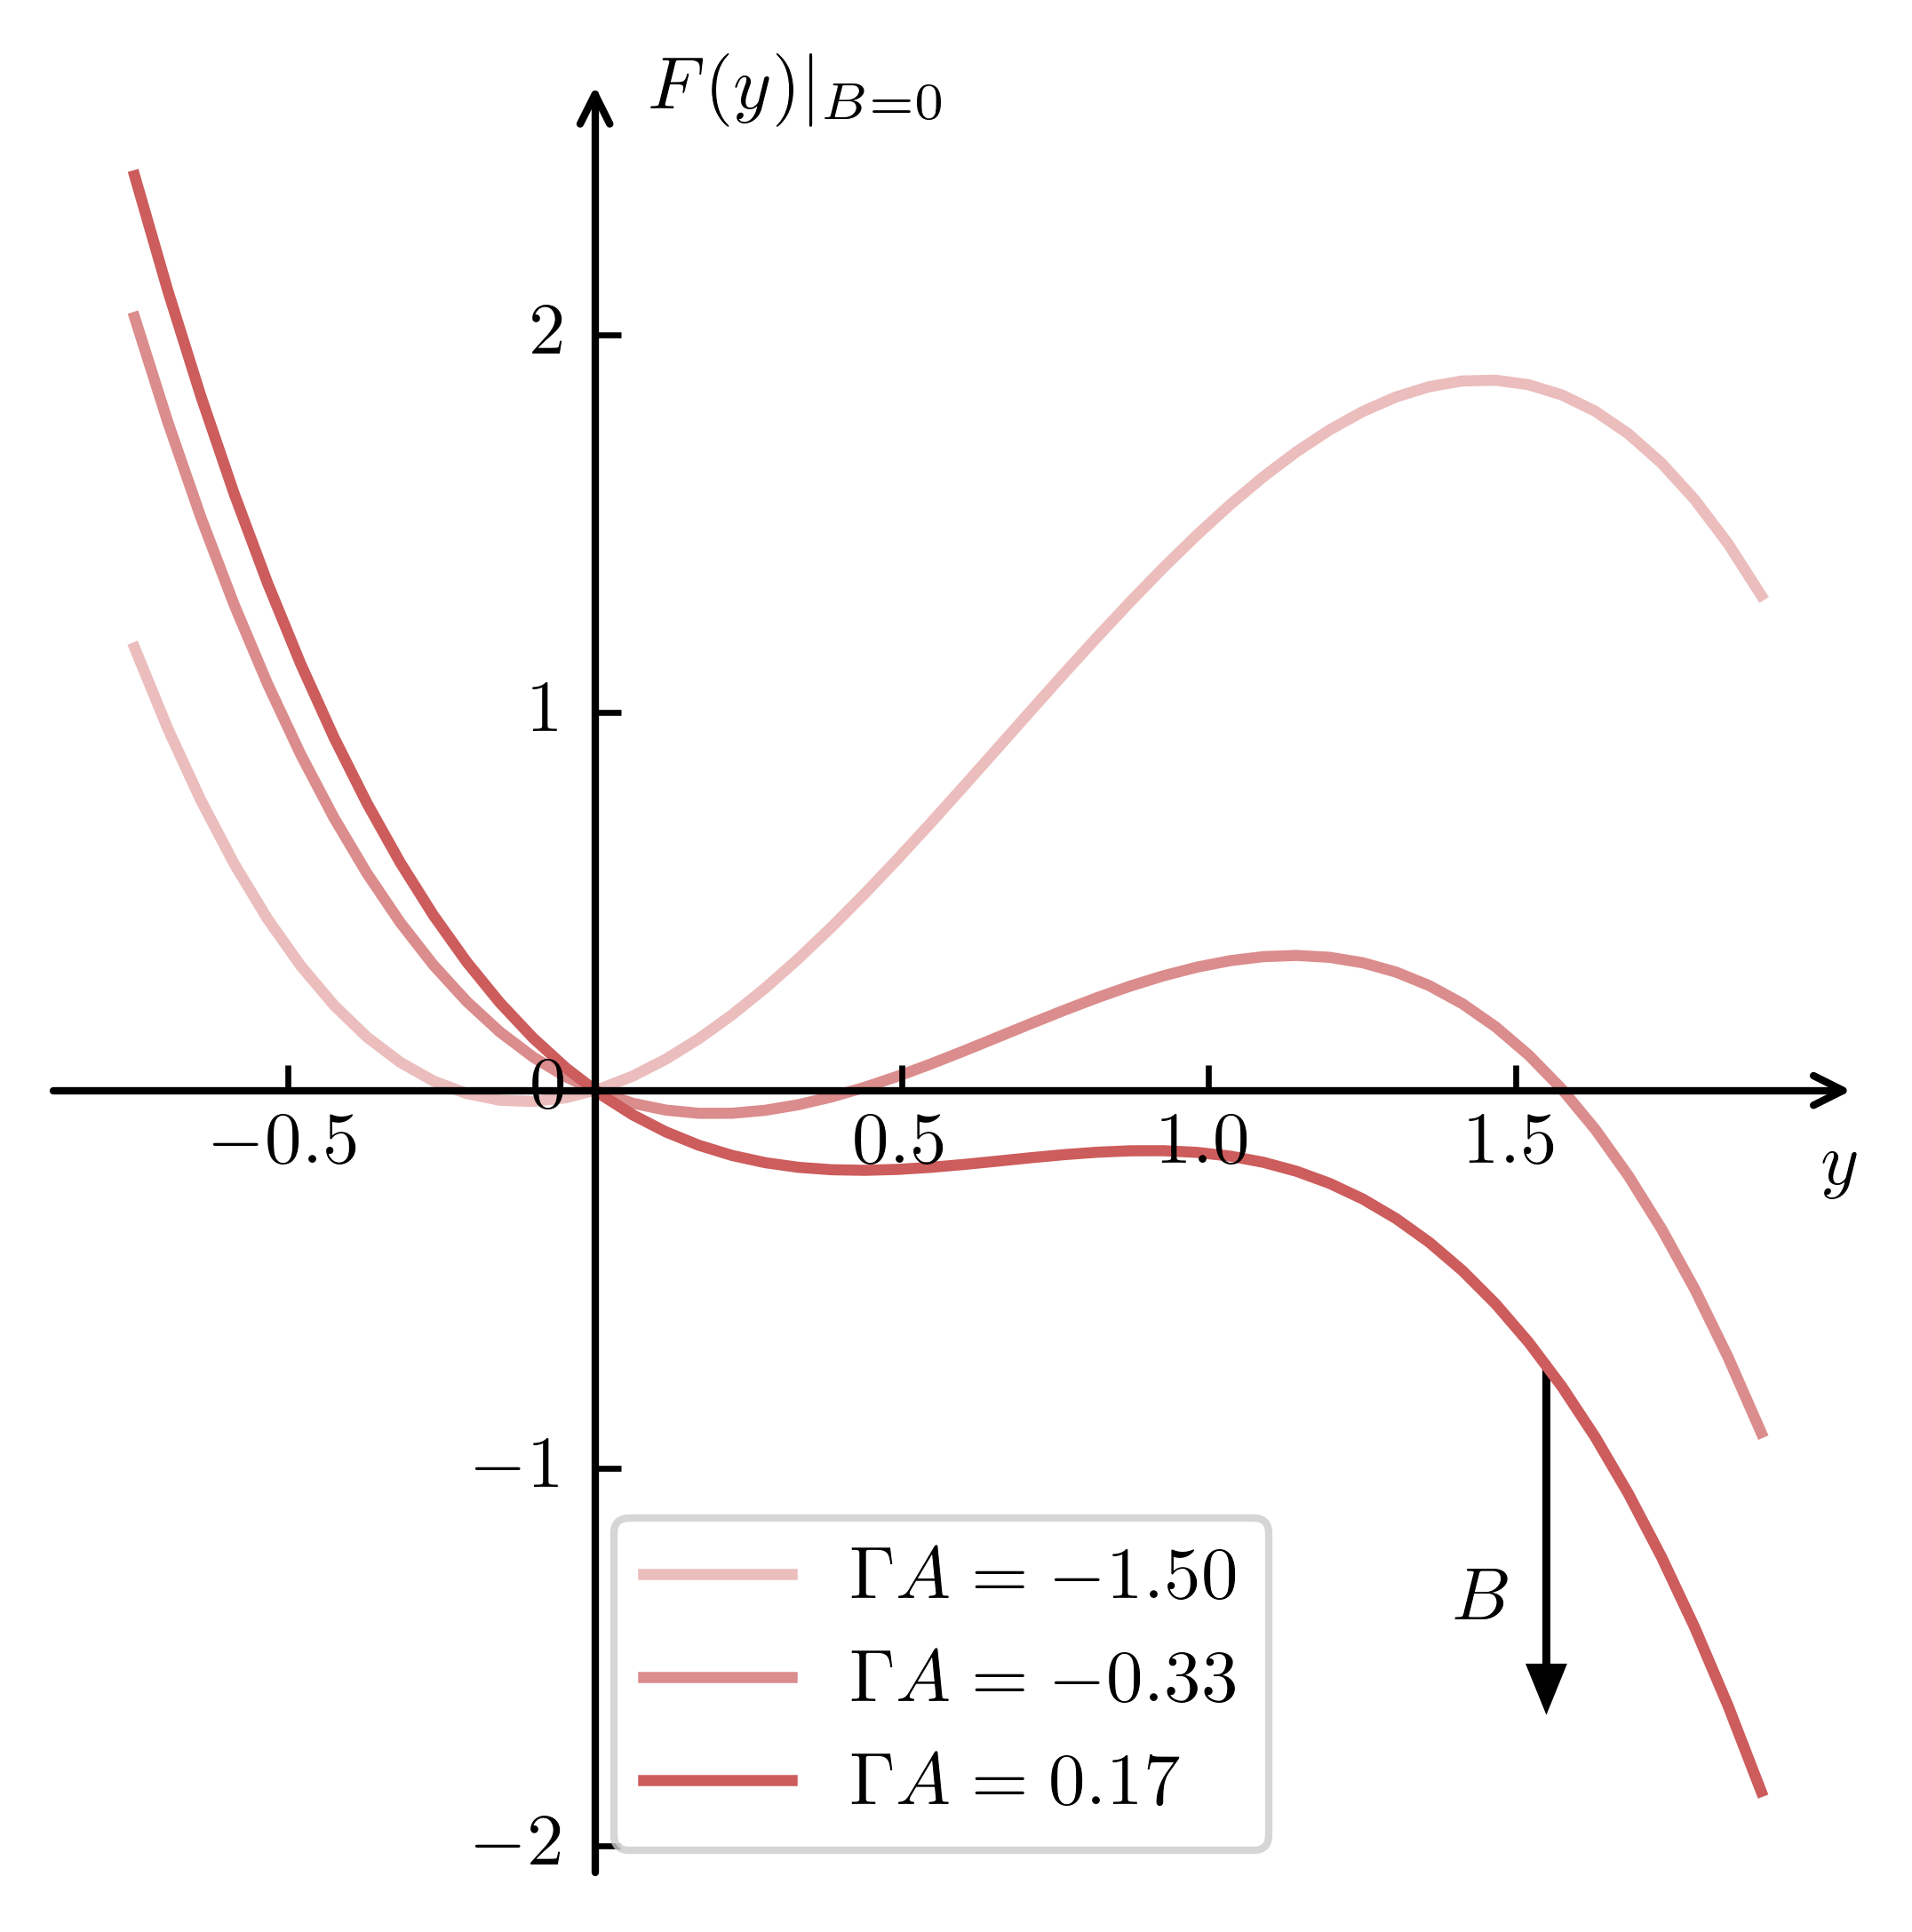

In [122]:
# polynomial scheme
# tickp = TickProperties(xtick_step_major=1,\

#                         xtick_step_minor=0.5,\
#                             ytick_step_major=1,\
#                                 ytick_step_minor=0.5)
# setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp)
from mpl_toolkits.axisartist.axislines import AxesZero
# setup.fig_width= 18*cm
# setup.fig_height=22.6*cm 
fig = plt.figure(figsize=(11*cm,11*cm),dpi=600)
# fig, ax = setup.return_fig(shape=(1,1),dots_per_inch=600)
# del ax
ax = fig.add_subplot(axes_class=AxesZero)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.tick_params(axis='x',which='both',bottom=True,top=False)
                    
ax.tick_params(axis='y',which='both',left=True,right=False)   
for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("->")
    # ax.axis.set(color='0')
    # ax.axis[direction].set_minor_locator(ticker.MultipleLocator(0.5))
    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)
ax.text(s=r'$F(y)|_{B=0}$',x=0.09,y=2.6)
ax.text(s=r'$y$',x=2,y=-0.25)
ax.set_xticks([-0.5,0.5,1,1.5])
def F_scale(y,A):
    return -(A + 1) *y -y**3 + 2 *y**2 
legend = []
yrange = np.linspace(-0.75,1.9)
As = [-1.5,-1/3,1/6]
alphas = [0.4,0.7,1]
for i in range(len(As)):
    ax.plot(yrange,F_scale(yrange,As[i]),color='indianred',alpha=alphas[i])
    legend.append(r'$\Gamma A='+r'{:.2f}$'.format(As[i]))
ax.legend(legend,bbox_to_anchor=(0.7,0.22))
ax.arrow(x=1.55,y=F_scale(1.55,As[-1]),dx=0,dy=-0.8,head_width=0.05,head_length=0.1,facecolor='0')
ax.text(s=r'$B$',x=1.4,y=-1.4)
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+'polynomial_scheme.pdf',bbox_inches='tight')
plt.show()

In [79]:
root_path = '/home/christian/Documents/Bachelor/numerics/mean_field/gamma_var/'
name = '_4.4k13_0.2g6_3d_'
namenp_gcut = name + '_gcut.npy'


solnumb_file_gcut = root_path+ f'solnumb' + namenp_gcut
xsol_file_gcut = root_path+f'xsol' +namenp_gcut
ysol_file_gcut = root_path+f'ysol' +namenp_gcut

namenp_kcut = name + '_kcut.npy'


solnumb_file_kcut = root_path+ f'solnumb' + namenp_kcut
xsol_file_kcut = root_path+f'xsol' +namenp_kcut
ysol_file_kcut = root_path+f'ysol' +namenp_kcut

# params = np.load(root_path+'params71.npy')
# print('worked')
# k = np.load(root_path+ 'kparam' + namenp)
# w = np.load(root_path+ 'wparam' + namenp)
# d = np.load(root_path+ 'dparam' + namenp)

solution_number_gcut = np.load(solnumb_file_gcut)
xsol_gcut = np.load(xsol_file_gcut)
ysol_gcut = np.load(ysol_file_gcut)
gridpoints = int(solution_number_gcut.shape[0])
solution_number_kcut = np.load(solnumb_file_kcut)
xsol_kcut = np.load(xsol_file_kcut)
ysol_kcut = np.load(ysol_file_kcut)



# gridpoints = 15


gamma_cut = 6#gamma[85]
# k= np.linspace(4.4,13,gridpoints)
kappa_cut = 17#k[80]
k = np.linspace(14,18,gridpoints)
gamma = np.linspace(4,10,gridpoints)
wval = 0.75
d = np.linspace(-4,0,gridpoints//2)

halfgrid = gridpoints//2+1

def determine_stability(solnumb,x_sols,y_sols,wval,kval,dval,sgam):
    stability = np.zeros_like(x_sols)
    stability_plus = 0
    for ind in range(int(solnumb)):
        # s = yvariant[ik,ig,id,ind]
        # if s==1:
        #     yofx = y1ofx
        # else:
        #     yofx = y2ofx
        y = y_sols[ind]
        x = x_sols[ind]
        z = m_z(x,y,wval,kval,Gam)
        m = np.array([x,y,z])
        # print(m)
        # jac = jac_gl_np(0,m,wval,kval,dval,Gam,sgam)
        jac = jac2(0,m,wval,kval,dval,Gam,sgam)
        try:
            eigenvalues, vectors =np.linalg.eig(jac)
            # eigi[ik,ig,id,ind,:]=eigenvalues
        except:
            # print(ik,ig,id)
            stability[ind]=-1
            stability_plus=-1
        if np.any(np.real(eigenvalues)>0):
            # if solution_number[ik,ig,id]==3:
                # print(eigenvalues)
            # print(eigenvalues)
            stability[ind]=0
        elif np.any(np.real(eigenvalues==0)):
            stability[ind]=1
            stability_plus=1
        else:
            # pass
            stability[ind] =2
            stability_plus=2
    stability[int(solnumb):]=np.nan
    return stability, stability_plus

stability_plus_gcut = np.zeros_like(solution_number_gcut)
stability_plus_kcut = np.zeros_like(solution_number_kcut)
stability_gcut = np.zeros_like(xsol_gcut)
stability_kcut = np.zeros_like(xsol_kcut)
# stability_plus = np.load(root_path+'stability_plus.npy')
# stability = np.load(root_path+'stability.npy')
stab_zsol_gcut = np.ones_like(solution_number_gcut)*np.nan
stab_xsol_gcut = np.ones_like(solution_number_gcut)*np.nan
stab_ysol_gcut = np.ones_like(solution_number_gcut)*np.nan

stab_zsol_kcut = np.ones_like(solution_number_kcut)*np.nan
stab_xsol_kcut = np.ones_like(solution_number_kcut)*np.nan
stab_ysol_kcut = np.ones_like(solution_number_kcut)*np.nan

for io in range(gridpoints):
        for id, dval in enumerate(d):
            stability_gcut[io,id], stability_plus_gcut[io,id]=determine_stability(solution_number_gcut[io,id],xsol_gcut[io,id],ysol_gcut[io,id],wval,k[io],dval,gamma_cut)
            stability_kcut[io,id], stability_plus_kcut[io,id]=determine_stability(solution_number_kcut[io,id],xsol_kcut[io,id],ysol_kcut[io,id],wval,kappa_cut,dval,gamma[io])

            if stability_plus_gcut[io,id]:
                # print(kval,wval,dval)
                for n in range(int(solution_number_gcut[io,id])):
                    if stability_gcut[io,id,n]==2:
                        stab_xsol_gcut[io,id]=xsol_gcut[io,id,n]
                        stab_ysol_gcut[io,id] = ysol_gcut[io,id,n]
                        stab_zsol_gcut[io,id] = m_z(xsol_gcut[io,id,n],ysol_gcut[io,id,n],wval,k[io],Gam)
                        break
            if stability_plus_kcut[io,id]:
                # print(kval,wval,dval)
                for n in range(int(solution_number_kcut[io,id])):
                    if stability_kcut[io,id,n]==2:
                        stab_xsol_kcut[io,id]=xsol_kcut[io,id,n]
                        stab_ysol_kcut[io,id] = ysol_kcut[io,id,n]
                        stab_zsol_kcut[io,id] = m_z(xsol_kcut[io,id,n],ysol_kcut[io,id,n],wval,kappa_cut,Gam)
                        break
              

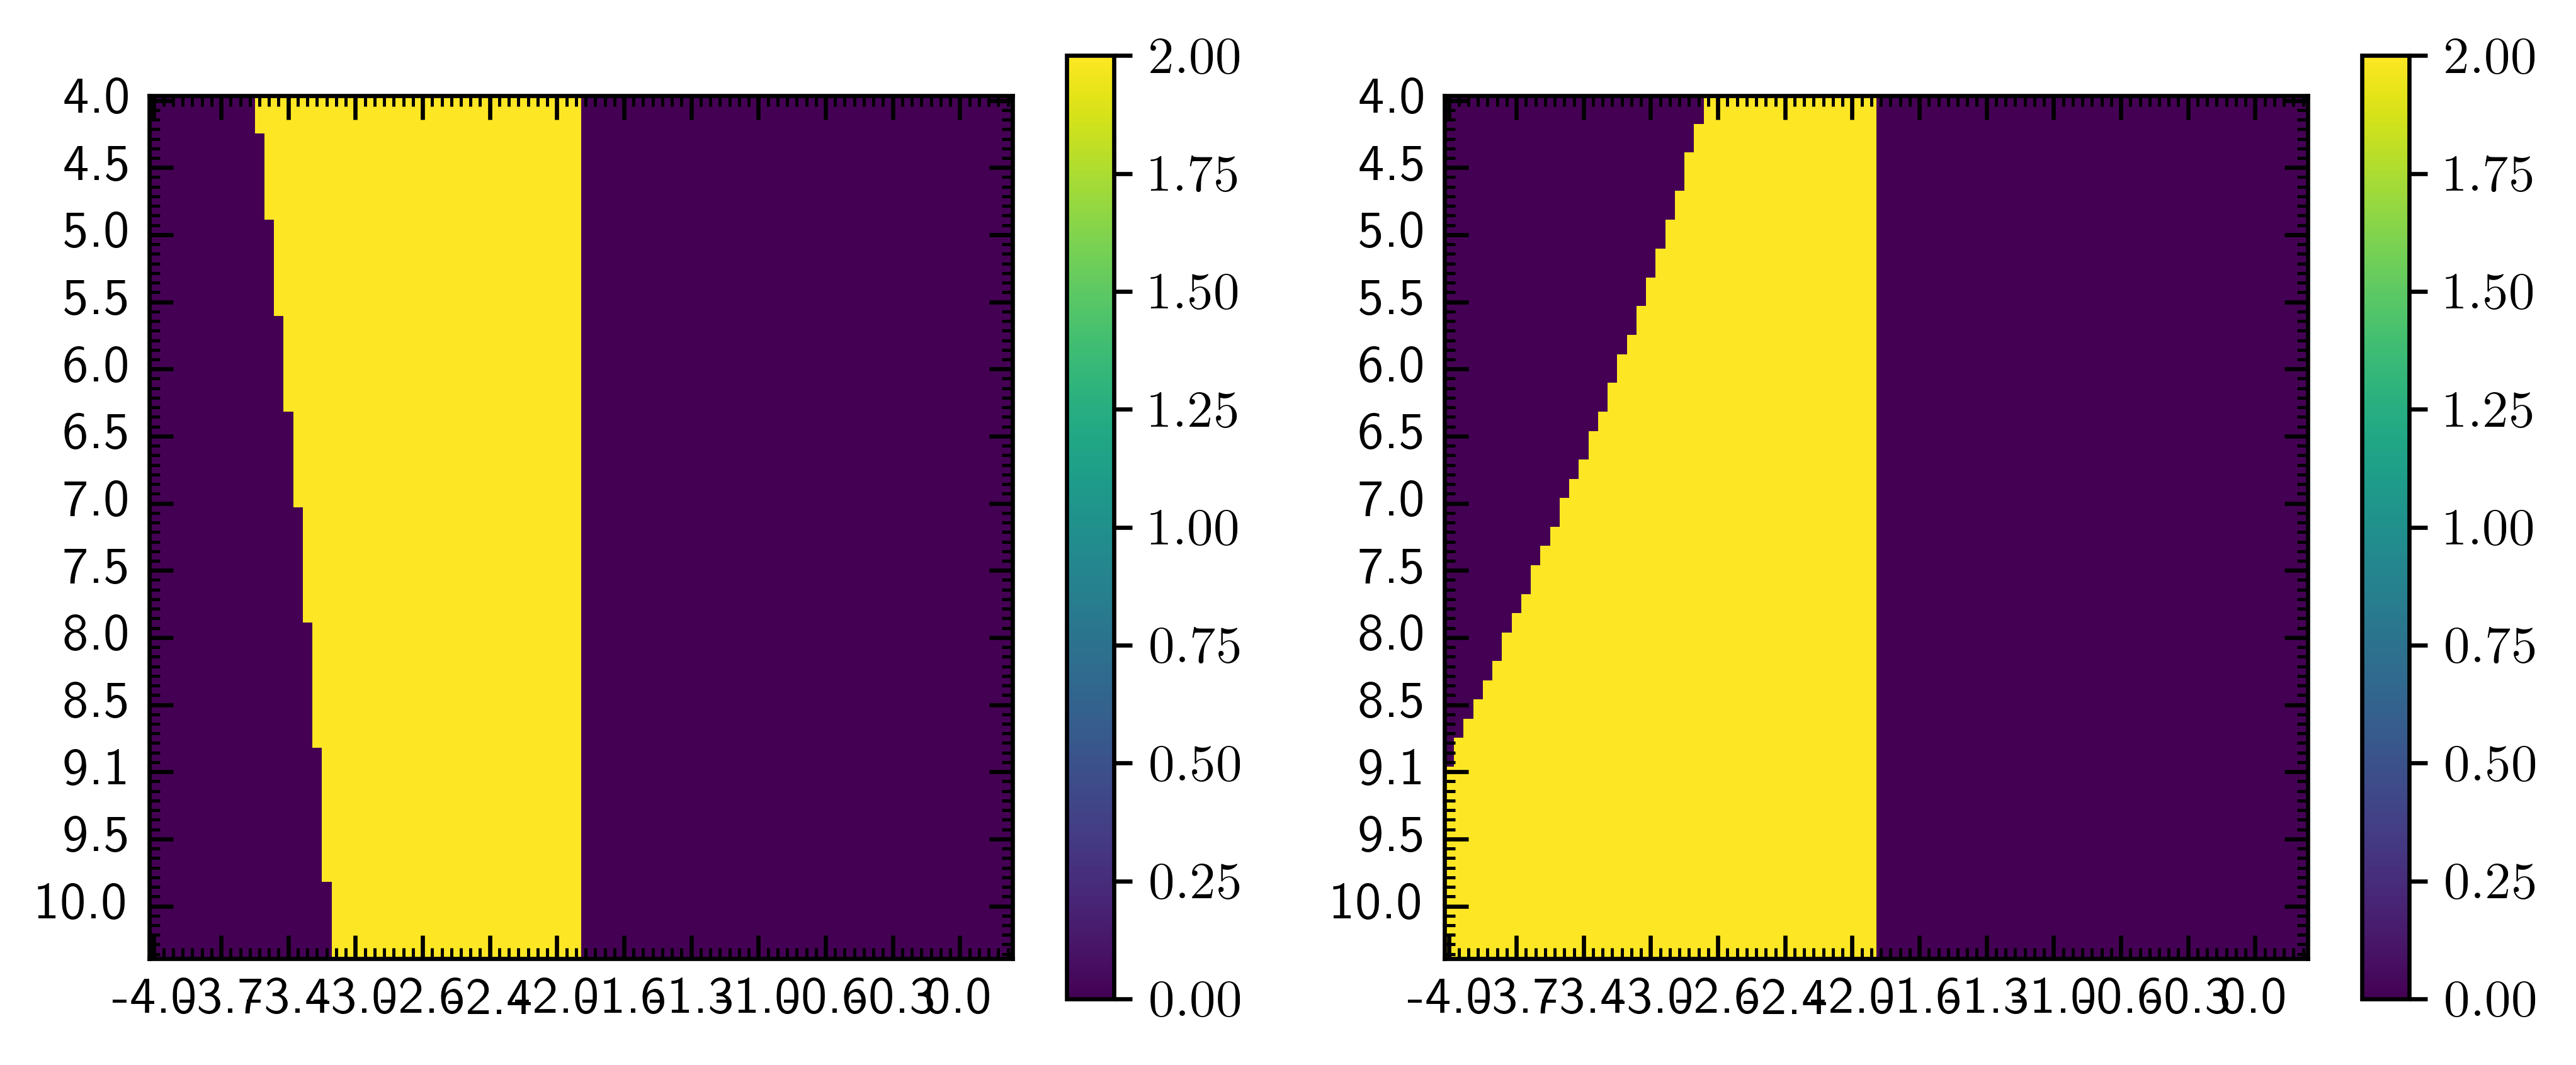

In [80]:
# sol_k_cut = np.load('gamma_var/solnumb_4.4k13_0.2g6_3d__kcut.npy')
# sol_g_cut = np.load('gamma_var/solnumb_4.4k13_0.2g6_3d__gcut.npy')
tickformat = Format(xscale=d,yscale=gamma,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=7,\
                        xtick_step_minor=1,\
                            ytick_step_major=7,\
                                ytick_step_minor=1)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
setup.fig_width= 20.6*cm
setup.fig_height=20.6*cm #29.1*cm
setup.DEFAULT_HEAT_EXTEND = im1.get_extent()#(-0.5,64.5,39.5,-0.5)
fig, ax = setup.return_fig(shape=(1,2),dots_per_inch=600) 
im1 = ax[0].imshow(stability_plus_gcut)
# im1 = ax[0].imshow(stability_plus[:,g_cut,:])
colorbar = fig.colorbar(im1,ax=ax[0],shrink=0.4)
im2 = ax[1].imshow(stability_plus_kcut)
colorbar2 = fig.colorbar(im2,ax=ax[1],shrink=0.4)
plt.show()

In [17]:
def starting_points2(numb):
    points = np.zeros((numb,3))
    for i in range(numb):
        phi = random()*2*np.pi
        theta = random()*np.pi
        r = random()*0.5
        points[i,:] = r*np.sin(theta)*np.cos(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(theta)
    return points
time_range = 9
basis = 2
numb_of_tsteps = 5000#*time_range
# starts = starting_points2(2)
# param = [(1.8,12.2,2.7,1,0.2),(2.5,11,2,1,0.2)]
param = [(0,12.2,2.7,1,0.2),(0,11,2,1,0.2)]
trajs = []
for pl in range(2):
    starts = starting_points2(2)
    traj = np.zeros((starts.shape[0],4,numb_of_tsteps))
    # traj = []
    for i in range(starts.shape[0]):
        
        tr = solve_ivp(gl2,(0,basis**time_range),y0=starts[i,:],args=param[pl],method='DOP853',t_eval=np.logspace(0,time_range,numb_of_tsteps,base=basis))
        traj[i,0,:]= tr.t
        traj[i,1:,:] = tr.y
        # traj.append(np.row_stack((tr.t,tr.y)))
    trajs.append(traj)

In [97]:
import os
from time import sleep
i = 0
while i<5:
    sleep(3)
    print(i)
    i+=1
os.path.exists(root_path+'DOP_w_cut_means_p.npy')

0
1
2
3
4


False

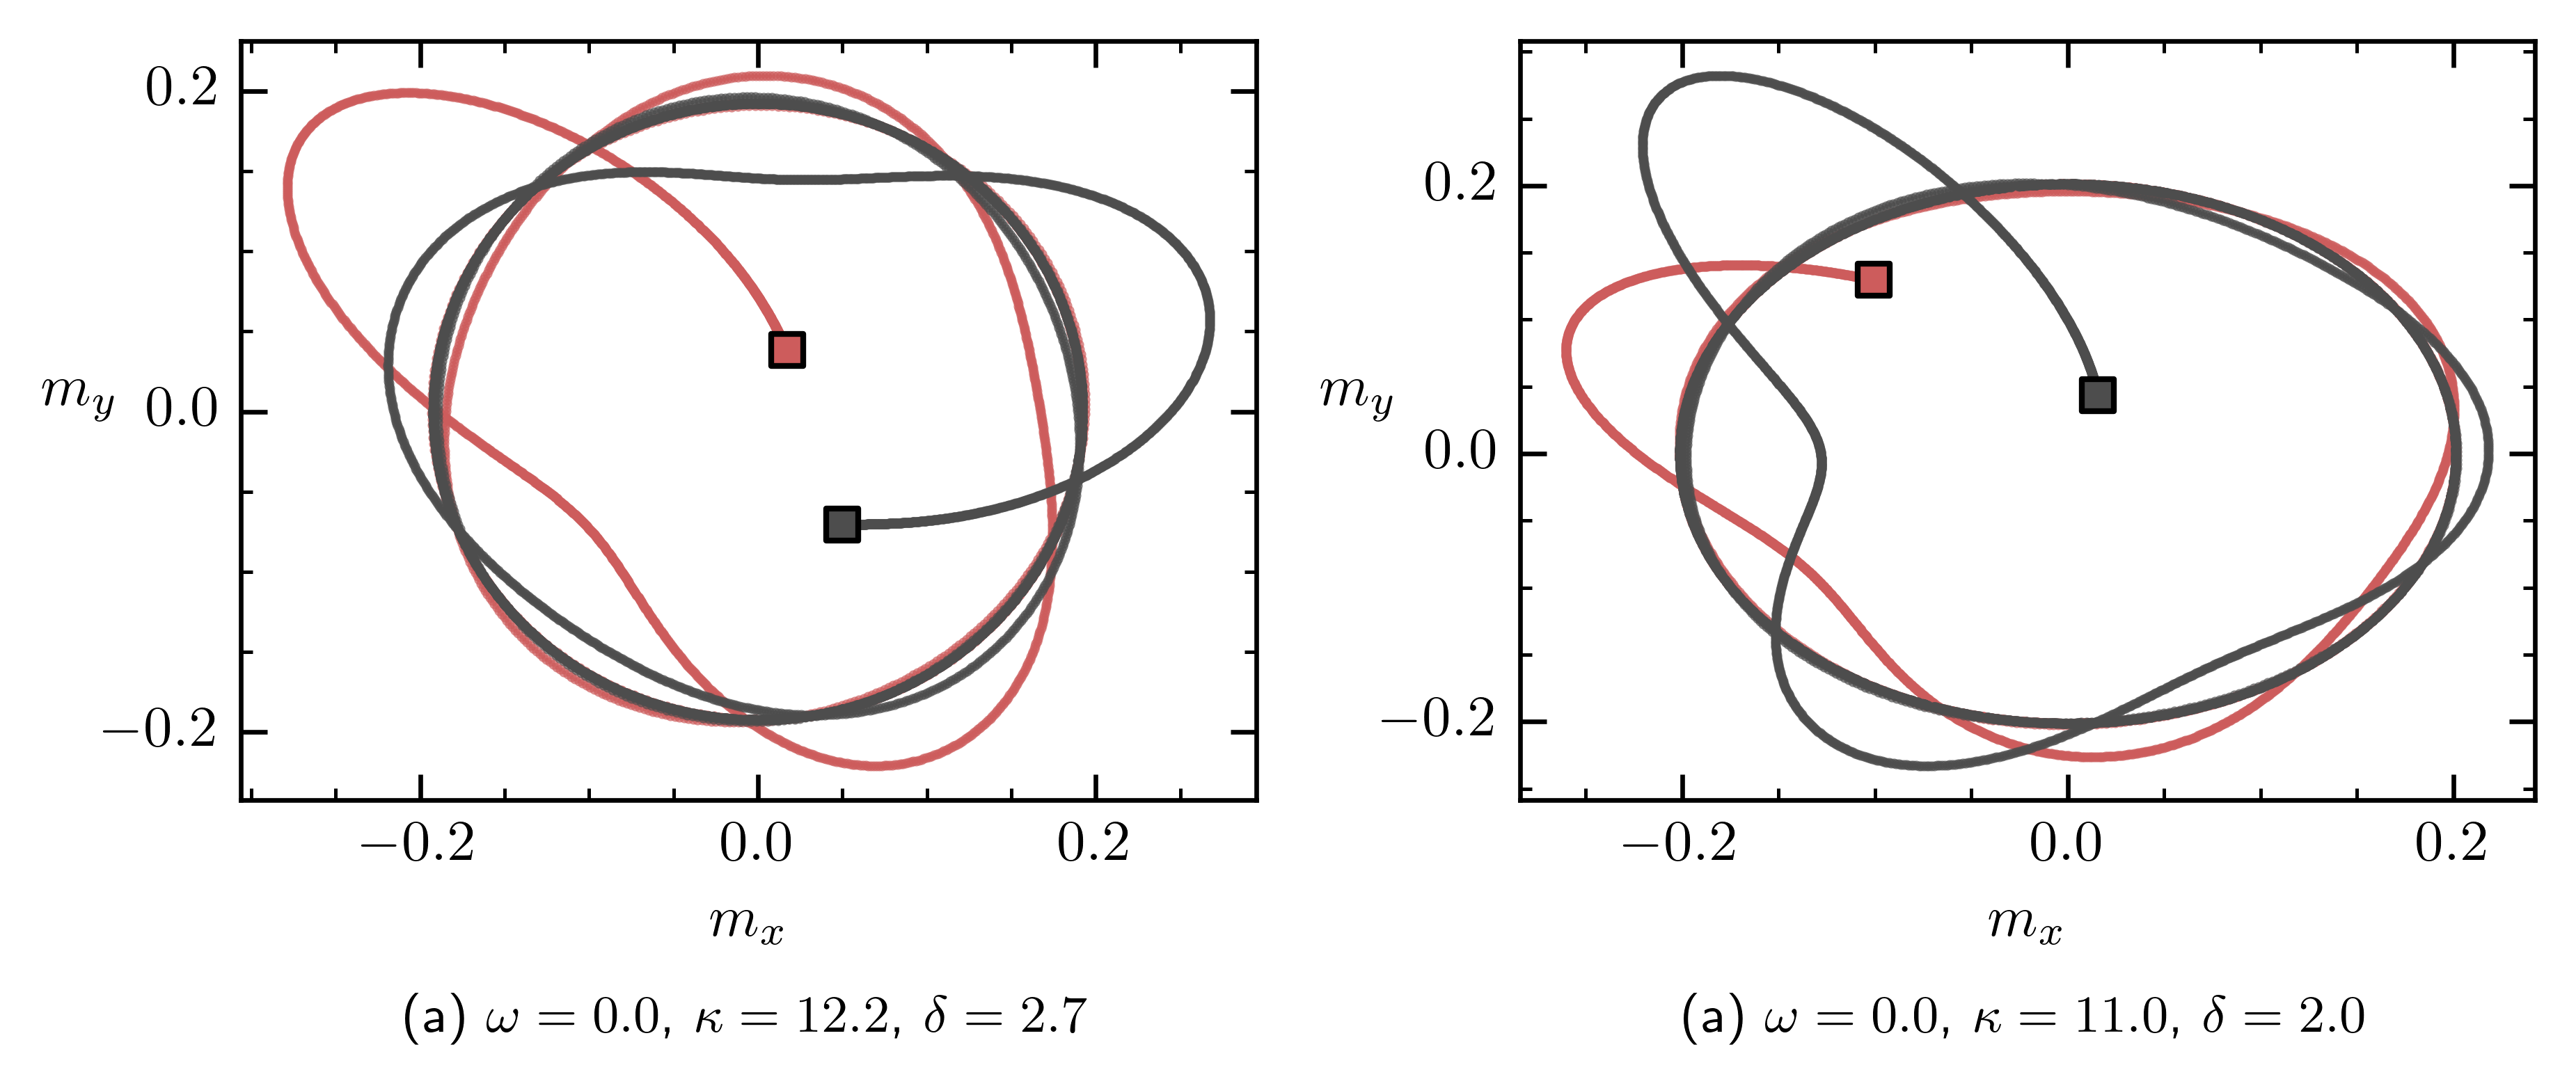

In [18]:
# tickformat = Format(xscale=d,yscale=gamma,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=False,SZY=False,\
                       xtick_step_major=0.2,\
                        xtick_step_minor=0.05,\
                            ytick_step_major=0.2,\
                                ytick_step_minor=0.05)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp)#,formater=tickformat)
setup.fig_width= 18*cm
setup.fig_height=6*cm #29.1*cm
fig, ax = setup.return_fig(shape=(1,2),dots_per_inch=600) 
colors =['indianred','0.3','darkslategrey','darkturquoise']
alphas = [1,0.7]#[0.6,0.9]
steps = 1
# alphas = np.linspace(0.4,1,trajs[0].shape[2]//steps+1)
for i in range(2):
    for j in range(0,starts.shape[0]):
        # for alph in range(0,trajs[i].shape[2],steps):
        #     ax[i].scatter(trajs[i][j,1,alph],trajs[i][j,2,alph],color=colors[j],alpha=alphas[alph//steps])
        ax[i].scatter(trajs[i][j,1,:],trajs[i][j,2,:],color=colors[j],alpha=alphas[1])
        # ax[i].scatter(trajs[i][j,1,0],trajs[i][j,2,0],color=colors[j],alpha=alphas[j],marker='s',s=30)
        # ax[i].scatter(trajs[i][j][1,:],trajs[i][j][2,:],color=colors[i],alpha=alphas[j])
        # ax[i].scatter(trajs[i][j][1,0],trajs[i][j][2,0],color=colors[i],alpha=alphas[j],marker='s',s=30)
for i in range(2):
    for j in range(starts.shape[0]):
        ax[i].scatter(trajs[i][j,1,0],trajs[i][j,2,0],color=colors[j],alpha=alphas[0],marker='s',s=30,edgecolor='0')
    ax[i].set_xlabel(r'$m_x$')
    ax[i].set_ylabel(r'$m_y$',rotation=0)
    ax[i].set_title(r'(a) $\omega={:.1f}$, $\kappa={:.1f}$, $\delta={:.1f}$'.format(*param[i]),loc='center',y=-0.35,fontsize=9)
plt.subplots_adjust(wspace=0.26)
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+'lc_example.png',bbox_inches='tight')

plt.show()

In [27]:
def fill_binary(length,numb):
    diff = length -len('{:b}'.format(numb))
    if diff:
        return diff*'0'
    else:
        return ''

def starting_grid(expansion,resolution):
    # points = np.zeros((resolution,resolution,resolution,3))
    flat = []
    stepsize = expansion/(resolution-1)
    for i in range(resolution):
        for j in range(resolution):
            for l in range(resolution):
                a = 0b000
                for n in range(7):
                    b = '{}{:b}'.format(fill_binary(3,a),a)
                    b= np.array([*b],dtype=np.int32)
                    a +=1
                    # print(1-2*b)
                    # print(np.array([i,j,l])*(1-2*b))
                    p1 = np.array([i,j,l])*(1-2*b)*stepsize
                    if np.linalg.norm(p1)<=0.5:
                        flat.append(p1)
    out = [flat[0]]
    for i in range(1,len(flat)):
        take = 1
        for j in range(len(out)):
            if np.linalg.norm(flat[i]-out[j])==0:
                # print('sorted out')
                take =0
        if take:
            out.append(flat[i])

    return np.row_stack(out)

starts = starting_grid(0.62,4)

In [93]:
# dval = -1.72407
dval = -1.724132264529058
kval = 10.118909853249477
wval = 2.3889
# dval =  -0.2727272727272734
# kval = 5
# wval = 0.04
sgam =0.2
def starting_grid(resolution):
    points = np.zeros((resolution,resolution,resolution,3))
    flat = []
    steps = 1/(resolution-1)
    for i in range(resolution):
        for j in range(resolution):
            for l in range(resolution):
                points[i,j,l]= -0.5+np.array([i,j,l])*steps
                if np.linalg.norm(points[i,j,l])>0.5:
                    points[i,j,l]=np.nan
                else:
                    flat.append(points[i,j,l])
    return np.row_stack(flat)
# starts = starting_grid(6)
numb_of_tsteps = 10000
trajs = np.zeros((starts.shape[0],4,numb_of_tsteps))
for i in range(starts.shape[0]):
    tr = solve_ivp(gl2,(0,20000),y0=starts[i],args=(wval,kval,dval,1,sgam),method='DOP853',t_eval=np.linspace(16000,19999,numb_of_tsteps),rtol=1e-10)
    trajs[i,:] = np.row_stack((tr.t,tr.y))

(56, 3)


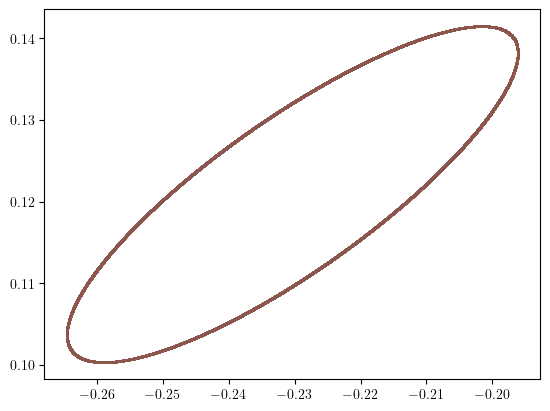

In [94]:
plt.figure()
print(starts.shape)
for i in range(starts.shape[0]):
    plt.scatter(trajs[i,1,:],trajs[i,2,:])
plt.show()

56
(32, 3)


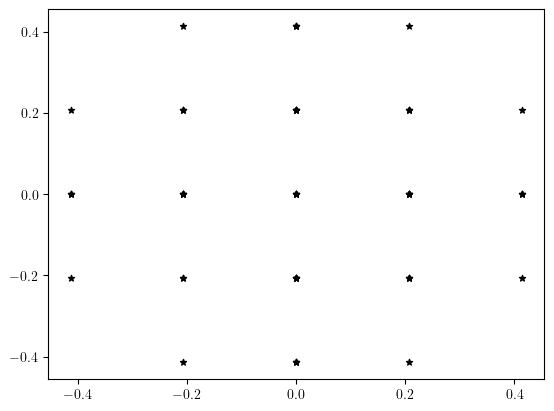

In [11]:
def fill_binary(length,numb):
    diff = length -len('{:b}'.format(numb))
    if diff:
        return diff*'0'
    else:
        return ''

def starting_grid(expansion,resolution):
    # points = np.zeros((resolution,resolution,resolution,3))
    flat = []
    stepsize = expansion/(resolution-1)
    for i in range(resolution):
        for j in range(resolution):
            for l in range(resolution):
                a = 0b000
                for n in range(7):
                    b = '{}{:b}'.format(fill_binary(3,a),a)
                    b= np.array([*b],dtype=np.int32)
                    a +=1
                    # print(1-2*b)
                    # print(np.array([i,j,l])*(1-2*b))
                    p1 = np.array([i,j,l])*(1-2*b)*stepsize
                    if np.linalg.norm(p1)<=0.5:
                        flat.append(p1)
    out = [flat[0]]
    for i in range(1,len(flat)):
        take = 1
        for j in range(len(out)):
            if np.linalg.norm(flat[i]-out[j])==0:
                # print('sorted out')
                take =0
        if take:
            out.append(flat[i])

    return np.row_stack(out)

start = starting_grid(0.62,4)
print(start.shape[0])
print(starting_grid(0.5,3).shape)
plt.figure()
for i in range(start.shape[0]):
    plt.scatter(start[i,0],start[i,1],marker='*',s=20,color='0')
plt.show()

In [ ]:
trajec = np.zeros((len(interesting)))